In [2]:
import pandas as pd
import numpy as np
import matplotlib as m
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

In [3]:
# importing yeast count data

# 42 clean WT replicates
WT_yeast = pd.read_csv('WT_yeast.csv', index_col=0)

# 44 clean Snf2 mutant replciates
Snf2_yeast = pd.read_csv('Snf2_yeast.csv', index_col=0)

display(WT_yeast)
display(Snf2_yeast)

genes   1    2    3    4    5    6    7    8    9  ...  33   34  \
0      15S_rRNA   2   12   31    8   21   11    2    3    7  ...   0   49   
1      21S_rRNA  20   76  101   99  128   74   36   32   57  ...  10  274   
2          HRA1   3    2    2    2    3    5    4    0    4  ...   5    3   
3          ICR1  75  123  107  157   98  245  119  120  119  ...  85  177   
4          LSR1  60  163  233  163  193  375  194   84  211  ...  66  385   
...         ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ...   
7121  tY(GUA)J2   0    1    0    0    0    2    0    0    0  ...   0    0   
7122  tY(GUA)M1   0    0    1    1    1    1    0    0    1  ...   0    1   
7123  tY(GUA)M2   0    0    1    0    0    0    1    0    0  ...   0    0   
7124   tY(GUA)O   0    0    0    0    0    0    1    0    0  ...   0    0   
7125   tY(GUA)Q   0    0    0    0    0    0    0    0    0  ...   0    0   

       35   36   37  38   39   40   41   42  
0       9    4   11  12    1   22   12    4  
1      49   30   72  58   21  159  107   70  
2       6    5    2   2    2    5    2    1  
3     137  118  113  81  142   94  187  106  
4     232  149  114  81  109  132  243  128  
...   ...  ...  ...  ..  ...  ...  ...  ...  
7121    0    0    0   0    0    0    0    0  
7122    1    0    1   0    0    0    1    0  
7123    0    0    0   0    0    0    0    0  
7124    1    0    0   0    0    0    0    1  
7125    0    0    0   0    0    0    0    0  

[7126 rows x 43 columns]

genes    1    2    3    4    5    6    7    8    9  ...   35   36  \
0      15S_rRNA    4    2    5    5   46    5    4    2   40  ...    7   15   
1      21S_rRNA   31   18   23   44  356   35   33   13  148  ...   64   79   
2          HRA1    5    1    3    1    2    1    4    4    0  ...    5    5   
3          ICR1  205  196  211  252  127  275  160  190  146  ...  286  155   
4          LSR1  210  103  159  260  298  303   96  132  263  ...  250  195   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7121  tY(GUA)J2    1    0    0    0    0    0    1    0    0  ...    1    1   
7122  tY(GUA)M1    0    0    1    0    2    0    0    0    0  ...    1    1   
7123  tY(GUA)M2    0    0    0    0    0    0    0    0    0  ...    0    0   
7124   tY(GUA)O    0    1    0    0    0    0    0    0    1  ...    0    1   
7125   tY(GUA)Q    0    0    0    0    0    0    0    0    0  ...    0    0   

       37   38   39   40   41   42   43   44  
0       6    1   85    8   34    3    6    3  
1      67   13  576   52  234   23   44   24  
2       0    2    0    1    2    2    0    1  
3     184  164  202  186  148  183  195  145  
4     153   57  742  227  227  117  224  136  
...   ...  ...  ...  ...  ...  ...  ...  ...  
7121    0    0    0    0    0    2    1    1  
7122    1    0    0    0    0    0    0    1  
7123    0    0    0    0    0    0    0    0  
7124    0    0    0    0    0    0    0    0  
7125    0    0    0    0    0    0    0    0  

[7126 rows x 45 columns]

In [4]:
# importing yeast count data >>> q-values
# from explore_clean_yeast_consistency.ipynb

# 42 clean WT replicates
WT_yeast_q = pd.read_csv('WT_yeast_q.csv', index_col=0)

# 44 clean Snf2 mutant replciates
Snf2_yeast_q = pd.read_csv('Snf2_yeast_q.csv', index_col=0)

display(WT_yeast_q)
display(Snf2_yeast_q)

1_q           2_q           3_q           4_q           5_q  \
0     5.030082e-07  1.647548e-06  4.970523e-06  8.628760e-07  2.745867e-06   
1     3.521057e-06  9.758554e-06  1.584354e-05  9.587511e-06  1.610077e-05   
2     6.706775e-07  3.802034e-07  4.659866e-07  2.876253e-07  4.992486e-07   
3     1.274287e-05  1.571507e-05  1.677552e-05  1.514827e-05  1.235640e-05   
4     1.022783e-05  2.078445e-05  3.634695e-05  1.572352e-05  2.421356e-05   
...            ...           ...           ...           ...           ...   
7121  1.676694e-07  2.534689e-07  1.553289e-07  9.587511e-08  1.248121e-07   
7122  1.676694e-07  1.267345e-07  3.106577e-07  1.917502e-07  2.496243e-07   
7123  1.676694e-07  1.267345e-07  3.106577e-07  9.587511e-08  1.248121e-07   
7124  1.676694e-07  1.267345e-07  1.553289e-07  9.587511e-08  1.248121e-07   
7125  1.676694e-07  1.267345e-07  1.553289e-07  9.587511e-08  1.248121e-07   

               6_q           7_q           8_q           9_q          10_q  \
0     8.207817e-07  3.385883e-07  4.065404e-07  9.034018e-07  8.837392e-07   
1     5.129886e-06  4.175923e-06  3.353958e-06  6.549663e-06  1.325609e-05   
2     4.103909e-07  5.643139e-07  1.016351e-07  5.646261e-07  6.312423e-07   
3     1.682602e-05  1.354353e-05  1.229785e-05  1.355103e-05  1.679104e-05   
4     2.571783e-05  2.200824e-05  8.638984e-06  2.394015e-05  2.007350e-05   
...            ...           ...           ...           ...           ...   
7121  2.051954e-07  1.128628e-07  1.016351e-07  1.129252e-07  1.262485e-07   
7122  1.367970e-07  1.128628e-07  1.016351e-07  2.258505e-07  1.262485e-07   
7123  6.839848e-08  2.257256e-07  1.016351e-07  1.129252e-07  1.262485e-07   
7124  6.839848e-08  2.257256e-07  1.016351e-07  1.129252e-07  1.262485e-07   
7125  6.839848e-08  1.128628e-07  1.016351e-07  1.129252e-07  1.262485e-07   

      ...          33_q          34_q          35_q          36_q  \
0     ...  1.349760e-07  4.192114e-06  1.002461e-06  6.830799e-07   
1     ...  1.484737e-06  2.305663e-05  5.012305e-06  4.235095e-06   
2     ...  8.098563e-07  3.353691e-07  7.017227e-07  8.196959e-07   
3     ...  1.160794e-05  1.492393e-05  1.383396e-05  1.625730e-05   
4     ...  9.043395e-06  3.236312e-05  2.335734e-05  2.049240e-05   
...   ...           ...           ...           ...           ...   
7121  ...  1.349760e-07  8.384228e-08  1.002461e-07  1.366160e-07   
7122  ...  1.349760e-07  1.676846e-07  2.004922e-07  1.366160e-07   
7123  ...  1.349760e-07  8.384228e-08  1.002461e-07  1.366160e-07   
7124  ...  1.349760e-07  8.384228e-08  2.004922e-07  1.366160e-07   
7125  ...  1.349760e-07  8.384228e-08  1.002461e-07  1.366160e-07   

              37_q          38_q          39_q          40_q          41_q  \
0     1.810945e-06  1.603579e-06  1.727728e-07  4.120753e-06  1.075839e-06   
1     1.101658e-05  7.277780e-06  1.900501e-06  2.866611e-05  8.937736e-06   
2     4.527362e-07  3.700566e-07  2.591592e-07  1.074979e-06  2.482704e-07   
3     1.720398e-05  1.011488e-05  1.235325e-05  1.702050e-05  1.555828e-05   
4     1.735489e-05  1.011488e-05  9.502503e-06  2.382870e-05  2.019266e-05   
...            ...           ...           ...           ...           ...   
7121  1.509121e-07  1.233522e-07  8.638639e-08  1.791632e-07  8.275681e-08   
7122  3.018241e-07  1.233522e-07  8.638639e-08  1.791632e-07  1.655136e-07   
7123  1.509121e-07  1.233522e-07  8.638639e-08  1.791632e-07  8.275681e-08   
7124  1.509121e-07  1.233522e-07  8.638639e-08  1.791632e-07  8.275681e-08   
7125  1.509121e-07  1.233522e-07  8.638639e-08  1.791632e-07  8.275681e-08   

              42_q  
0     6.252496e-07  
1     8.878545e-06  
2     2.500999e-07  
3     1.338034e-05  
4     1.613144e-05  
...            ...  
7121  1.250499e-07  
7122  1.250499e-07  
7123  1.250499e-07  
7124  2.500999e-07  
7125  1.250499e-07  

[7126 rows x 42 columns]

1_q           2_q           3_q           4_q           5_q  \
0     4.888009e-07  3.450619e-07  6.839056e-07  5.627362e-07  6.827575e-06   
1     3.128326e-06  2.185392e-06  2.735623e-06  4.220521e-06  5.186051e-05   
2     5.865611e-07  2.300412e-07  4.559371e-07  1.875787e-07  4.358026e-07   
3     2.013860e-05  2.265906e-05  2.416467e-05  2.372871e-05  1.859425e-05   
4     2.062740e-05  1.196214e-05  1.823748e-05  2.447902e-05  4.343500e-05   
...            ...           ...           ...           ...           ...   
7121  1.955204e-07  1.150206e-07  1.139843e-07  9.378936e-08  1.452675e-07   
7122  9.776019e-08  1.150206e-07  2.279685e-07  9.378936e-08  4.358026e-07   
7123  9.776019e-08  1.150206e-07  1.139843e-07  9.378936e-08  1.452675e-07   
7124  9.776019e-08  2.300412e-07  1.139843e-07  9.378936e-08  1.452675e-07   
7125  9.776019e-08  1.150206e-07  1.139843e-07  9.378936e-08  1.452675e-07   

               6_q           7_q           8_q           9_q          10_q  \
0     4.807801e-07  6.136811e-07  2.992327e-07  4.976768e-06  8.074703e-07   
1     2.884681e-06  4.173032e-06  1.396419e-06  1.808630e-05  6.560696e-06   
2     1.602600e-07  6.136811e-07  4.987212e-07  1.213846e-07  4.037352e-07   
3     2.211589e-05  1.976053e-05  1.905115e-05  1.784353e-05  1.937929e-05   
4     2.435953e-05  1.190541e-05  1.326598e-05  3.204553e-05  1.594754e-05   
...            ...           ...           ...           ...           ...   
7121  8.013002e-08  2.454724e-07  9.974424e-08  1.213846e-07  1.009338e-07   
7122  8.013002e-08  1.227362e-07  9.974424e-08  1.213846e-07  1.009338e-07   
7123  8.013002e-08  1.227362e-07  9.974424e-08  1.213846e-07  1.009338e-07   
7124  8.013002e-08  1.227362e-07  9.974424e-08  2.427692e-07  1.009338e-07   
7125  8.013002e-08  1.227362e-07  9.974424e-08  1.213846e-07  1.009338e-07   

      ...          33_q          34_q          35_q          36_q  \
0     ...  1.127455e-06  3.567655e-07  5.269065e-07  1.934424e-06   
1     ...  3.883457e-06  2.259515e-06  4.281115e-06  9.672119e-06   
2     ...  2.505456e-07  7.135311e-07  3.951799e-07  7.254089e-07   
3     ...  1.828983e-05  1.783828e-05  1.890277e-05  1.886063e-05   
4     ...  2.117111e-05  1.296248e-05  1.653169e-05  2.369669e-05   
...   ...           ...           ...           ...           ...   
7121  ...  1.252728e-07  1.189218e-07  1.317266e-07  2.418030e-07   
7122  ...  2.505456e-07  3.567655e-07  1.317266e-07  2.418030e-07   
7123  ...  1.252728e-07  1.189218e-07  6.586331e-08  1.209015e-07   
7124  ...  1.252728e-07  1.189218e-07  6.586331e-08  2.418030e-07   
7125  ...  1.252728e-07  1.189218e-07  6.586331e-08  1.209015e-07   

              37_q          38_q          39_q          40_q          41_q  \
0     7.028538e-07  2.900728e-07  8.987743e-06  1.014152e-06  4.451590e-06   
1     6.827723e-06  2.030510e-06  6.030148e-05  5.972229e-06  2.988925e-05   
2     1.004077e-07  4.351093e-07  1.045086e-07  2.253671e-07  3.815649e-07   
3     1.857542e-05  2.393101e-05  2.121525e-05  2.107183e-05  1.895106e-05   
4     1.546278e-05  8.412112e-06  7.764992e-05  2.569185e-05  2.899893e-05   
...            ...           ...           ...           ...           ...   
7121  1.004077e-07  1.450364e-07  1.045086e-07  1.126836e-07  1.271883e-07   
7122  2.008154e-07  1.450364e-07  1.045086e-07  1.126836e-07  1.271883e-07   
7123  1.004077e-07  1.450364e-07  1.045086e-07  1.126836e-07  1.271883e-07   
7124  1.004077e-07  1.450364e-07  1.045086e-07  1.126836e-07  1.271883e-07   
7125  1.004077e-07  1.450364e-07  1.045086e-07  1.126836e-07  1.271883e-07   

              42_q  
0     4.541140e-07  
1     2.724684e-06  
2     3.405855e-07  
3     2.088925e-05  
4     1.339636e-05  
...            ...  
7121  3.405855e-07  
7122  1.135285e-07  
7123  1.135285e-07  
7124  1.135285e-07  
7125  1.135285e-07  

[7126 rows x 42 columns]

In [5]:
# importing yeast count data >>> average q-values
# from explore_clean_yeast_consistency.ipynb

# 42 clean WT replicates
WT_yeast_avq = pd.read_csv('WT_yeast_avq.csv', index_col=0)

# 44 clean Snf2 mutant replciates
Snf2_yeast_avq = pd.read_csv('Snf2_yeast_avq.csv', index_col=0)

display(WT_yeast_avq)
display(Snf2_yeast_avq)

genes             1             2             3             4  \
0      15S_rRNA  5.030082e-07  1.082671e-06  2.266838e-06  1.757651e-06   
1      21S_rRNA  3.521057e-06  7.001270e-06  9.757261e-06  9.667083e-06   
2          HRA1  6.706775e-07  4.330683e-07  3.942327e-07  3.254910e-07   
3          ICR1  1.274287e-05  1.436343e-05  1.507940e-05  1.507023e-05   
4          LSR1  1.022783e-05  1.616788e-05  2.252055e-05  2.018044e-05   
...         ...           ...           ...           ...           ...   
7121  tY(GUA)J2  1.676694e-07  1.443561e-07  9.855819e-08  6.509820e-08   
7122  tY(GUA)M1  1.676694e-07  7.217804e-08  9.855819e-08  9.764730e-08   
7123  tY(GUA)M2  1.676694e-07  7.217804e-08  9.855819e-08  6.509820e-08   
7124   tY(GUA)O  1.676694e-07  7.217804e-08  4.927909e-08  3.254910e-08   
7125   tY(GUA)Q  1.676694e-07  7.217804e-08  4.927909e-08  3.254910e-08   

                 5             6             7             8             9  \
0     1.936241e-06  1.611843e-06  1.414441e-06  1.262933e-06  1.211224e-06   
1     1.097203e-05  9.352440e-06  8.599160e-06  7.869044e-06  7.712282e-06   
2     3.356151e-07  3.373626e-07  3.536103e-07  3.053245e-07  3.213451e-07   
3     1.448308e-05  1.510635e-05  1.486771e-05  1.450291e-05  1.438637e-05   
4     2.098885e-05  2.226593e-05  2.221316e-05  2.034571e-05  2.072676e-05   
...            ...           ...           ...           ...           ...   
7121  5.163308e-08  7.496946e-08  6.429279e-08  5.551354e-08  4.943770e-08   
7122  1.032662e-07  9.371182e-08  8.036599e-08  6.939192e-08  7.415655e-08   
7123  5.163308e-08  3.748473e-08  4.821959e-08  4.163515e-08  3.707828e-08   
7124  2.581654e-08  1.874236e-08  3.214639e-08  2.775677e-08  2.471885e-08   
7125  2.581654e-08  1.874236e-08  1.607320e-08  1.387838e-08  1.235943e-08   

      ...            32            33            34            35  \
0     ...  1.904640e-06  1.853748e-06  1.946728e-06  1.911901e-06   
1     ...  1.143895e-05  1.116937e-05  1.165616e-05  1.143130e-05   
2     ...  3.409082e-07  3.498319e-07  3.457776e-07  3.543033e-07   
3     ...  1.402170e-05  1.395360e-05  1.399016e-05  1.398161e-05   
4     ...  2.320770e-05  2.282563e-05  2.321551e-05  2.321690e-05   
...   ...           ...           ...           ...           ...   
7121  ...  1.852762e-08  1.803257e-08  1.728888e-08  1.671242e-08   
7122  ...  4.817182e-08  4.688468e-08  4.840887e-08  5.013727e-08   
7123  ...  1.482210e-08  1.442606e-08  1.383111e-08  1.336994e-08   
7124  ...  1.111657e-08  1.081954e-08  1.037333e-08  1.336994e-08   
7125  ...  3.705524e-09  3.606514e-09  3.457776e-09  3.342484e-09   

                36            37            38            39            40  \
0     1.879292e-06  1.874652e-06  1.864698e-06  1.802844e-06  1.838121e-06   
1     1.125617e-05  1.124791e-05  1.114460e-05  1.082007e-05  1.111147e-05   
2     3.621552e-07  3.608785e-07  3.579971e-07  3.515545e-07  3.605317e-07   
3     1.403270e-05  1.409661e-05  1.399302e-05  1.393298e-05  1.398095e-05   
4     2.314857e-05  2.302277e-05  2.269390e-05  2.223207e-05  2.225545e-05   
...            ...           ...           ...           ...           ...   
7121  1.631330e-08  1.596807e-08  1.556509e-08  1.502370e-08  1.477589e-08   
7122  4.893989e-08  5.109783e-08  4.980829e-08  4.807583e-08  4.728285e-08   
7123  1.305064e-08  1.277446e-08  1.245207e-08  1.201896e-08  1.182071e-08   
7124  1.305064e-08  1.277446e-08  1.245207e-08  1.201896e-08  1.182071e-08   
7125  3.262659e-09  3.193615e-09  3.113018e-09  3.004739e-09  2.955178e-09   

                41  
0     1.808986e-06  
1     1.103367e-05  
2     3.538079e-07  
3     1.403248e-05  
4     2.218147e-05  
...            ...  
7121  1.426645e-08  
7122  4.850592e-08  
7123  1.141316e-08  
7124  1.141316e-08  
7125  2.853289e-09  

[7126 rows x 42 columns]

genes             1             2             3             4  \
0      15S_rRNA  4.888009e-07  3.699162e-07  4.332702e-07  4.431870e-07   
1      21S_rRNA  3.128326e-06  2.642259e-06  2.635727e-06  3.050169e-06   
2          HRA1  5.865611e-07  3.699162e-07  3.610585e-07  2.867680e-07   
3          ICR1  2.013860e-05  2.124376e-05  2.213289e-05  2.255039e-05   
4          LSR1  2.062740e-05  1.659338e-05  1.707807e-05  1.910918e-05   
...         ...           ...           ...           ...           ...   
7121  tY(GUA)J2  1.955204e-07  1.056903e-07  7.221170e-08  5.213964e-08   
7122  tY(GUA)M1  9.776019e-08  5.284517e-08  7.221170e-08  5.213964e-08   
7123  tY(GUA)M2  9.776019e-08  5.284517e-08  3.610585e-08  2.606982e-08   
7124   tY(GUA)O  9.776019e-08  1.056903e-07  7.221170e-08  5.213964e-08   
7125   tY(GUA)Q  9.776019e-08  5.284517e-08  3.610585e-08  2.606982e-08   

                 5             6             7             8             9  \
0     1.392500e-06  1.178058e-06  1.093068e-06  9.750276e-07  1.354988e-06   
1     1.045480e-05  8.800790e-06  8.213191e-06  7.299531e-06  8.343876e-06   
2     2.873412e-07  2.425414e-07  2.732670e-07  2.898731e-07  2.614890e-07   
3     2.192635e-05  2.195000e-05  2.166400e-05  2.130567e-05  2.095478e-05   
4     2.278837e-05  2.311074e-05  2.170954e-05  2.058099e-05  2.169170e-05   
...            ...           ...           ...           ...           ...   
7121  4.420634e-08  3.464878e-08  4.554450e-08  3.952815e-08  3.565759e-08   
7122  8.841268e-08  6.929756e-08  6.072600e-08  5.270420e-08  4.754345e-08   
7123  2.210317e-08  1.732439e-08  1.518150e-08  1.317605e-08  1.188586e-08   
7124  4.420634e-08  3.464878e-08  3.036300e-08  2.635210e-08  3.565759e-08   
7125  2.210317e-08  1.732439e-08  1.518150e-08  1.317605e-08  1.188586e-08   

      ...            34            35            36            37  \
0     ...  2.247482e-06  2.162239e-06  2.153404e-06  2.107489e-06   
1     ...  1.195357e-05  1.158432e-05  1.153281e-05  1.139055e-05   
2     ...  2.475201e-07  2.514231e-07  2.603689e-07  2.526609e-07   
3     ...  1.977850e-05  1.973357e-05  1.970839e-05  1.967188e-05   
4     ...  2.351111e-05  2.317493e-05  2.318508e-05  2.295350e-05   
...   ...           ...           ...           ...           ...   
7121  ...  1.320107e-08  1.571395e-08  1.837898e-08  1.783489e-08   
7122  ...  4.950401e-08  5.028463e-08  5.207378e-08  5.350466e-08   
7123  ...  1.650134e-08  1.571395e-08  1.531582e-08  1.486241e-08   
7124  ...  1.980160e-08  1.885673e-08  2.144214e-08  2.080737e-08   
7125  ...  3.300267e-09  3.142789e-09  3.063163e-09  2.972481e-09   

                38            39            40            41            42  \
0     2.068077e-06  2.252873e-06  2.219721e-06  2.264491e-06  2.219710e-06   
1     1.119966e-05  1.252824e-05  1.236465e-05  1.273472e-05  1.249908e-05   
2     2.534122e-07  2.465408e-07  2.432571e-07  2.434937e-07  2.431111e-07   
3     1.975450e-05  1.979128e-05  1.981993e-05  1.979874e-05  1.982148e-05   
4     2.265855e-05  2.414683e-05  2.418197e-05  2.428173e-05  2.402572e-05   
...            ...           ...           ...           ...           ...   
7121  1.747671e-08  1.700282e-08  1.658571e-08  1.623291e-08  2.114009e-08   
7122  5.243012e-08  5.100845e-08  4.975714e-08  4.869873e-08  4.756521e-08   
7123  1.456392e-08  1.416901e-08  1.382143e-08  1.352743e-08  1.321256e-08   
7124  2.038949e-08  1.983662e-08  1.935000e-08  1.893840e-08  1.849758e-08   
7125  2.912784e-09  2.833803e-09  2.764286e-09  2.705485e-09  2.642512e-09   

                43  
0     2.184992e-06  
1     1.232996e-05  
2     2.376114e-07  
3     1.987671e-05  
4     2.406074e-05  
...            ...  
7121  2.324459e-08  
7122  4.648918e-08  
7123  1.291366e-08  
7124  1.807913e-08  
7125  2.582732e-09  

[7126 rows x 44 columns]

In [6]:
# importing results from differential gene expression anaylsis
RALL_bayexpress = pd.read_csv('RALL_bayexpress.csv', index_col=0)

RALL_bayexpress['W'] = [wasserstein_distance(list(WT_yeast.iloc[i,1:]), list(Snf2_yeast.iloc[i,3:])) for i in range(len(RALL_bayexpress))]

display(RALL_bayexpress)

locus_name         BF        FC    BF_IC_WT  AOTP_WT   BF_IC_Snf2  \
0      15S_rRNA  -3.710645  0.274047 -107.138056    False    53.627445   
1      21S_rRNA  -1.302642  0.147177  362.115507     True  1052.203968   
2          HRA1  -5.206545 -0.564787 -240.338654    False  -258.581365   
3          ICR1  76.746125  0.504048 -194.077441    False  -196.467262   
4          LSR1   0.451012  0.120243  251.787125     True   478.066414   
...         ...        ...       ...         ...      ...          ...   
7121  tY(GUA)J2  -7.312143  0.861839 -270.299503    False  -281.214963   
7122  tY(GUA)M1  -7.406574  0.022303 -262.736078    False  -275.253246   
7123  tY(GUA)M2  -7.727890  0.183767 -271.177492    False  -284.863866   
7124   tY(GUA)O  -7.622253  0.347266 -270.291196    False  -282.682788   
7125   tY(GUA)Q  -8.273720 -0.138161 -275.349735    False  -289.991744   

      AOTP_Snf2          W  
0          True   8.452381  
1          True  42.285714  
2         False   0.904762  
3         False  57.523810  
4          True  34.500000  
...         ...        ...  
7121      False   0.095238  
7122      False   0.047619  
7123      False   0.023810  
7124      False   0.023810  
7125      False   0.000000  

[7126 rows x 8 columns]

In [7]:
# importing bootstrapping results
# via package_comp_numbers.ipynb

bayexpress_BFNtrue = pd.read_csv('bayexpress_BFNtrue.csv').set_index('locus_name')
display(bayexpress_BFNtrue)

bayexpress_Ntrue = pd.read_csv('bayexpress_Ntrue.csv').set_index('locus_name')
display(bayexpress_Ntrue)

edgeR_Ntrue = pd.read_csv('edgeR_Ntrue.csv').set_index('genes')
display(edgeR_Ntrue)

DESeq2_Ntrue = pd.read_csv('DESeq2_Ntrue.csv').set_index('genes')
display(DESeq2_Ntrue)

#3R  #6R  #12R  #20R
locus_name                      
15S_rRNA     30   25    24    21
21S_rRNA     67   53    63    54
HRA1          0    0     0     0
ICR1         45   91    99   100
LSR1         51   46    39    41
...         ...  ...   ...   ...
tY(GUA)J2     0    0     0     0
tY(GUA)M1     0    0     0     0
tY(GUA)M2     0    0     0     0
tY(GUA)O      0    0     0     0
tY(GUA)Q      0    0     0     0

[7126 rows x 4 columns]

#3R  #6R  #12R  #20R
locus_name                      
15S_rRNA     30   24    15     5
21S_rRNA     54   27     8     2
HRA1          0    0     0     0
ICR1          0    0     0     0
LSR1         18    2     0     0
...         ...  ...   ...   ...
tY(GUA)J2     0    0     0     0
tY(GUA)M1     0    0     0     0
tY(GUA)M2     0    0     0     0
tY(GUA)O      0    0     0     0
tY(GUA)Q      0    0     0     0

[7126 rows x 4 columns]

#R3  #R6  #R12  #R20
genes                          
15S_rRNA     0    0     0     0
21S_rRNA     0    2     0     0
HRA1         0    0     0     0
ICR1         0    0     0     0
LSR1         0    0     0     0
...        ...  ...   ...   ...
tY(GUA)J2    0    0     0     0
tY(GUA)M1    0    0     0     0
tY(GUA)M2    0    0     0     0
tY(GUA)O     0    0     0     0
tY(GUA)Q     0    0     0     0

[7126 rows x 4 columns]

#R3  #R6  #R12  #R20
genes                          
15S_rRNA    23   20    15     7
21S_rRNA    25   21    12    10
HRA1         0   17    26    28
ICR1         0    0     0     0
LSR1         3    6     0     0
...        ...  ...   ...   ...
tY(GUA)J2    0    0     0     0
tY(GUA)M1    0    0     0     0
tY(GUA)M2    0    0     0     0
tY(GUA)O     0    0     0     0
tY(GUA)Q     0    0     0     0

[7126 rows x 4 columns]

In [8]:
# define function to get plots showing the package comparison numbers
# all the info from explore_clean_yeast.ipynb
# plus consistency tests
# PCN plots, 100 bootstrapping iterations


def stalk(genes):

    # Find the index of all genes
    igenes = [list(RALL_bayexpress.locus_name).index(gene) for gene in genes]
    
    # Some more numbers about the genes

    print('Read counts in WT across replicates:')
    display(WT_yeast.iloc[igenes])

    print('Read counts in Snf2 mutant across replicates:')
    display(Snf2_yeast.iloc[igenes])

    print('bayexpress results:')
    display(RALL_bayexpress.iloc[igenes])

    print('With:')
    print('BF ... Bayes factor for differential gene expression analysis')
    print('FC ... inferred log_2 fold change')
    print('BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type')
    print('AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.')
    print('BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant')
    print('AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.')
    print('(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1')

    # printing q-plots
    for t in igenes:
        fig, ax = plt.subplots(dpi=300)

        ax.hist(WT_yeast_q.iloc[t], 10, density=False, histtype='step', color='#332288',
                alpha=0.4, orientation='horizontal')

        ax.hist(Snf2_yeast_q.iloc[t], 10, density=False, histtype='step', color='#DDCC77',
                alpha=0.4, orientation='horizontal')


        # scatter WT
        gene_WT_nBF = str(RALL_bayexpress.loc[t].BF_IC_WT.round(3))
        gene_ATOP_WT = RALL_bayexpress.loc[t].AOTP_WT
        ax.scatter(np.arange(1,len(WT_yeast_q.columns)+1), WT_yeast_q.iloc[t],
                
            c='#332288', s=30, 
            label=f'BF_IC = {gene_WT_nBF}{"*" if gene_ATOP_WT else ""}',
            alpha=0.9, edgecolors='none')
        
        # scatter Snf2
        gene_Snf2_nBF = str(RALL_bayexpress.loc[t].BF_IC_Snf2.round(3))
        gene_ATOP_Snf2 = RALL_bayexpress.loc[t].AOTP_Snf2
        ax.scatter(np.arange(1,len(Snf2_yeast_q.columns)+1), Snf2_yeast_q.iloc[t],
                
            c='#DDCC77', s=30, 
            label=f'BF_IC = {gene_Snf2_nBF}{"*" if gene_ATOP_Snf2 else ""}',
            alpha=0.9, edgecolors='none')
        
        ax.legend(loc='upper right')
        
        # average estimates WT
        series = WT_yeast_avq.iloc[t,1:]
        series.plot(color='#332288', alpha=0.3, linewidth=10)
        
        # average estimates Snf2
        series = Snf2_yeast_avq.iloc[t,1:]
        series.plot(color='#DDCC77', alpha=0.3, linewidth=10)
            
        gene = str(RALL_bayexpress.loc[t].locus_name)
        gene_BF = str(RALL_bayexpress.loc[t].BF.round(3))
        gene_iFC = str(RALL_bayexpress.loc[t].FC.round(3))
        ax.set_title(f'{gene}: BF_21 = {gene_BF}, iFC = {gene_iFC}')

        # Use tex in labels
        ax.set_xticks(np.arange(1,44))
        ax.set_xticklabels('')

        # formatting y axis ticks
        plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)

        ax.set_xlabel('Replicates')
        ax.set_ylabel('q = (n+1) / (N+2)')

        plt.show()

        # package number comparison plots
        reps = ['3/3 R', '6/6 R', '12/12 R', '20/20 R']

        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, dpi=300, figsize=(8,3))

        # Bayes factors

        im = ax1.imshow(bayexpress_Ntrue.loc[genes].values, cmap='cividis', alpha=0.3, norm=m.colors.Normalize(vmin=0, vmax=100))

        ax1.set_xticks(np.arange(len(reps)), labels=reps)
        ax1.set_yticks(np.arange(len(genes)), labels=genes)

        # Rotate the tick labels and set their alignment.
        plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        for i in range(len(genes)):
            for j in range(len(reps)):
                text = ax1.text(j, i, bayexpress_Ntrue.loc[genes].values[i, j],
                            ha="center", va="center", color="black")
        ax1.set_title('(1)')

        # edgeR

        im = ax2.imshow(edgeR_Ntrue.loc[genes].values, cmap='cividis', alpha=0.3, norm=m.colors.Normalize(vmin=0, vmax=100))

        ax2.set_xticks(np.arange(len(reps)), labels=reps)
        ax2.set_yticks([], labels=[])

        # Rotate the tick labels and set their alignment.
        plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        for i in range(len(genes)):
            for j in range(len(reps)):
                text = ax2.text(j, i, edgeR_Ntrue.loc[genes].values[i, j],
                            ha="center", va="center", color="black")
        ax2.set_title('(2)')



        # DESeq2

        im = ax3.imshow(DESeq2_Ntrue.loc[genes].values, cmap='cividis', alpha=0.3, norm=m.colors.Normalize(vmin=0, vmax=100))

        ax3.set_xticks(np.arange(len(reps)), labels=reps)
        ax3.set_yticks([], labels=[])

        # Rotate the tick labels and set their alignment.
        plt.setp(ax3.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        for i in range(len(genes)):
            for j in range(len(reps)):
                text = ax3.text(j, i, DESeq2_Ntrue.loc[genes].values[i, j],
                            ha="center", va="center", color="black")
        ax3.set_title('(3)')


        # Bayes factors only

        im = ax4.imshow(bayexpress_BFNtrue.loc[genes].values, cmap='cividis', alpha=0.3, norm=m.colors.Normalize(vmin=0, vmax=100))

        ax4.set_xticks(np.arange(len(reps)), labels=reps)
        ax4.set_yticks([], labels=[])

        # Rotate the tick labels and set their alignment.
        plt.setp(ax4.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        for i in range(len(genes)):
            for j in range(len(reps)):
                text = ax4.text(j, i, bayexpress_BFNtrue.loc[genes].values[i, j],
                            ha="center", va="center", color="black")
        ax4.set_title('(4)')
        plt.show()

Read counts in WT across replicates:


genes   1   2   3   4   5   6   7   8   9  ...  33  34  35  36  37  \
76  YAL016C-B  21  33  43  54  15  72  31  23  23  ...  29  70  40  32  42   

    38  39  40  41  42  
76  26  37  24  45  33  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes   1   2   3   4   5    6   7   8   9  ...   35  36  37  38  39  \
76  YAL016C-B  85  61  88  96  72  169  64  61  84  ...  133  38  72  51  84   

    40  41  42   43  44  
76  83  51  98  104  70  

[1 rows x 45 columns]

bayexpress results:


locus_name          BF       FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
76  YAL016C-B  126.045252  1.06013 -197.181254    False -173.052282   

    AOTP_Snf2          W  
76      False  42.761905

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


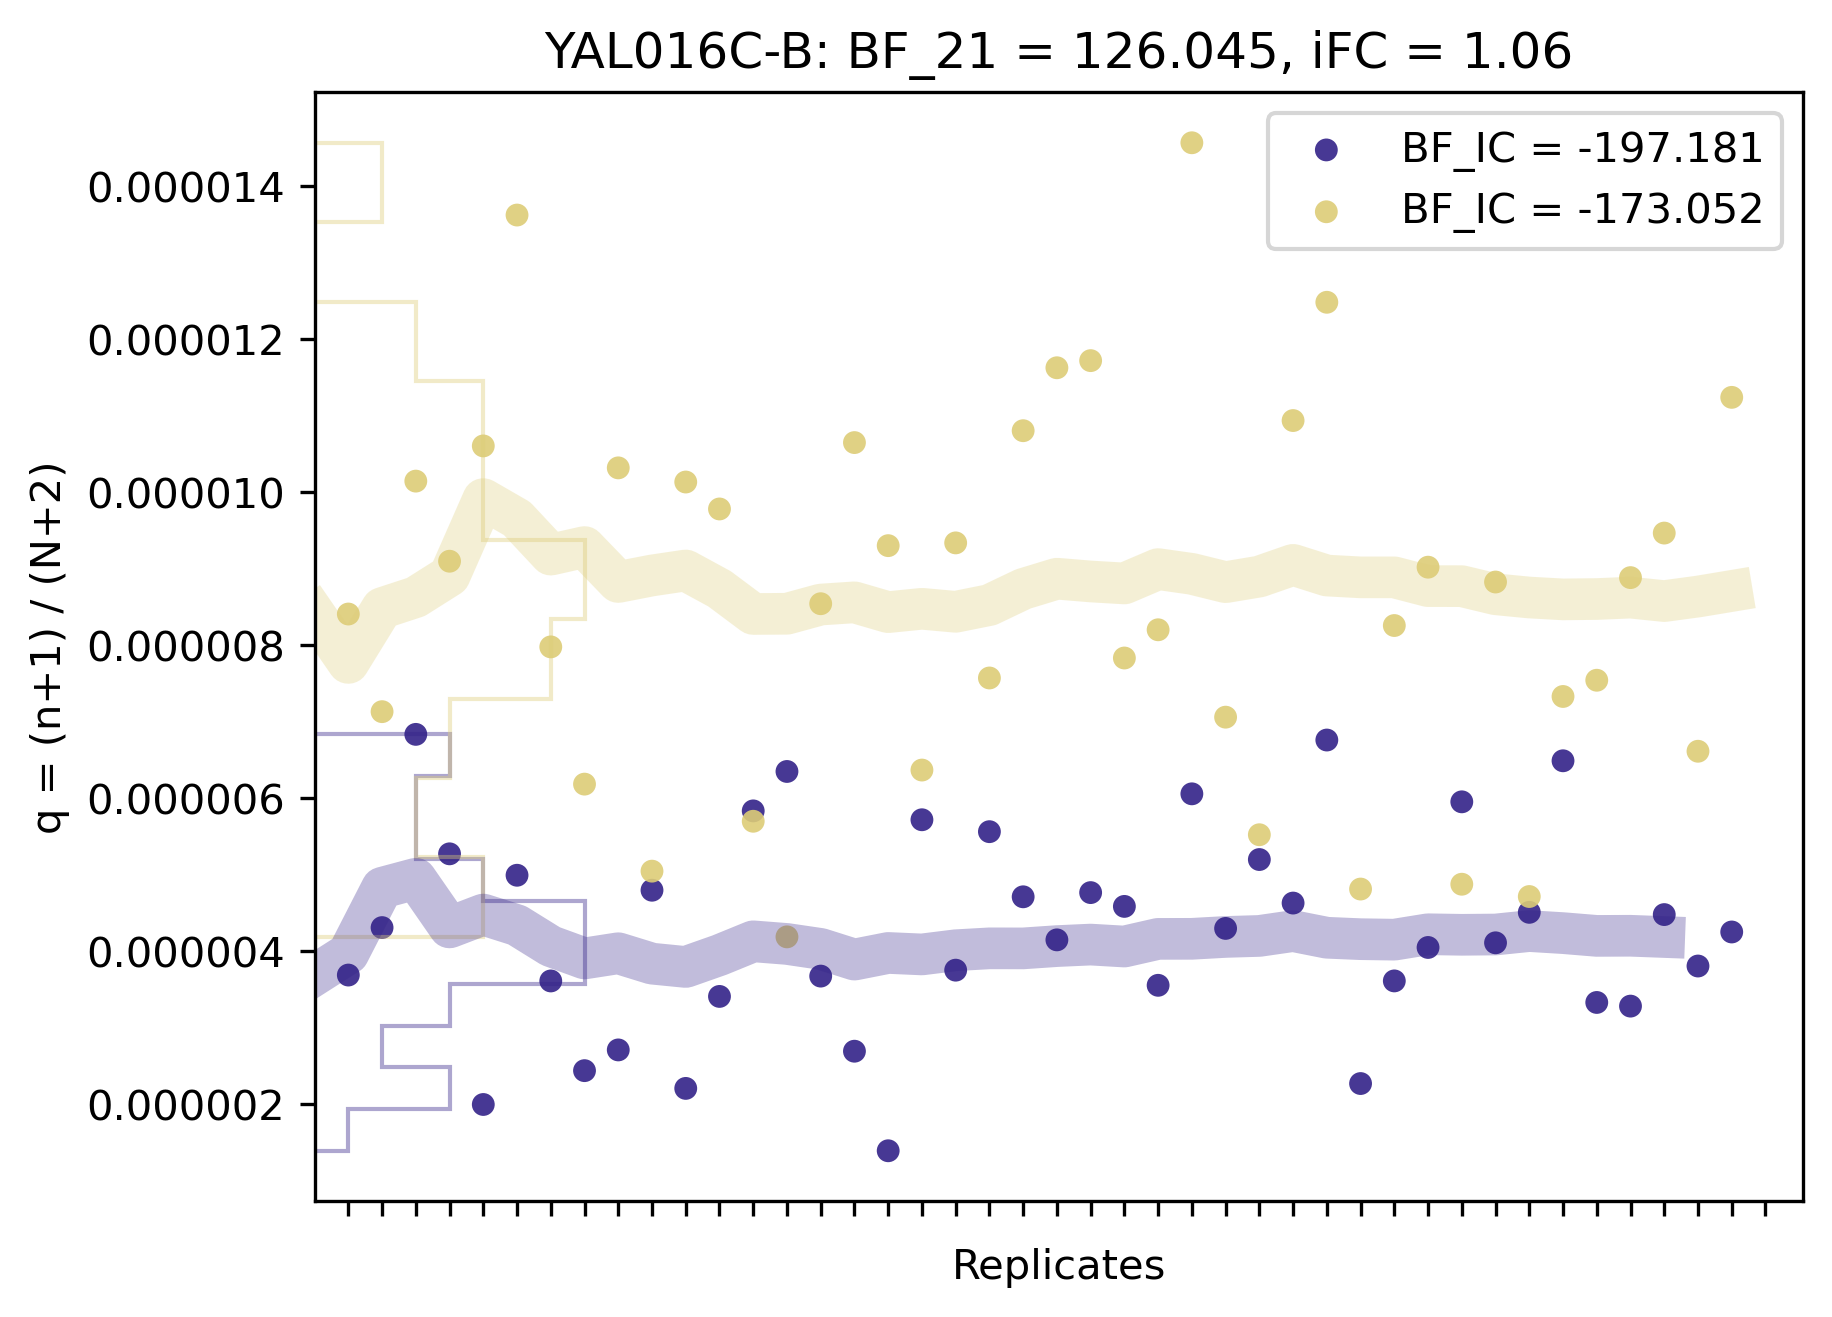

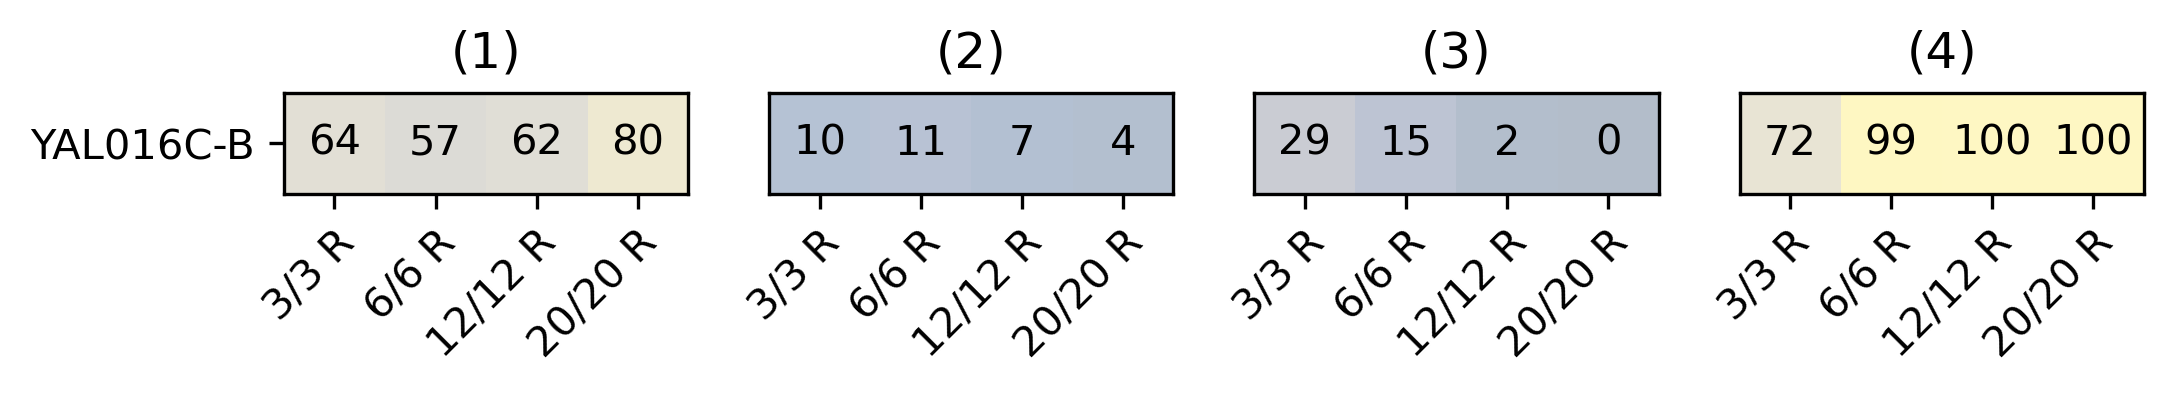

Read counts in WT across replicates:


genes  1  2   3  4  5   6  7  8  9  ...  33  34  35  36  37  38  39  \
95  YAL031W-A  5  7  10  7  3  19  7  3  1  ...   3  10   6   6   7   2   5   

    40  41  42  
95   5   6  11  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes   1   2   3   4   5   6   7  8  9  ...  35  36  37  38  39  40  \
95  YAL031W-A  27  13  12  15  10  38  13  6  6  ...  22   9  15  16  11  24   

    41  42  43  44  
95  18  14  27  17  

[1 rows x 45 columns]

bayexpress results:


locus_name     BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  AOTP_Snf2  \
95  YAL031W-A  29.16  1.276184 -227.526482    False -220.195081      False   

           W  
95  9.357143

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


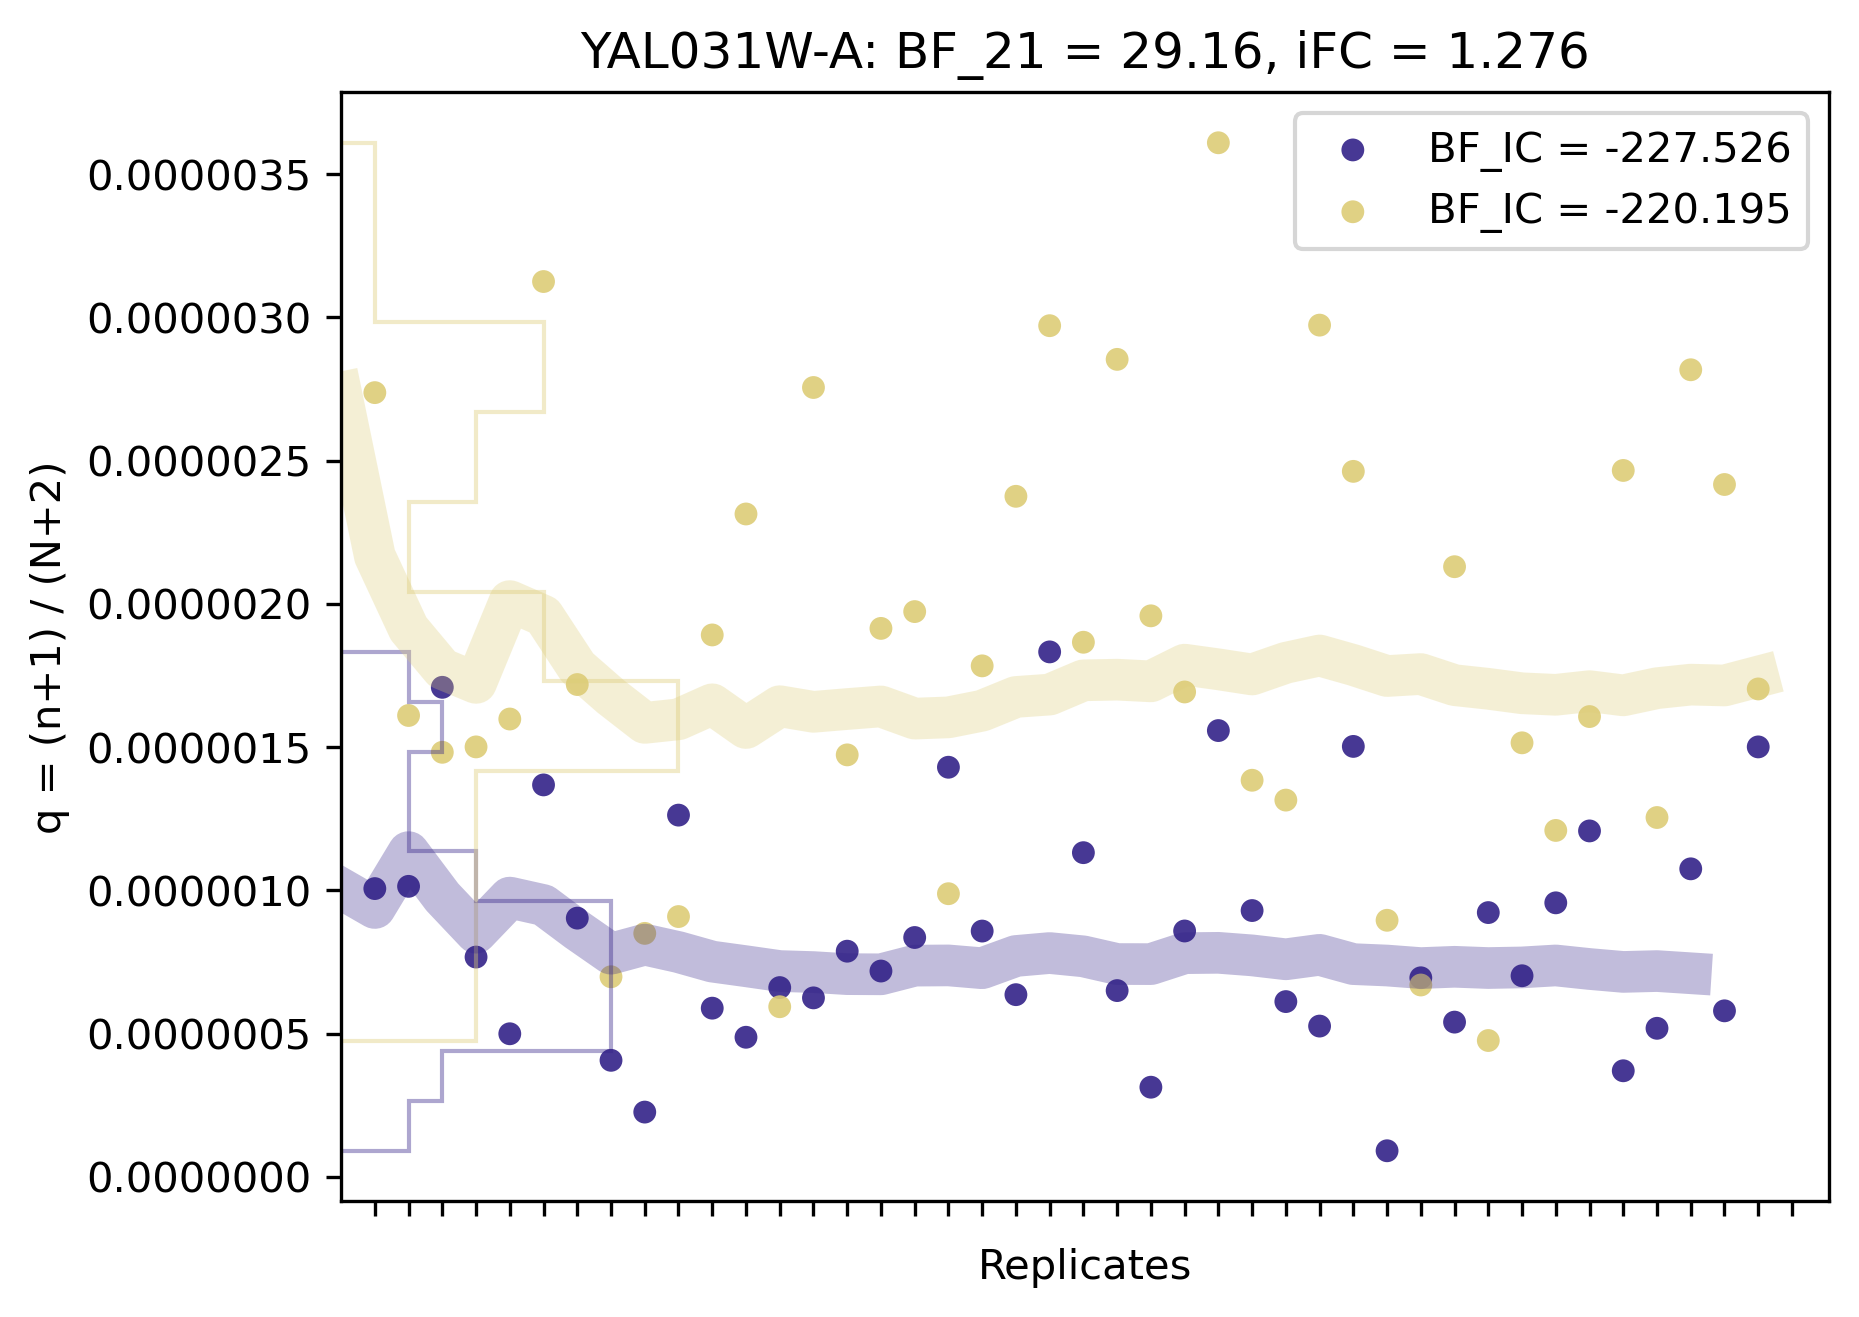

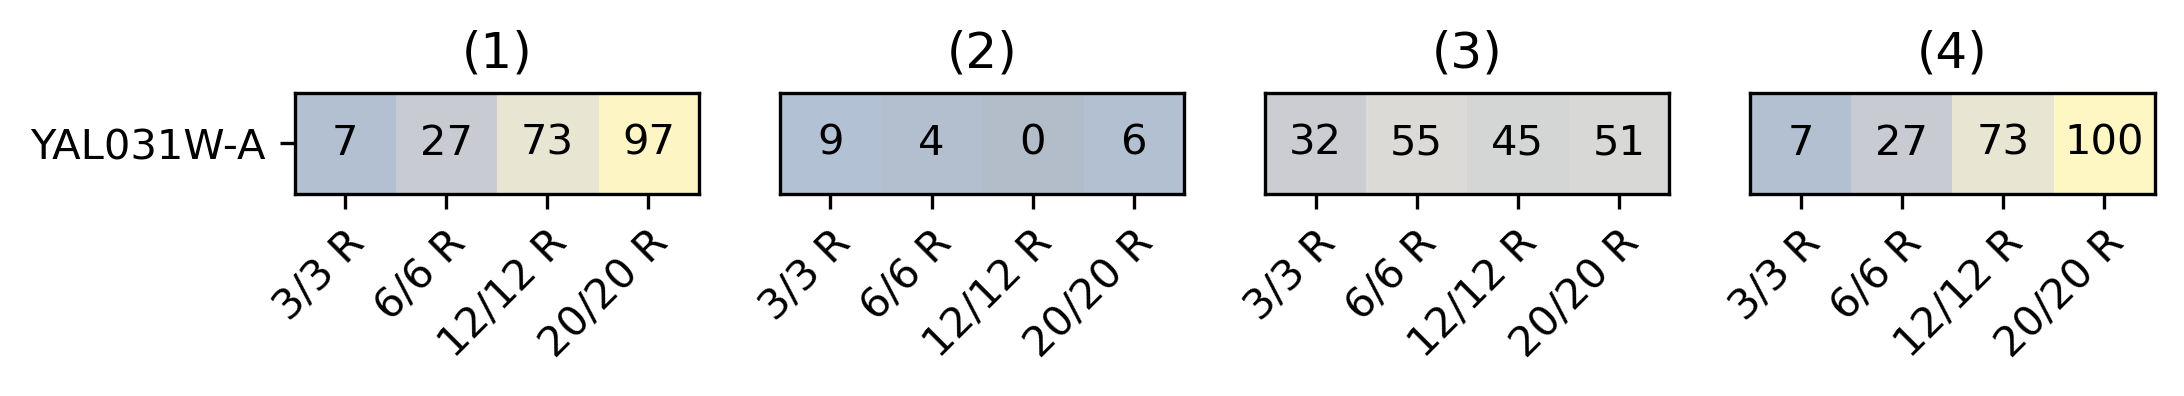

Read counts in WT across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   33   34   35  \
166  YAR035W  193  132  144  221  146  242  156  395  203  ...  137  284  173   

      36   37   38   39   40   41   42  
166  172  114  270  253  144  262  214  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   35   36   37  \
166  YAR035W  584  475  478  575  339  648  562  396  417  ...  879  453  827   

      38   39   40   41   42   43   44  
166  348  480  427  390  410  429  311  

[1 rows x 45 columns]

bayexpress results:


locus_name           BF        FC  BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
166    YAR035W  1011.933095  1.227418  -88.9385    False  -87.148361   

     AOTP_Snf2           W  
166      False  279.880952

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


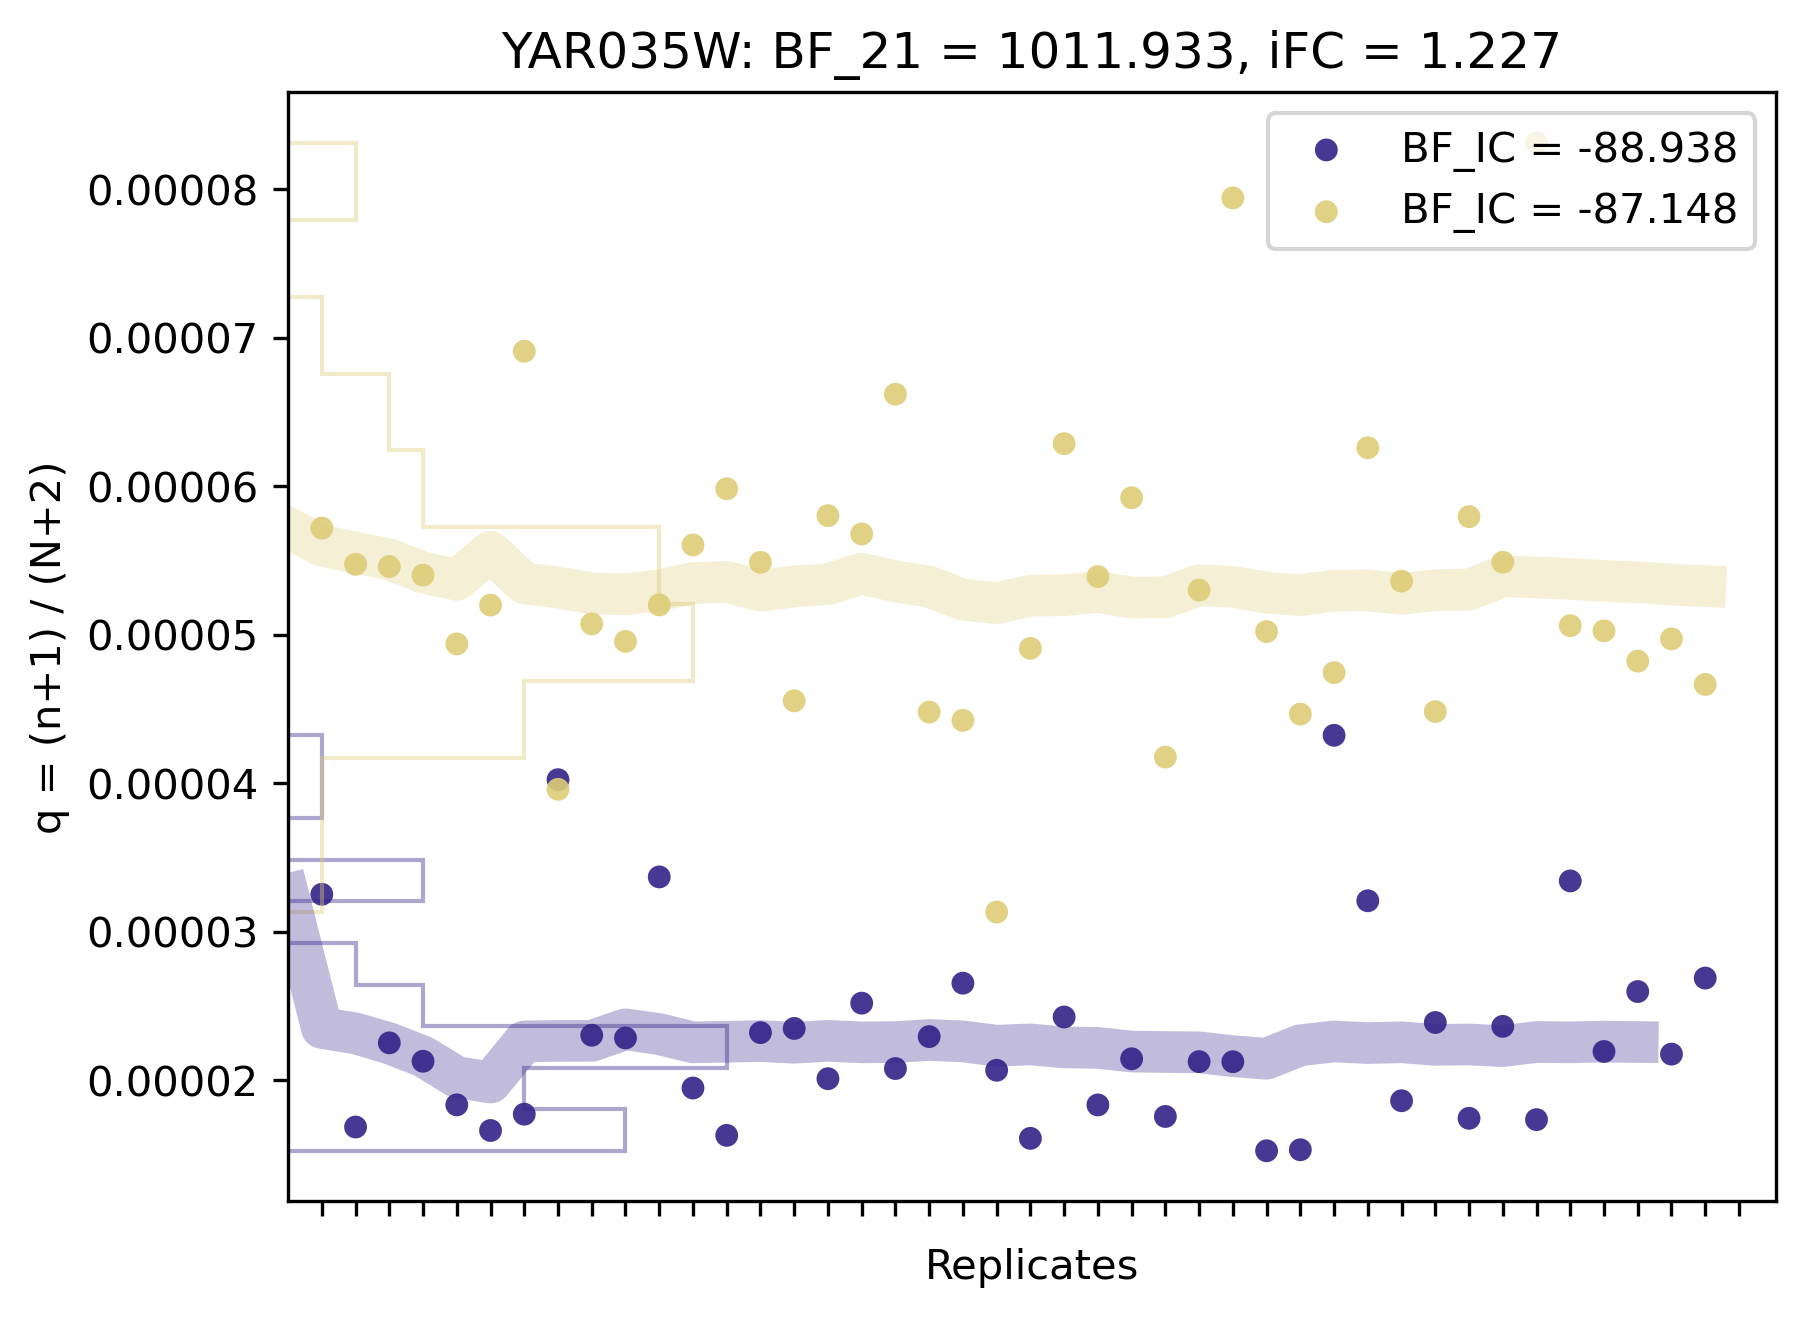

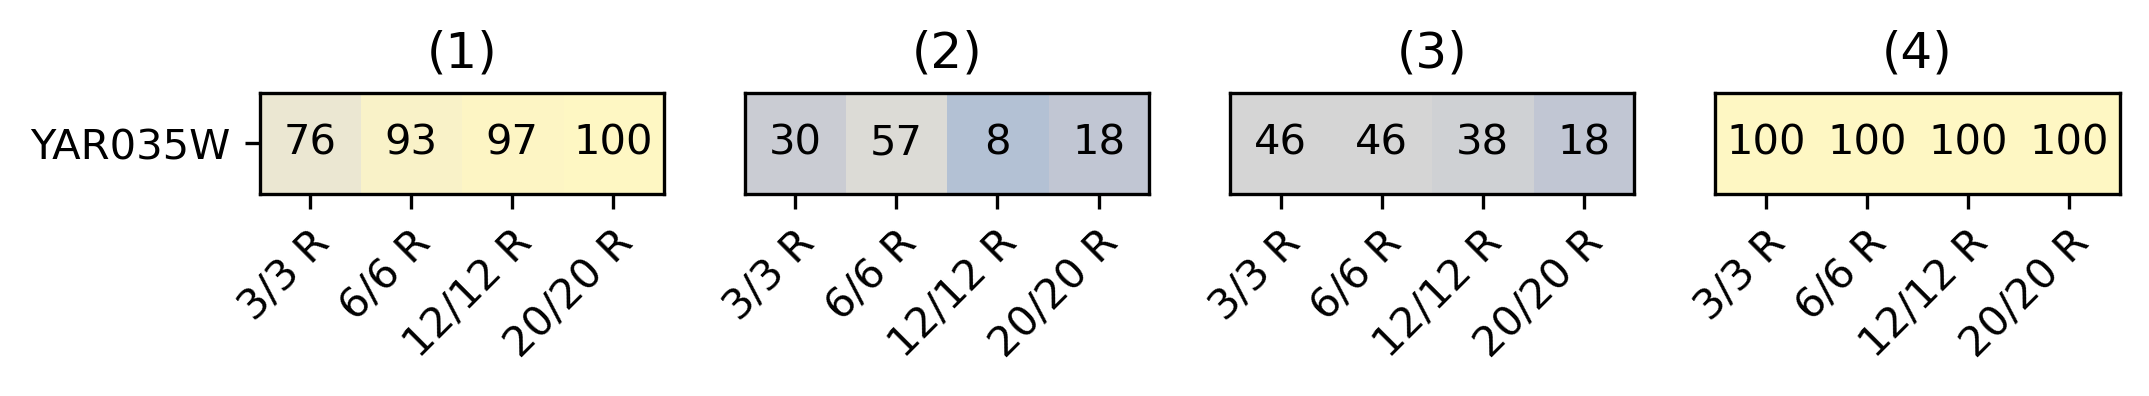

Read counts in WT across replicates:


genes    1   2   3    4   5    6    7    8    9  ...   33   34   35  \
176  YAR068W  119  91  90  136  99  190  122  237  117  ...  122  147  124   

     36  37   38   39  40   41   42  
176  74  82  184  216  58  203  105  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   35   36   37  \
176  YAR068W  318  291  257  322  266  426  296  325  148  ...  528  266  354   

      38   39   40   41   42   43   44  
176  254  356  281  268  251  250  231  

[1 rows x 45 columns]

bayexpress results:


locus_name          BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
176    YAR068W  552.837207  1.145139 -171.270934    False -139.829908   

     AOTP_Snf2          W  
176      False  165.52381

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


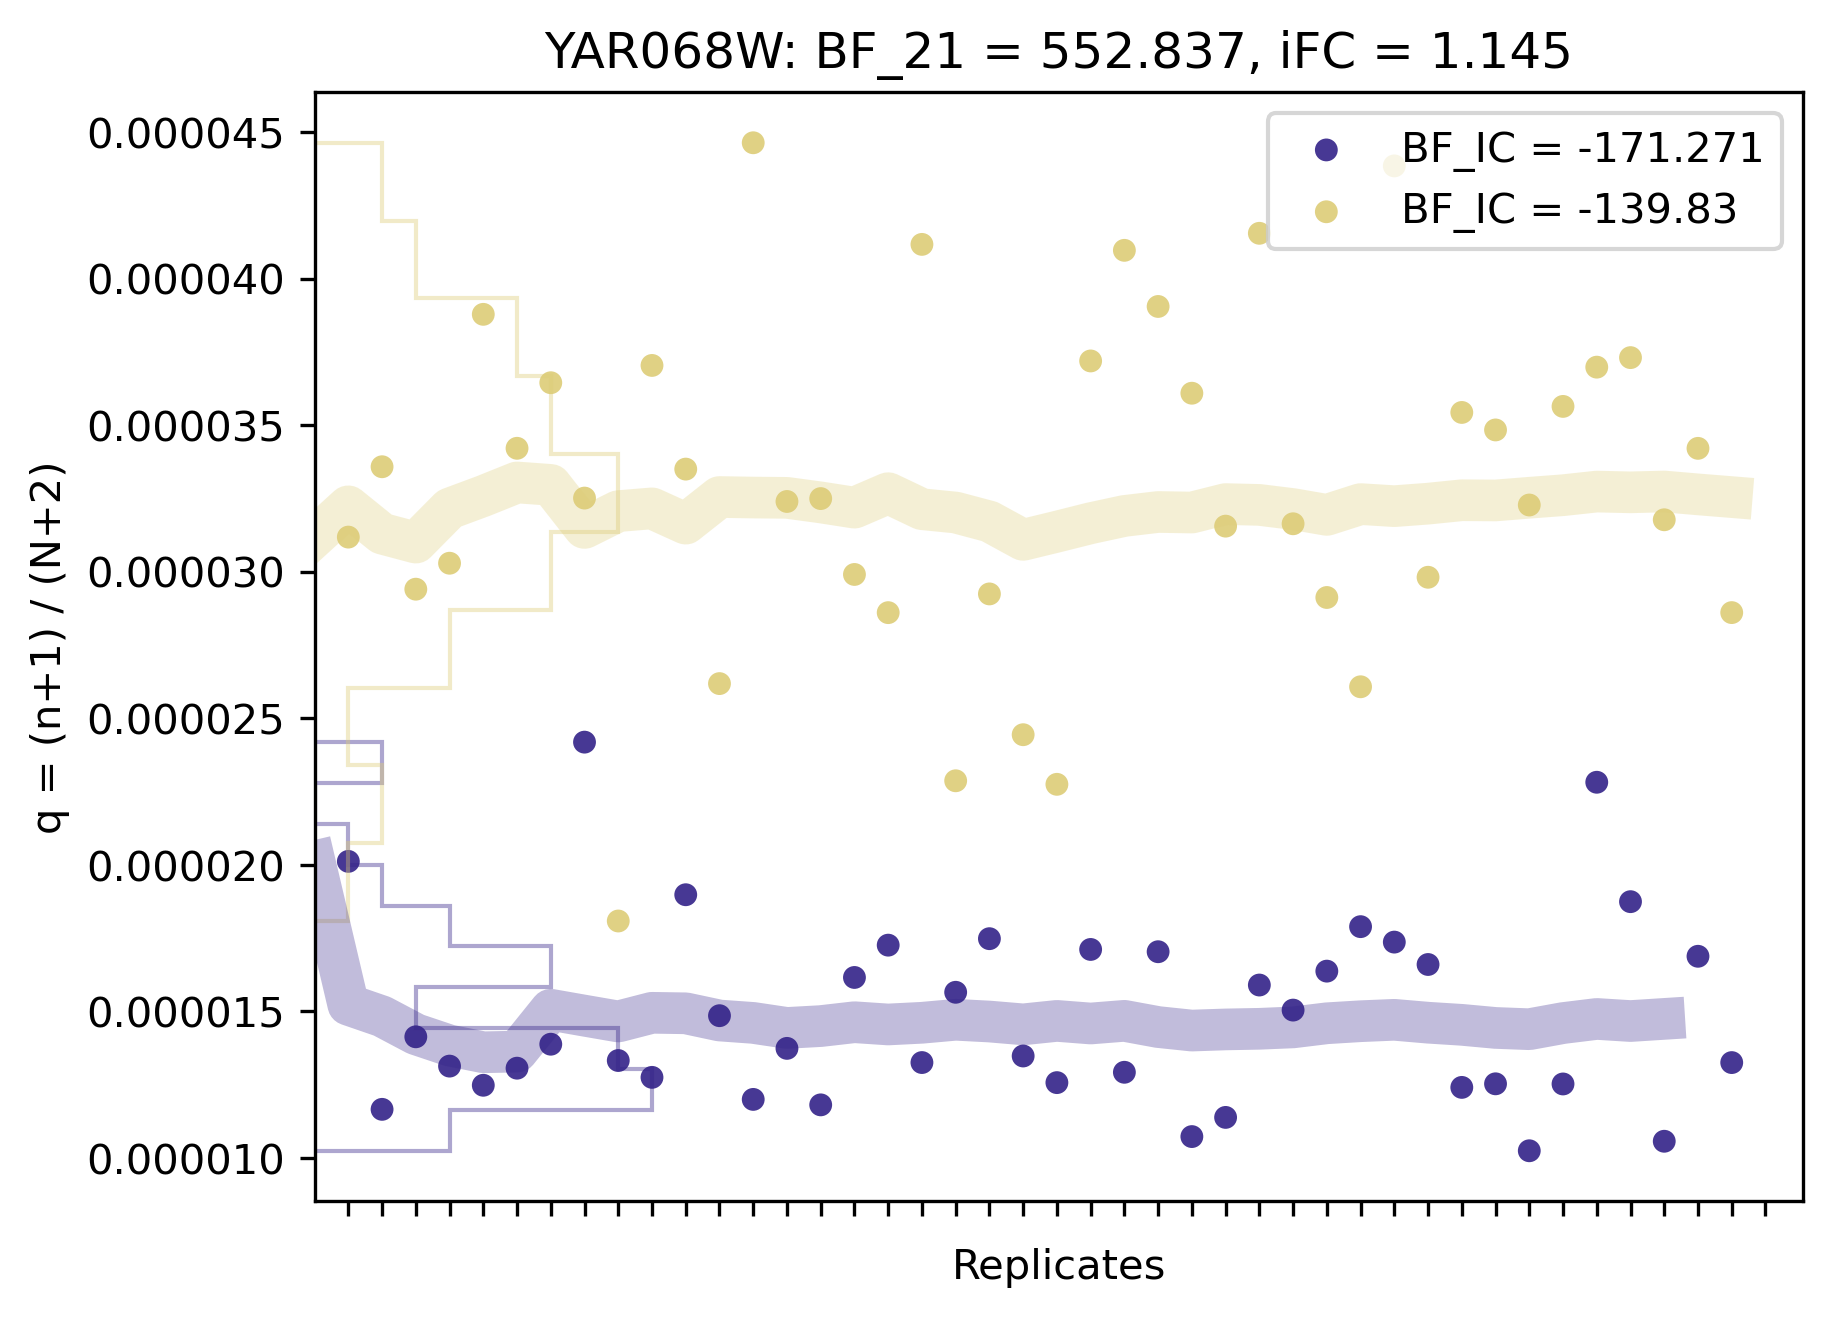

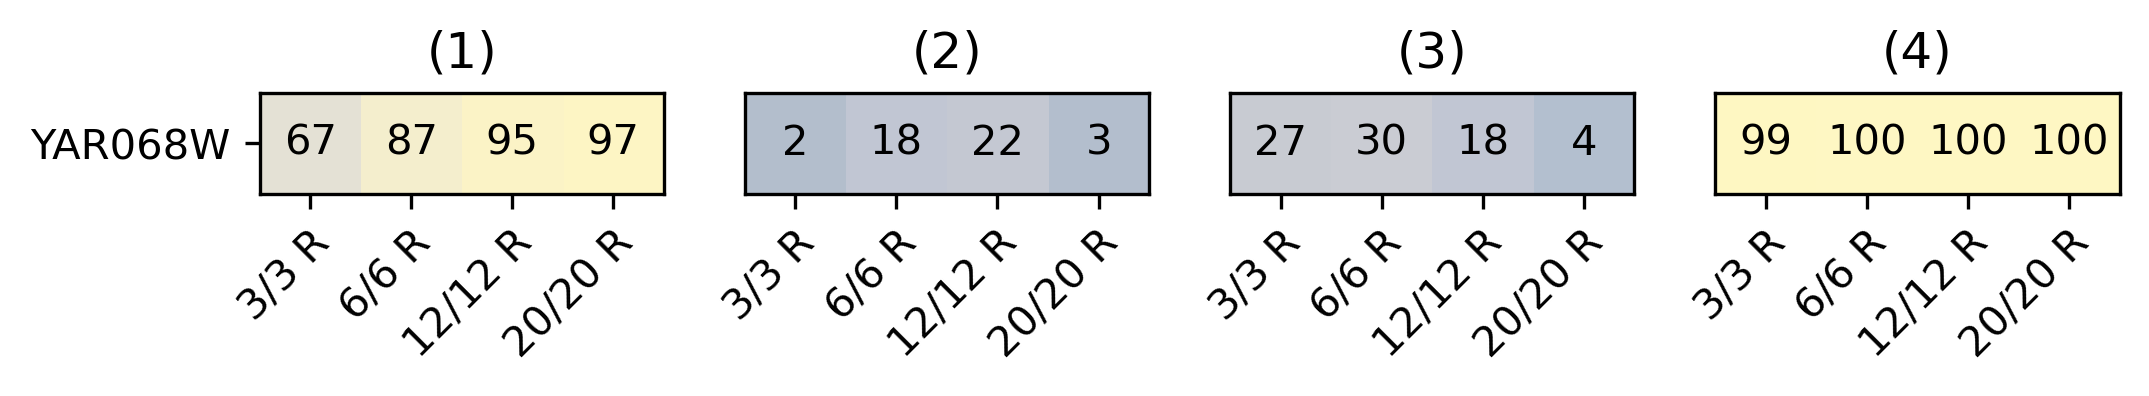

[None, None, None, None]

In [9]:
[stalk([gene]) for gene in ['YAL016C-B', 'YAL031W-A', 'YAR035W', 'YAR068W']]

Read counts in WT across replicates:


genes     1     2     3     4     5     6     7     8     9  ...  \
2392  YGL228W  1122  1471  1195  1892  1497  2856  1679  1894  1642  ...   

        33    34    35    36    37    38    39   40    41    42  
2392  1496  2312  1893  1413  1288  1655  2270  995  2302  1517  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes     1     2     3     4     5     6     7     8     9  ...  \
2392  YGL228W  2639  2223  2312  2872  1667  3109  1968  2406  2213  ...   

        35    36    37    38    39    40    41    42    43    44  
2392  4188  2223  2641  1848  2437  2279  1881  2218  2103  1777  

[1 rows x 45 columns]

bayexpress results:


locus_name          BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
2392    YGL228W  734.162161  0.413575 -170.352819    False -163.984429   

      AOTP_Snf2           W  
2392      False  646.380952

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


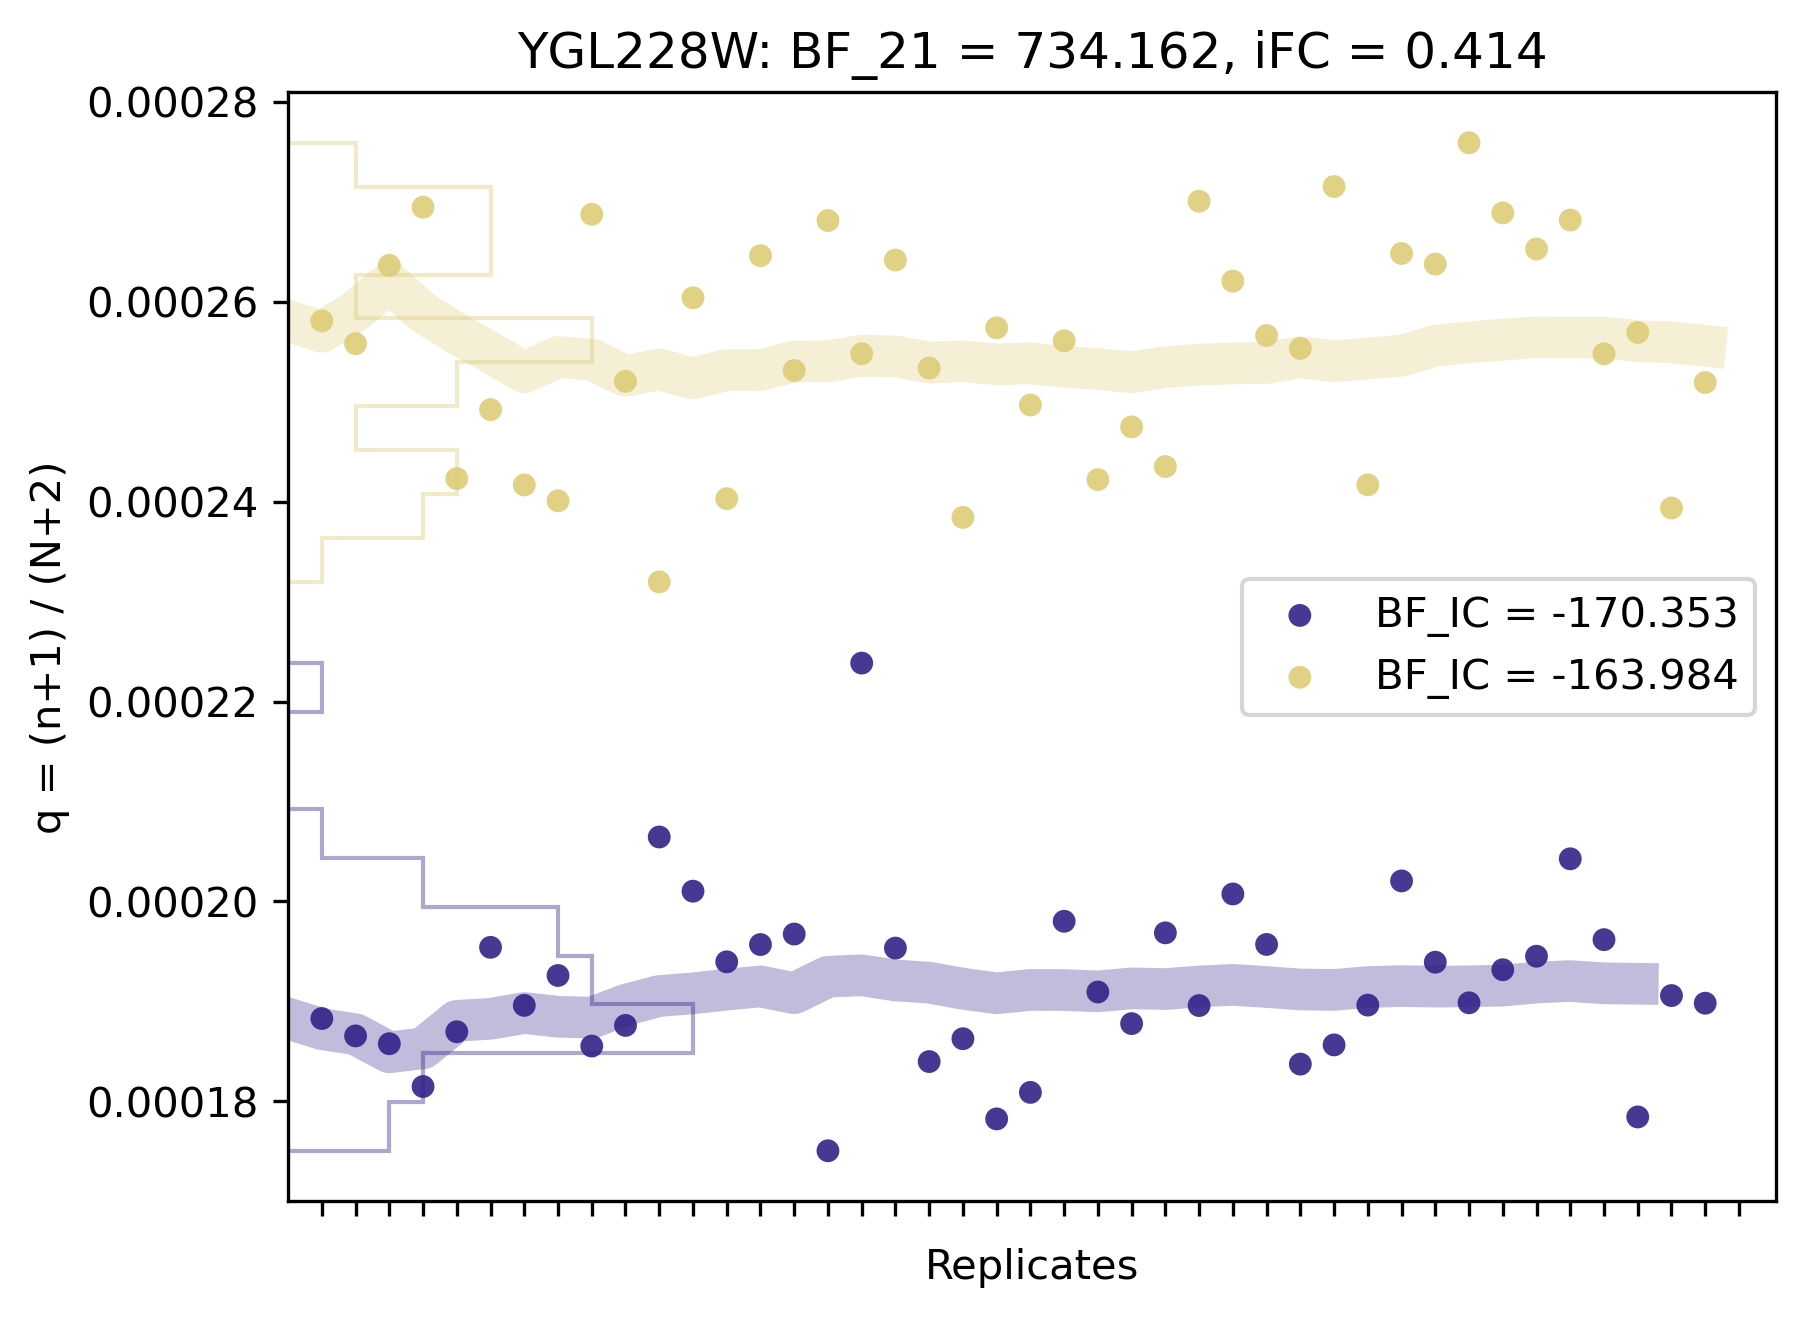

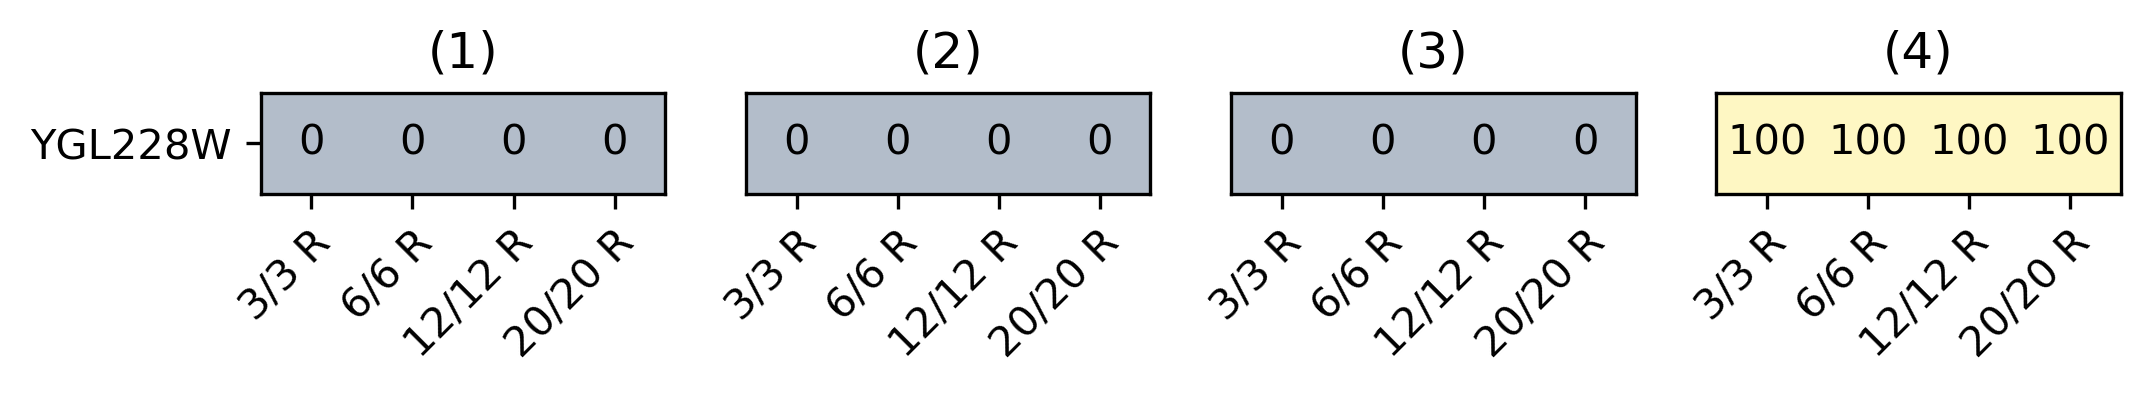

Read counts in WT across replicates:


genes     1     2     3      4     5      6      7      8     9  ...  \
395  YBR078W  6824  9337  7478  13172  8986  17113  10497  11067  9671  ...   

       33     34     35    36    37    38     39    40     41    42  
395  8691  13594  11277  8264  7706  9673  14434  6381  13324  9939  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes      1      2      3      4     5      6     7      8     9  ...  \
395  YBR078W  12495  11380  10844  12078  8963  13687  9785  13099  9220  ...   

        35    36     37    38     39     40     41     42     43    44  
395  17699  9657  11872  9318  12682  10478  10435  11837  10656  9764  

[1 rows x 45 columns]

bayexpress results:


locus_name          BF        FC  BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
395    YBR078W  163.131687  0.084818 -0.154711    False  278.297316   

     AOTP_Snf2           W  
395       True  1088.52381

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


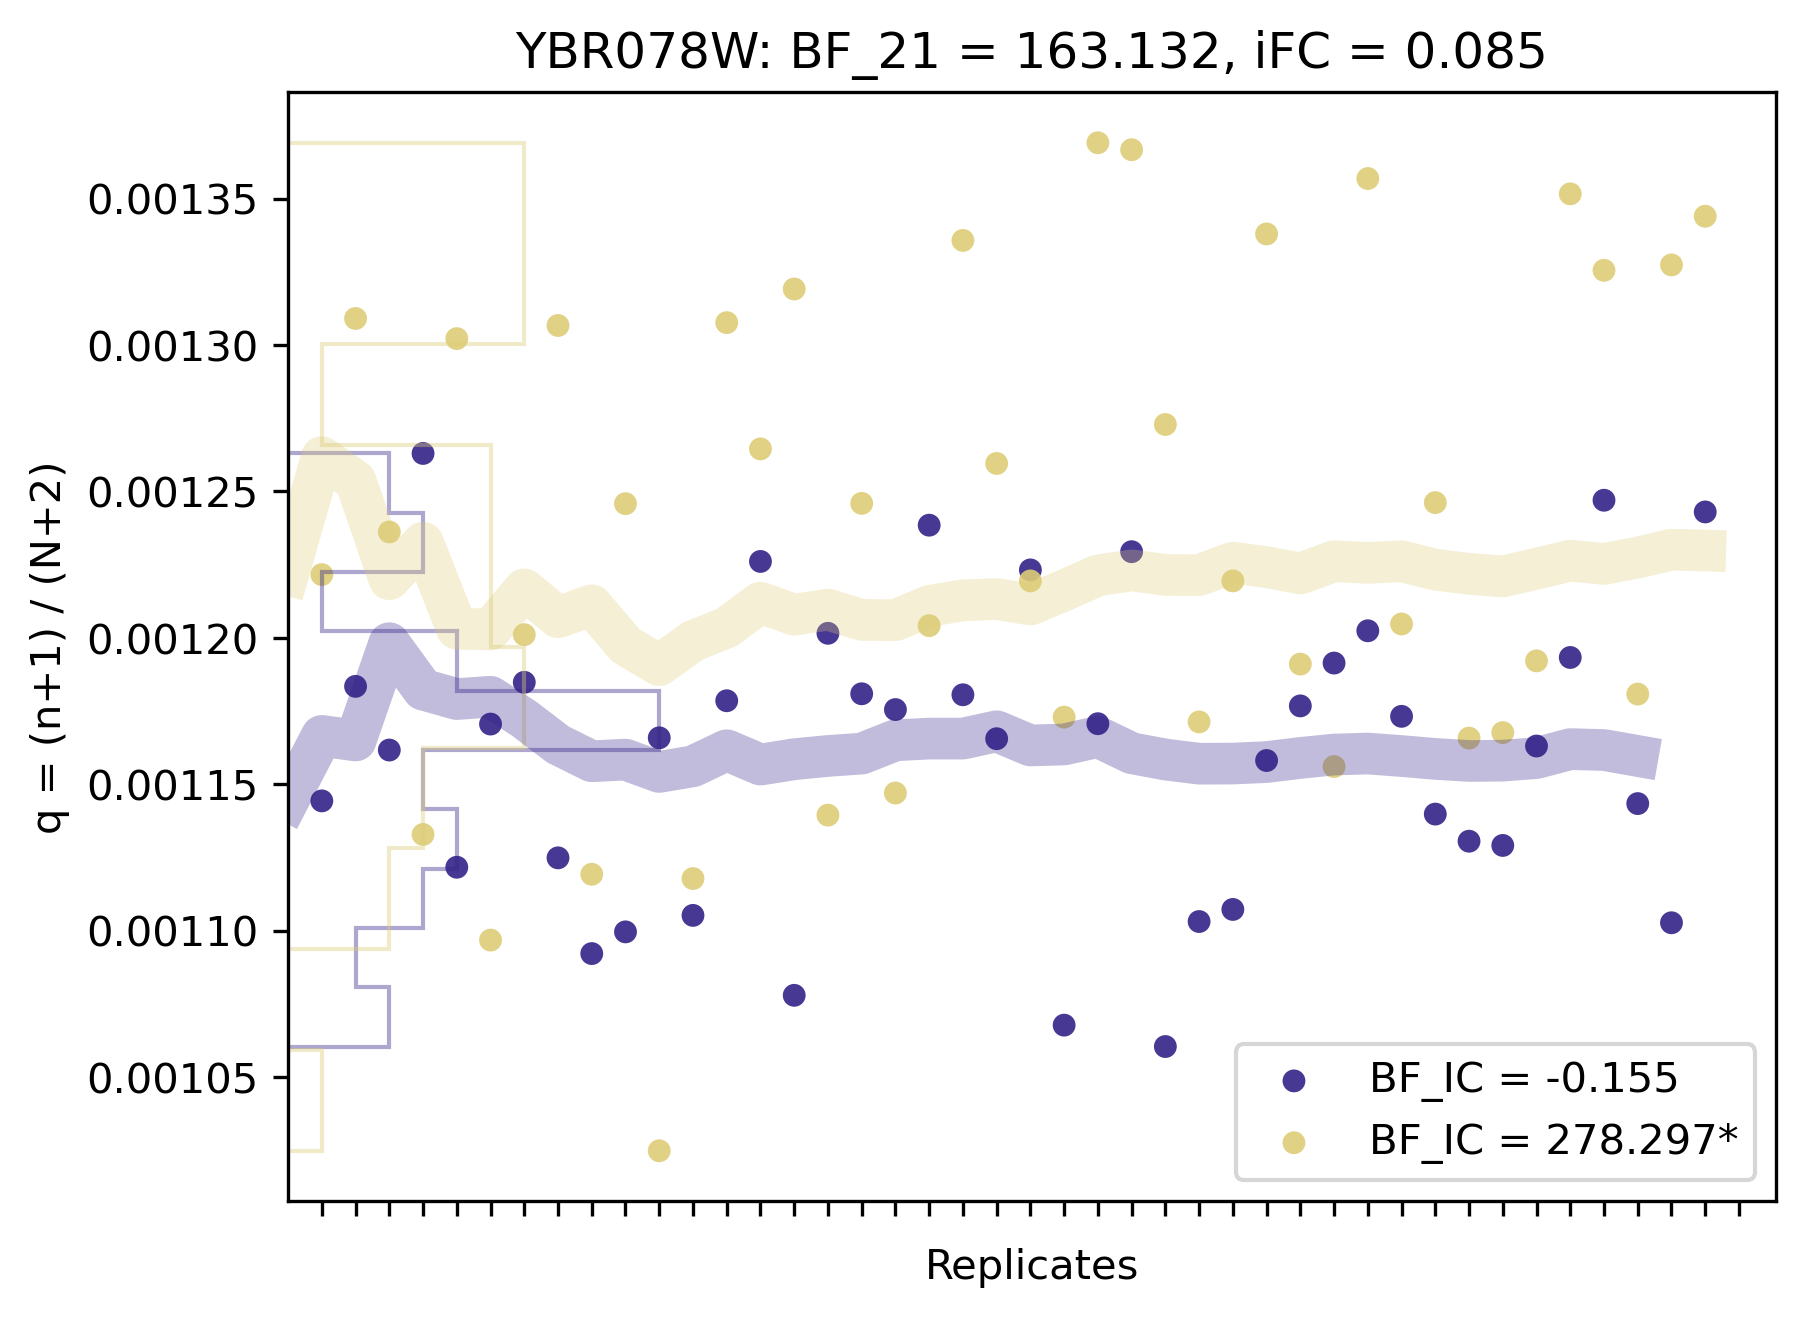

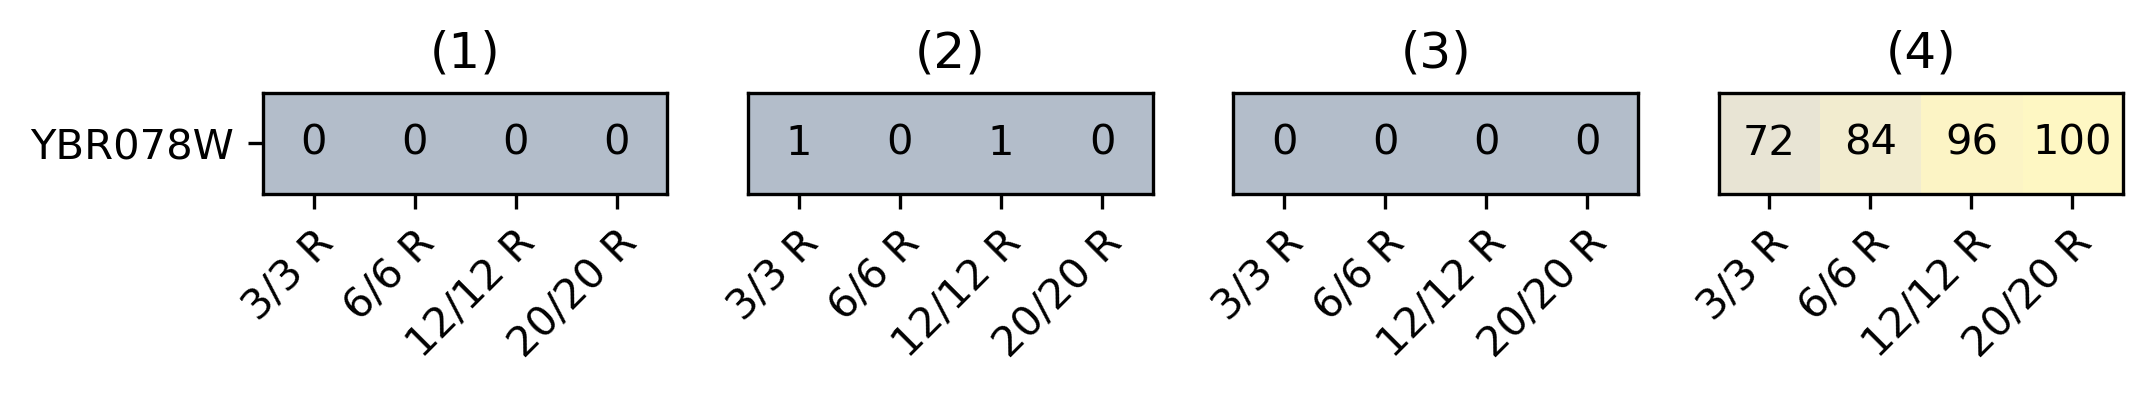

Read counts in WT across replicates:


genes     1     2     3     4     5     6     7     8     9  ...  \
3179  YIL094C  1744  2539  1824  3084  2347  4363  2772  3019  2622  ...   

        33    34    35    36    37    38    39    40    41    42  
3179  2315  3499  2998  2146  1856  2513  3661  1687  3811  2254  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes     1     2     3     4     5     6     7     8     9  ...  \
3179  YIL094C  1753  1543  1387  1617  1174  1857  1478  1731  1210  ...   

        35    36    37    38    39    40    41    42    43    44  
3179  2503  1342  1815  1141  1464  1468  1335  1432  1521  1184  

[1 rows x 45 columns]

bayexpress results:


locus_name           BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
3179    YIL094C  3256.618809 -0.861366 -150.200504    False -171.690121   

      AOTP_Snf2            W  
3179      False  1091.261905

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


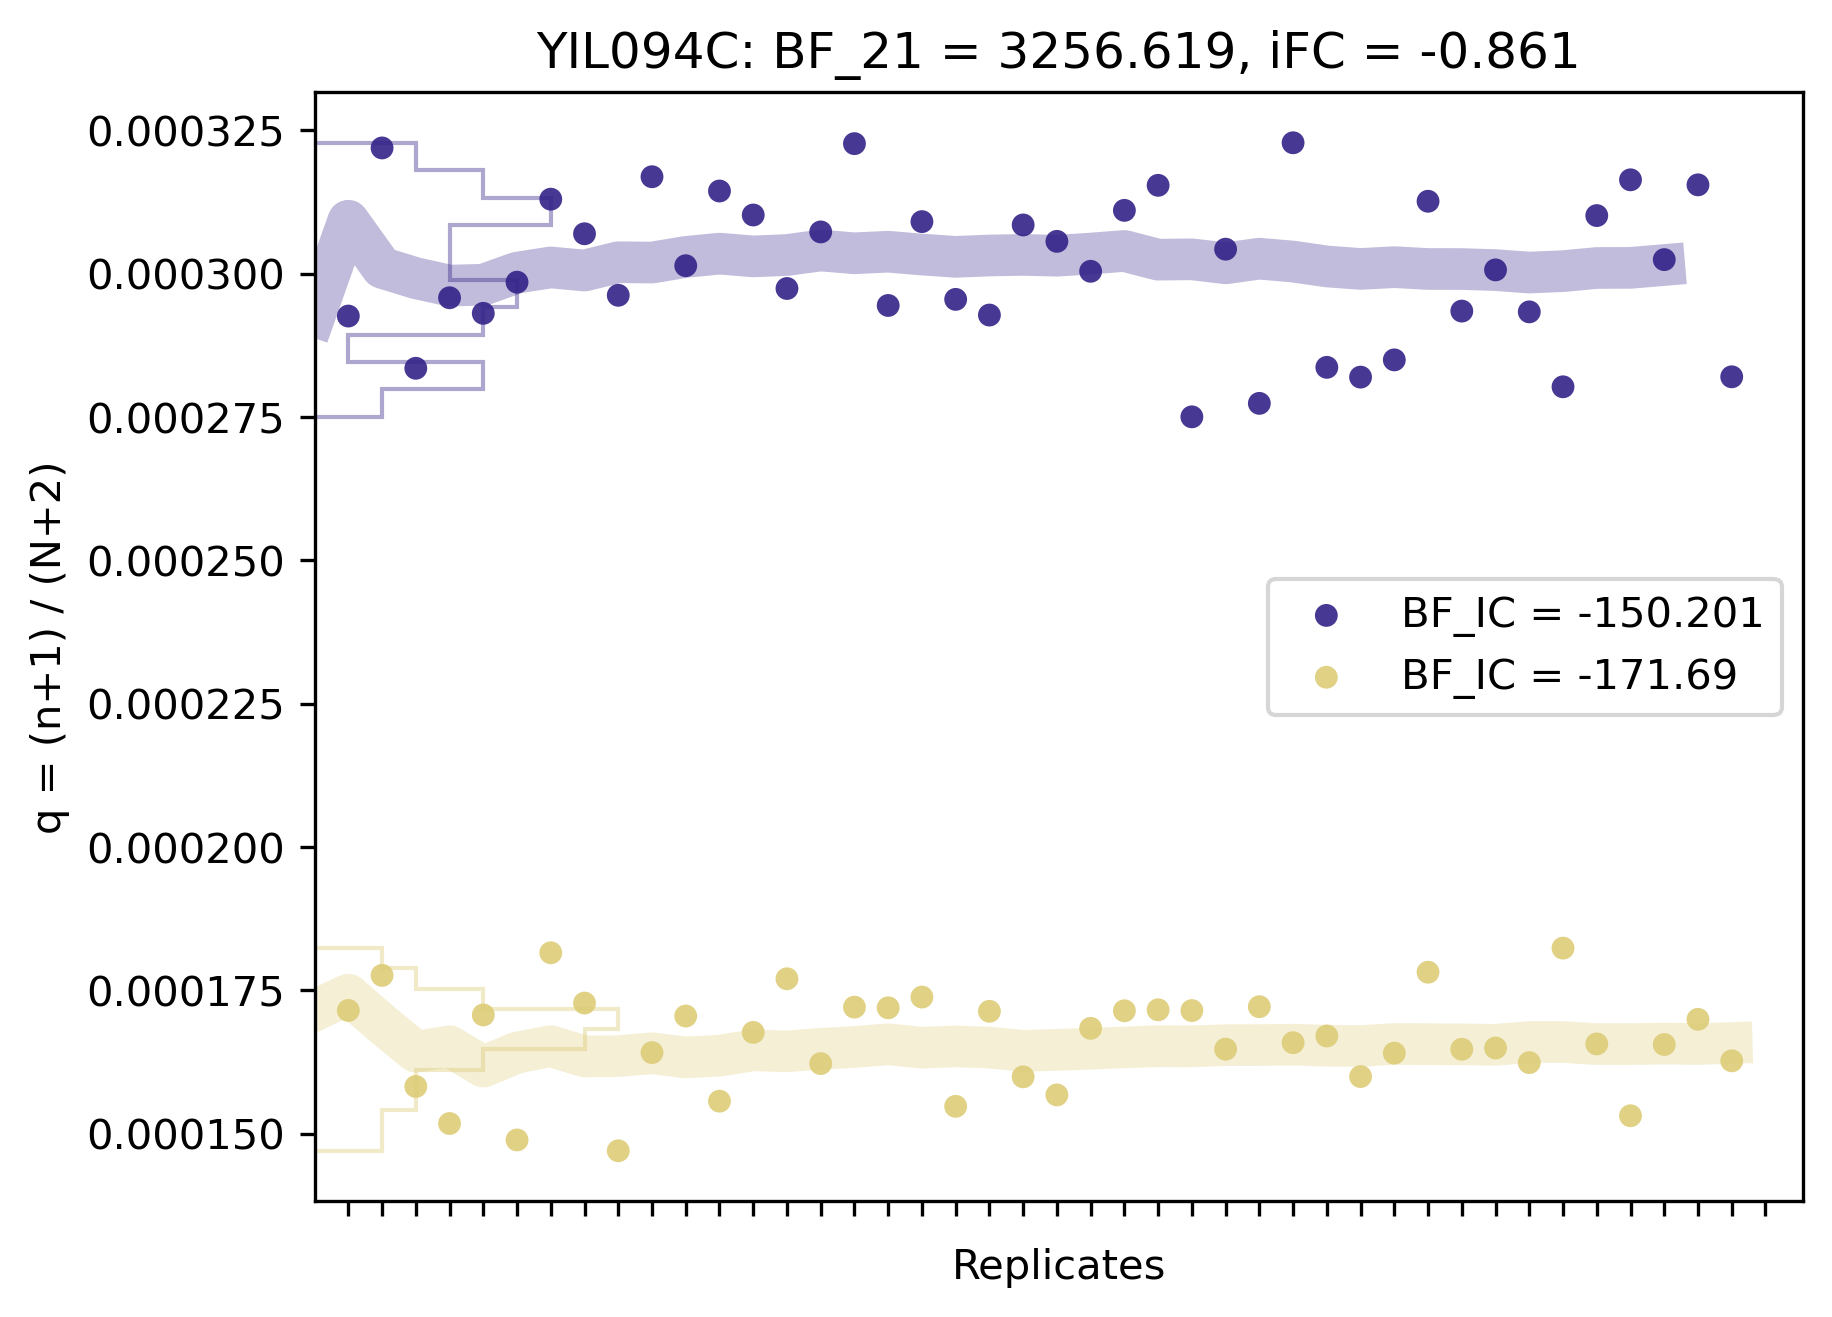

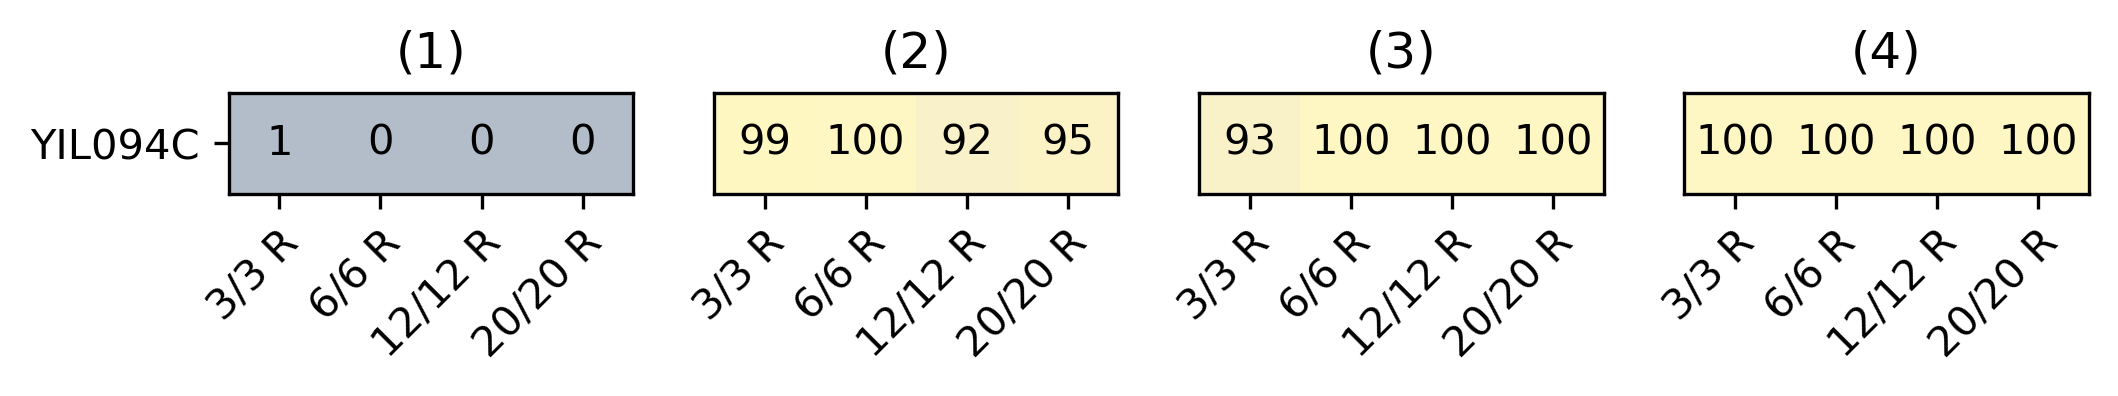

Read counts in WT across replicates:


genes      1      2      3      4      5      6      7      8      9  \
2417  YGL253W  16947  22007  19773  29671  21819  40508  26237  30426  24864   

      ...     33     34     35     36     37     38     39     40     41  \
2417  ...  21124  34287  26821  21482  19087  23306  32459  16215  33248   

         42  
2417  22441  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes      1      2      3      4      5      6      7      8      9  \
2417  YGL253W  32160  26611  26422  30372  18786  37250  26768  29112  23861   

      ...     35     36     37     38     39     40     41     42     43  \
2417  ...  43465  23810  30315  20020  26317  26666  21046  23698  25546   

         44  
2417  17457  

[1 rows x 45 columns]

bayexpress results:


locus_name         BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
2417    YGL253W  12.997108  0.017858  209.824321     True  628.468949   

      AOTP_Snf2            W  
2417       True  1519.309524

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


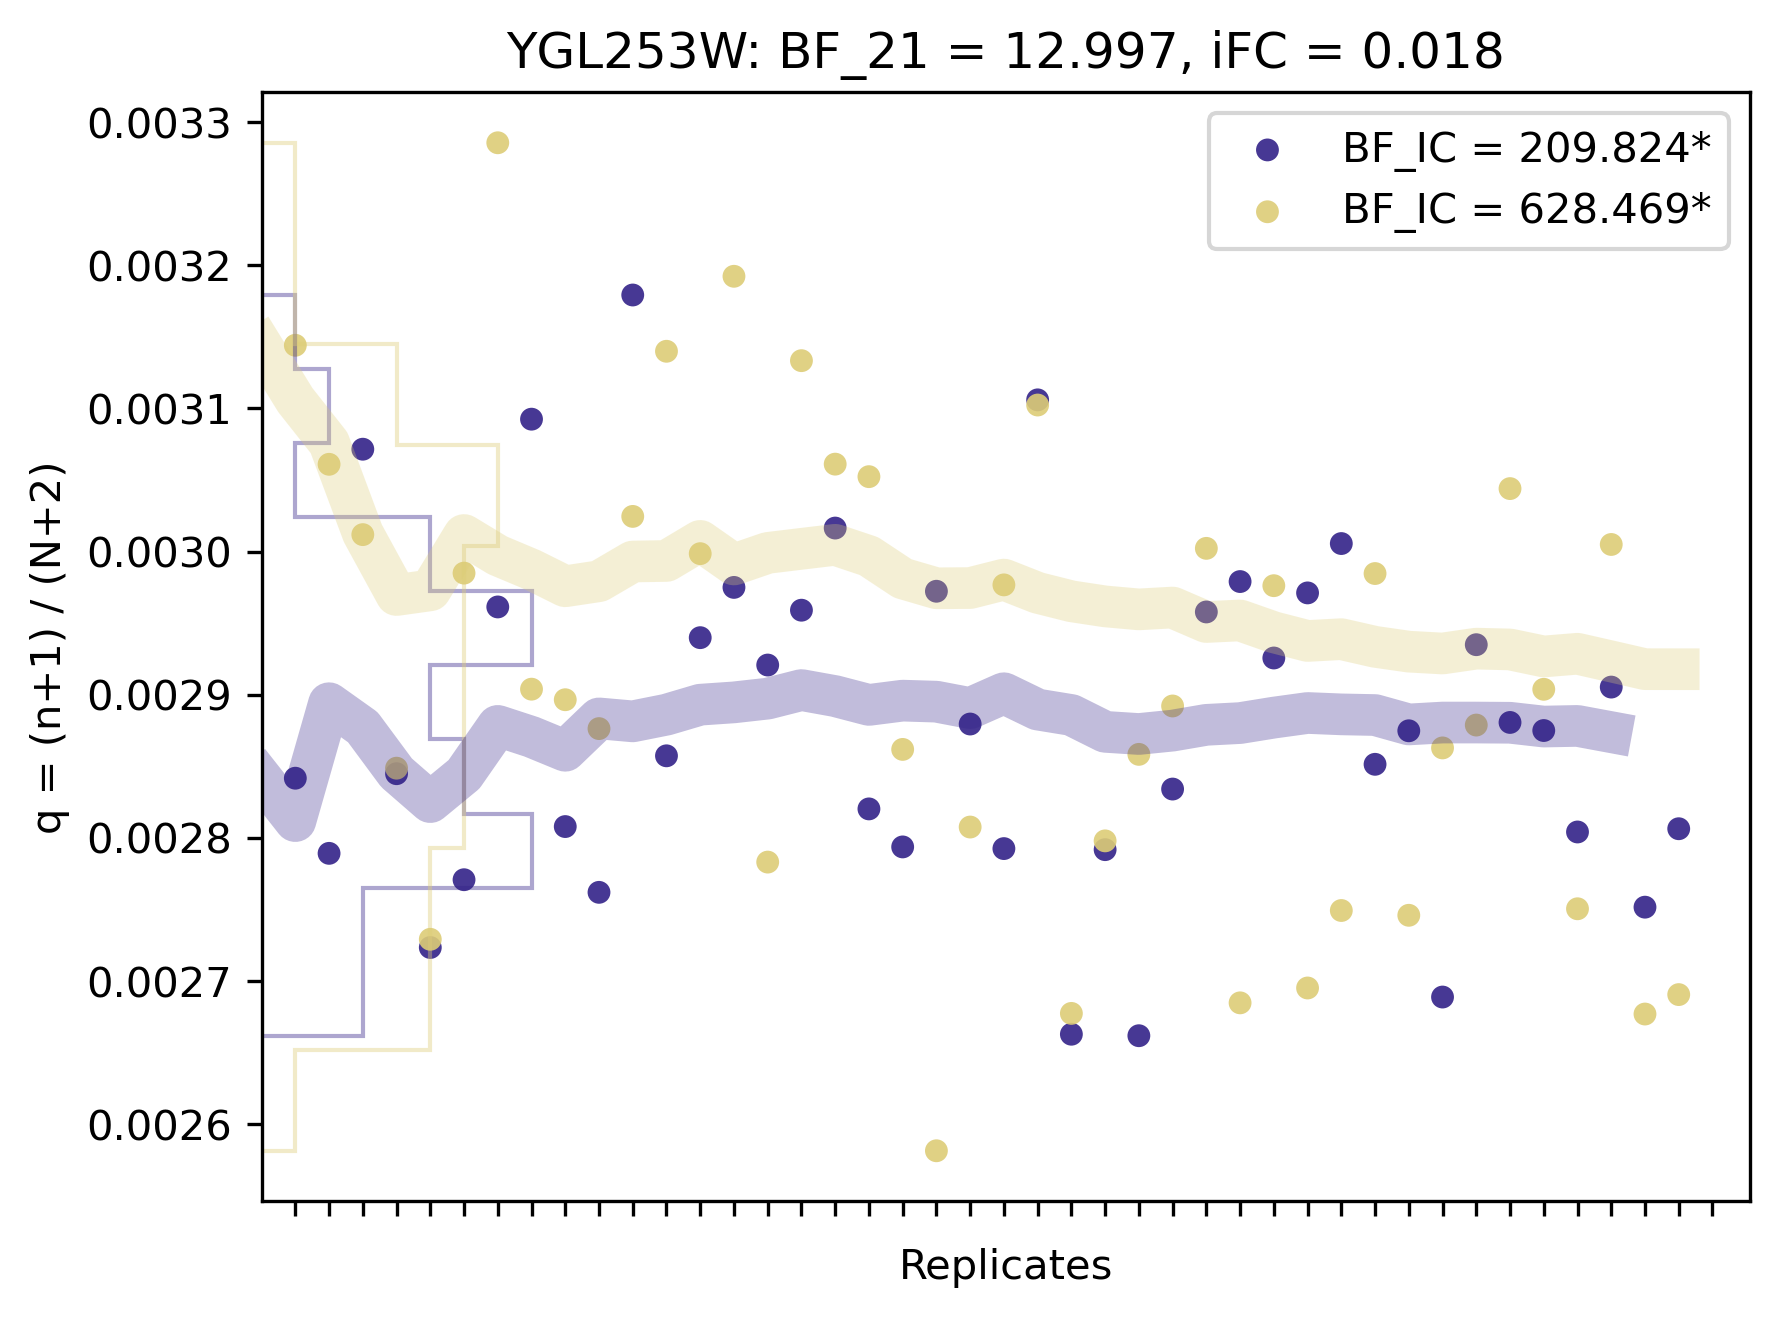

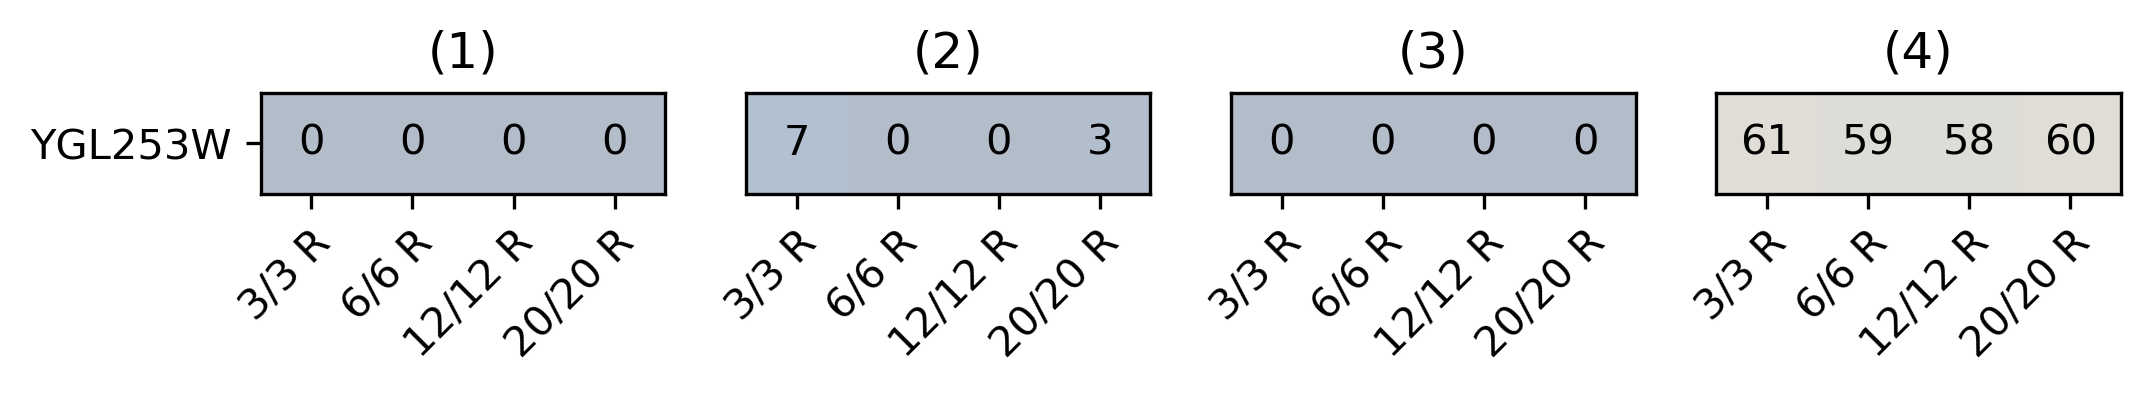

[None, None, None, None]

In [10]:
[stalk([gene]) for gene in ['YGL228W', 'YBR078W', 'YIL094C', 'YGL253W']]

Read counts in WT across replicates:


genes       1       2       3       4       5       6       7       8  \
2639  YGR192C  188825  196804  172119  328674  225435  357247  261535  343455   

           9  ...      33      34      35      36      37      38      39  \
2639  268394  ...  246621  358116  278531  209062  191739  318398  338511   

          40      41      42  
2639  169415  348635  244192  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes       1       2       3       4       5       6       7       8  \
2639  YGR192C  205731  199983  210124  204494  158243  242692  209080  210681   

           9  ...      35      36      37      38      39      40      41  \
2639  178901  ...  323457  180745  239701  163673  219417  167478  177709   

          42      43      44  
2639  170179  160083  142435  

[1 rows x 45 columns]

bayexpress results:


locus_name             BF        FC      BF_IC_WT  AOTP_WT    BF_IC_Snf2  \
2639    YGR192C  101517.928512 -0.456369  52530.251796     True  23438.201797   

      AOTP_Snf2             W  
2639       True  58199.261905

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


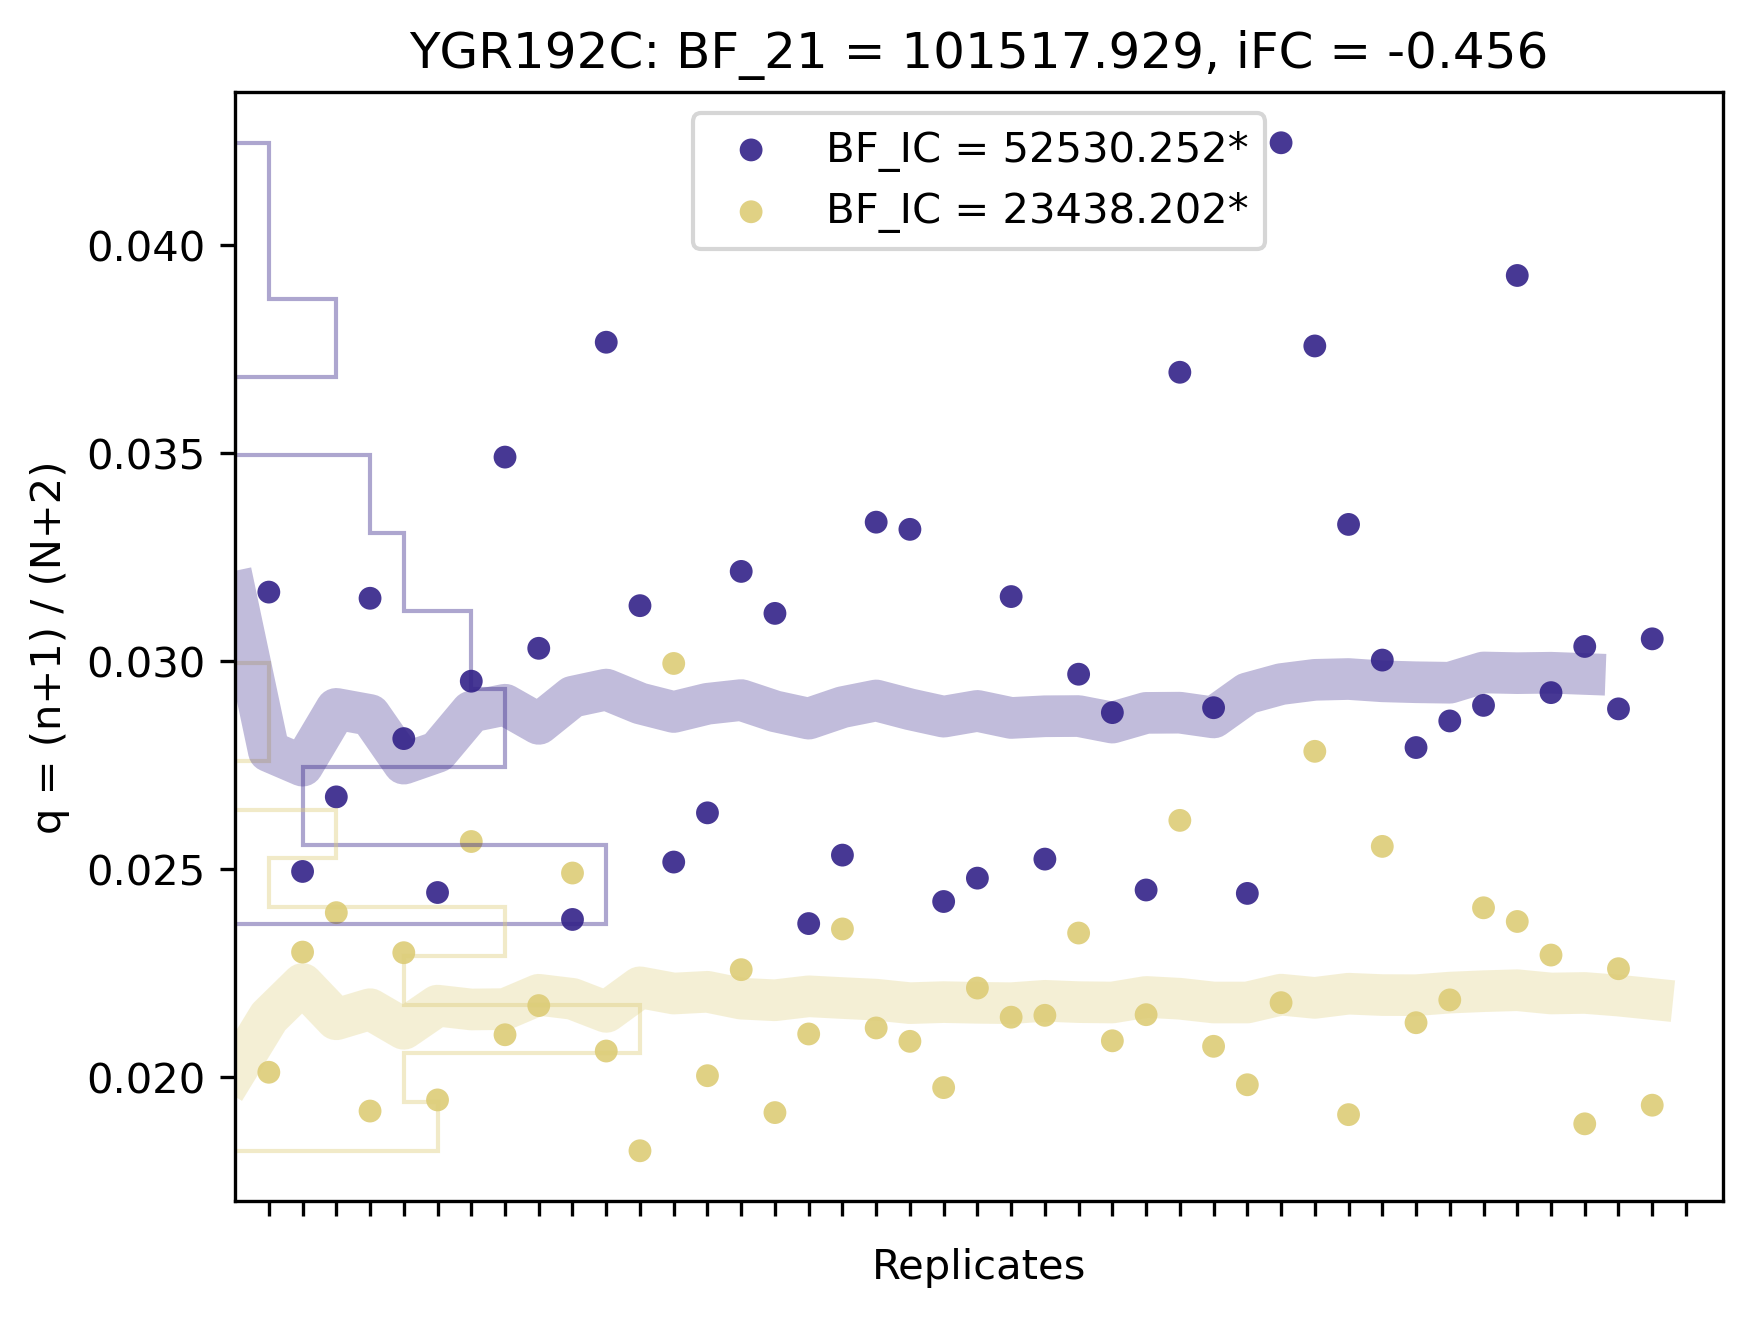

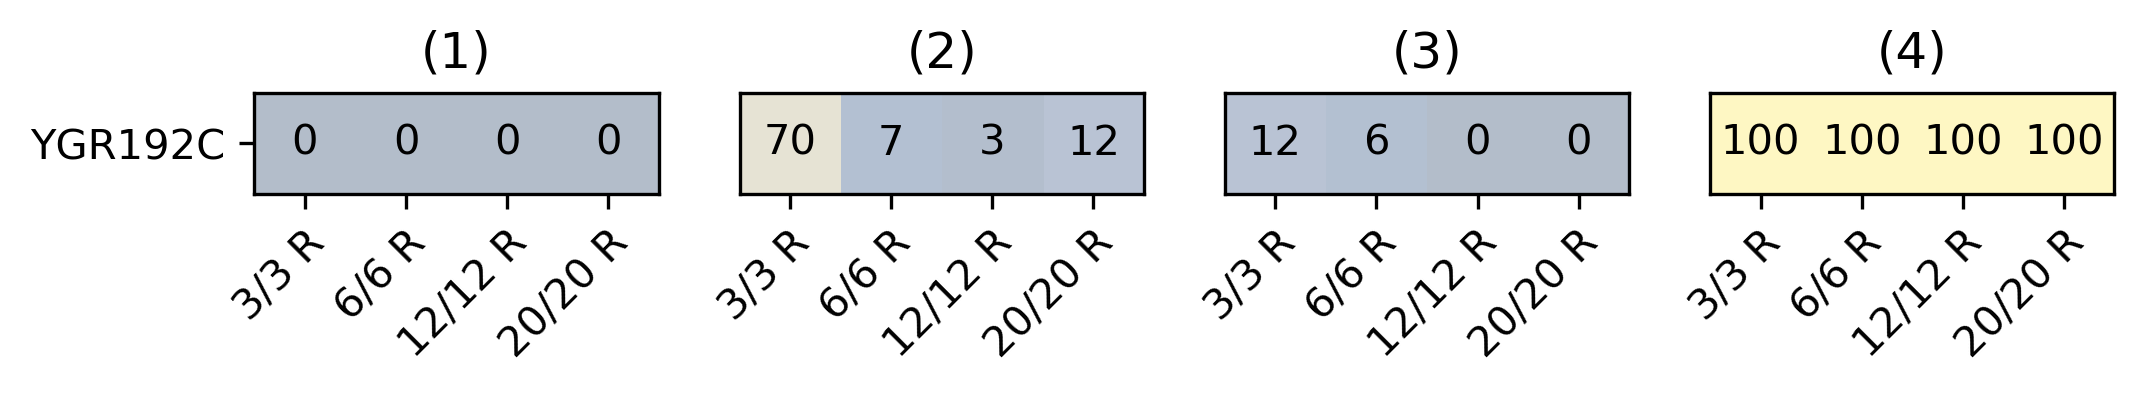

Read counts in WT across replicates:


genes      1      2      3      4      5      6      7      8      9  \
6209  YOR383C  12713  11599  10437  18694  10940  21254  11928  20445  14405   

      ...     33     34     35     36     37     38     39    40     41     42  
6209  ...  11286  21585  17444  12251  10503  16357  18733  8162  19044  14295  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes      1      2      3      4      5      6      7      8      9  \
6209  YOR383C  36728  39745  40978  49945  33631  56767  31049  52374  33049   

      ...     35     36     37     38     39     40     41     42     43  \
6209  ...  60183  37108  50351  34465  46750  37686  43105  47984  34235   

         44  
6209  29763  

[1 rows x 45 columns]

bayexpress results:


locus_name             BF        FC     BF_IC_WT  AOTP_WT    BF_IC_Snf2  \
6209    YOR383C  118338.158193  1.478789  1920.042323     True  10685.558763   

      AOTP_Snf2             W  
6209       True  27562.380952

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


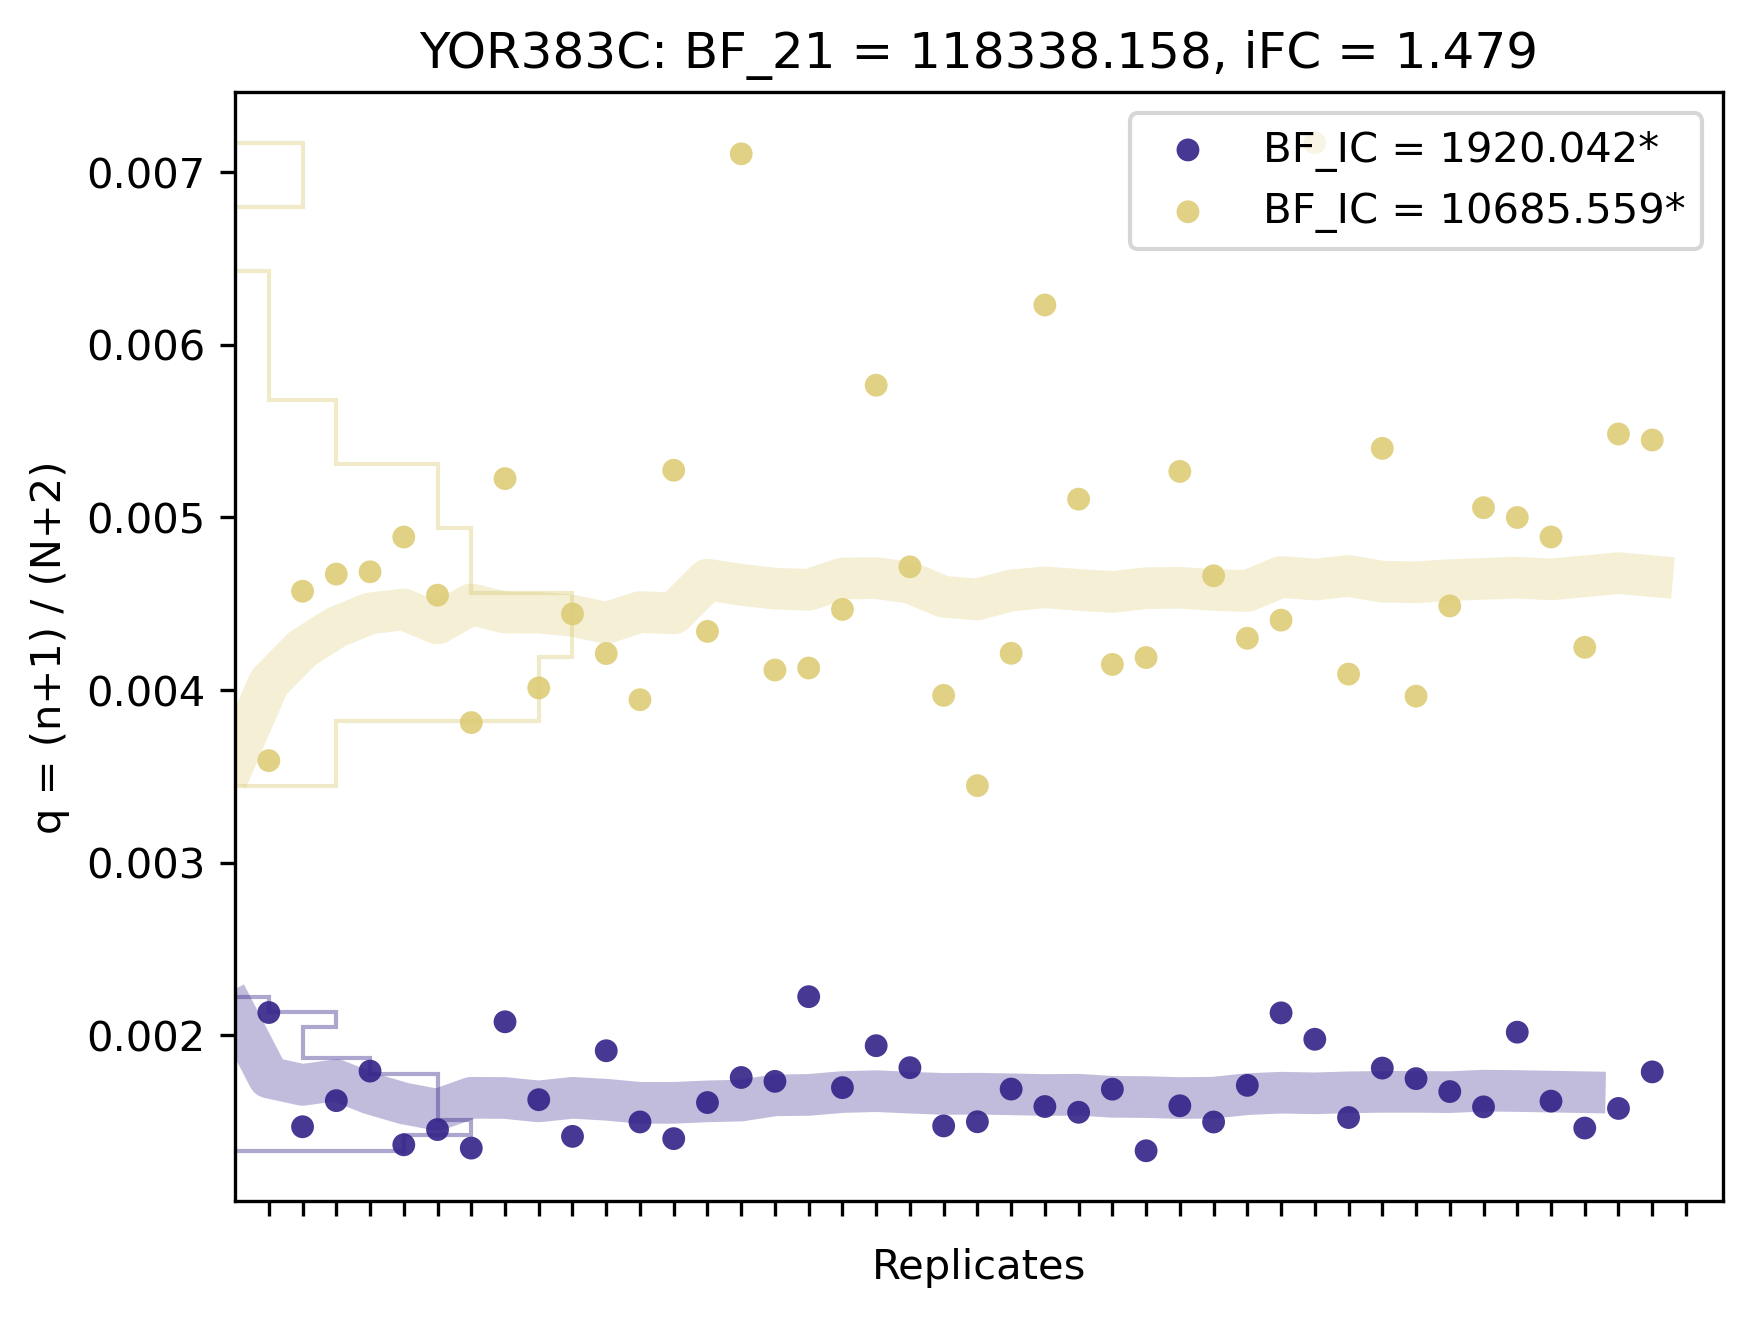

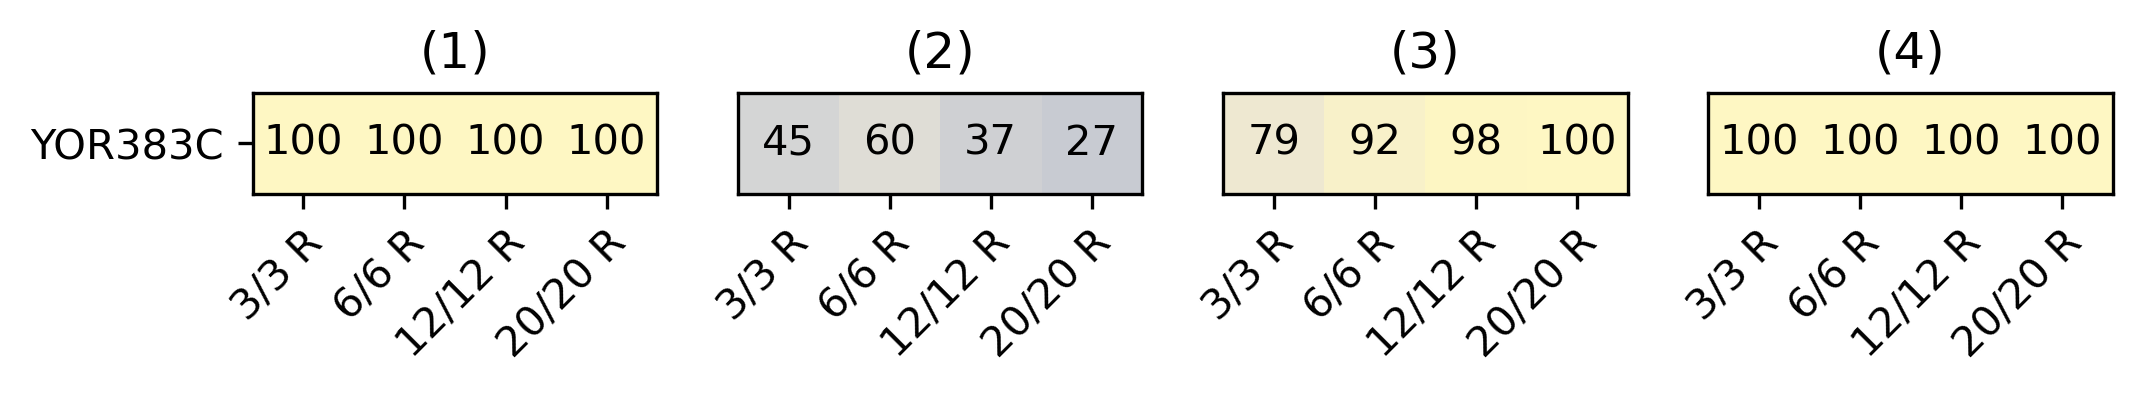

Read counts in WT across replicates:


genes       1       2       3       4       5       6       7       8  \
3012  YHR174W  129581  133346  109168  207147  145674  268592  196925  211933   

           9  ...      33      34      35      36      37      38      39  \
3012  189789  ...  157763  235246  191877  136675  120124  195917  243868   

          40      41      42  
3012  107856  237778  158290  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes       1       2       3       4      5       6       7       8  \
3012  YHR174W  107206  100381  112005  104187  76754  126571  101232  105342   

           9  ...      35     36      37     38      39     40     41     42  \
3012  114602  ...  165739  86105  112391  81618  106975  86521  85779  95411   

         43     44  
3012  83560  75125  

[1 rows x 45 columns]

bayexpress results:


locus_name            BF        FC      BF_IC_WT  AOTP_WT   BF_IC_Snf2  \
3012    YHR174W  205922.03536 -0.847059  13841.417356     True  7918.998188   

      AOTP_Snf2            W  
3012       True  69508.02381

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


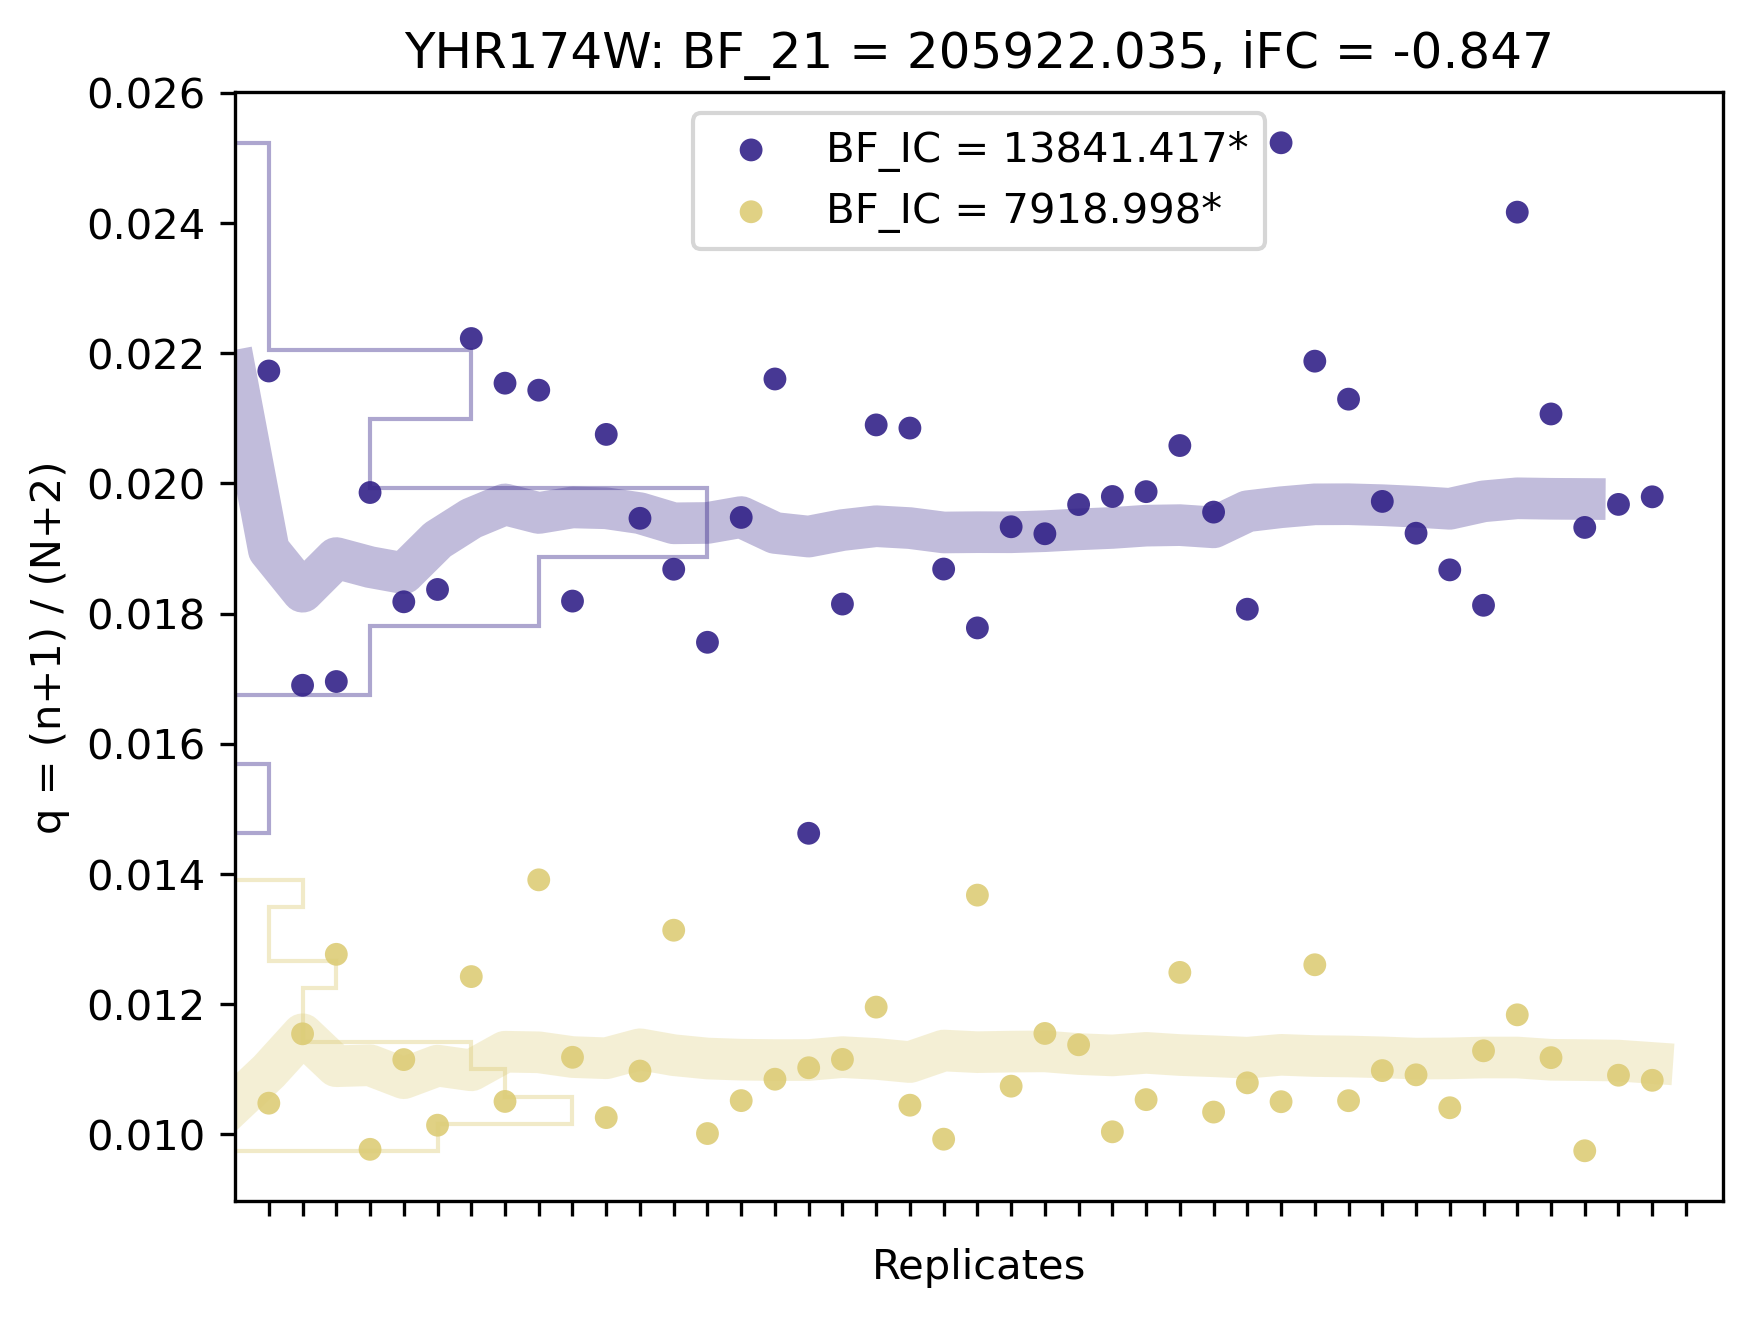

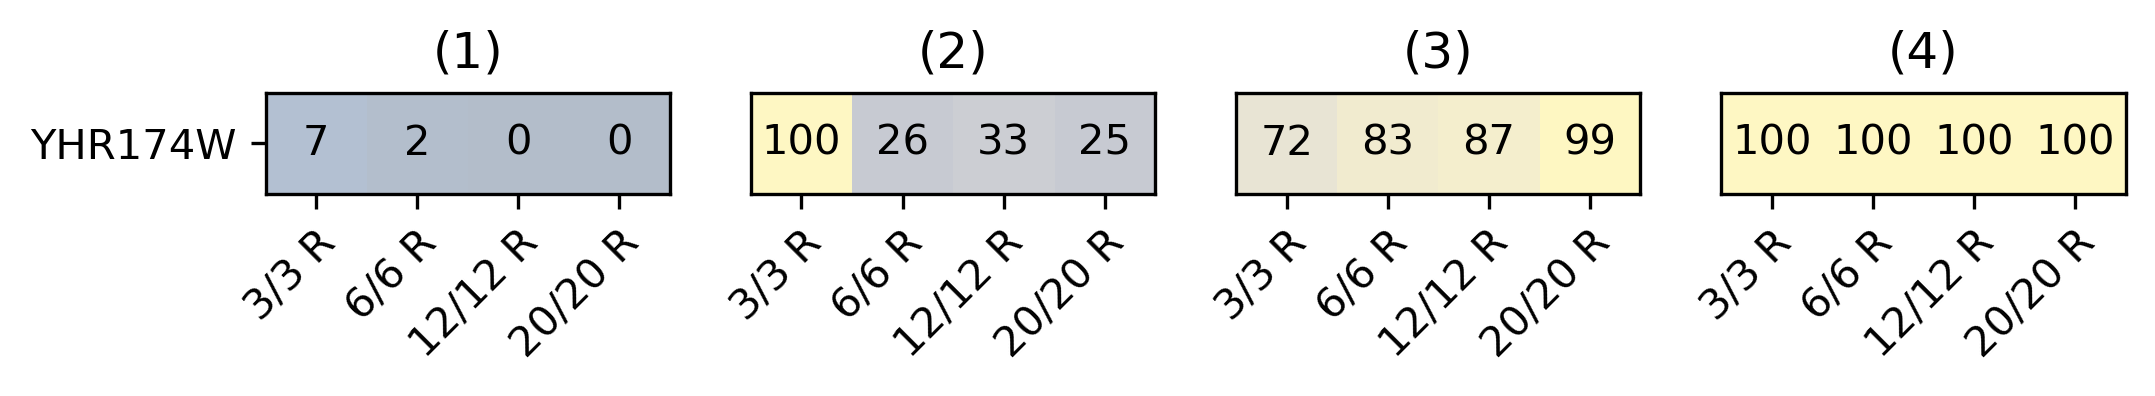

Read counts in WT across replicates:


genes      1      2      3      4      5      6      7      8      9  \
1175  YDR077W  35563  31153  31852  54048  30594  65771  39147  58449  45629   

      ...     33     34     35     36     37     38     39     40     41  \
1175  ...  37196  63004  38304  36697  33838  54827  54371  26658  50782   

         42  
1175  45913  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes     1     2     3     4     5     6     7     8     9  ...  \
1175  YDR077W  5978  5813  4679  5852  4049  9193  4939  4684  2002  ...   

        35    36    37    38    39    40    41    42    43    44  
1175  9285  5125  7021  4165  5594  5013  4016  3755  4674  3275  

[1 rows x 45 columns]

bayexpress results:


locus_name             BF        FC      BF_IC_WT  AOTP_WT   BF_IC_Snf2  \
1175    YDR077W  341558.582413 -3.175344  13017.391966     True  1422.483953   

      AOTP_Snf2            W  
1175       True  38000.52381

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


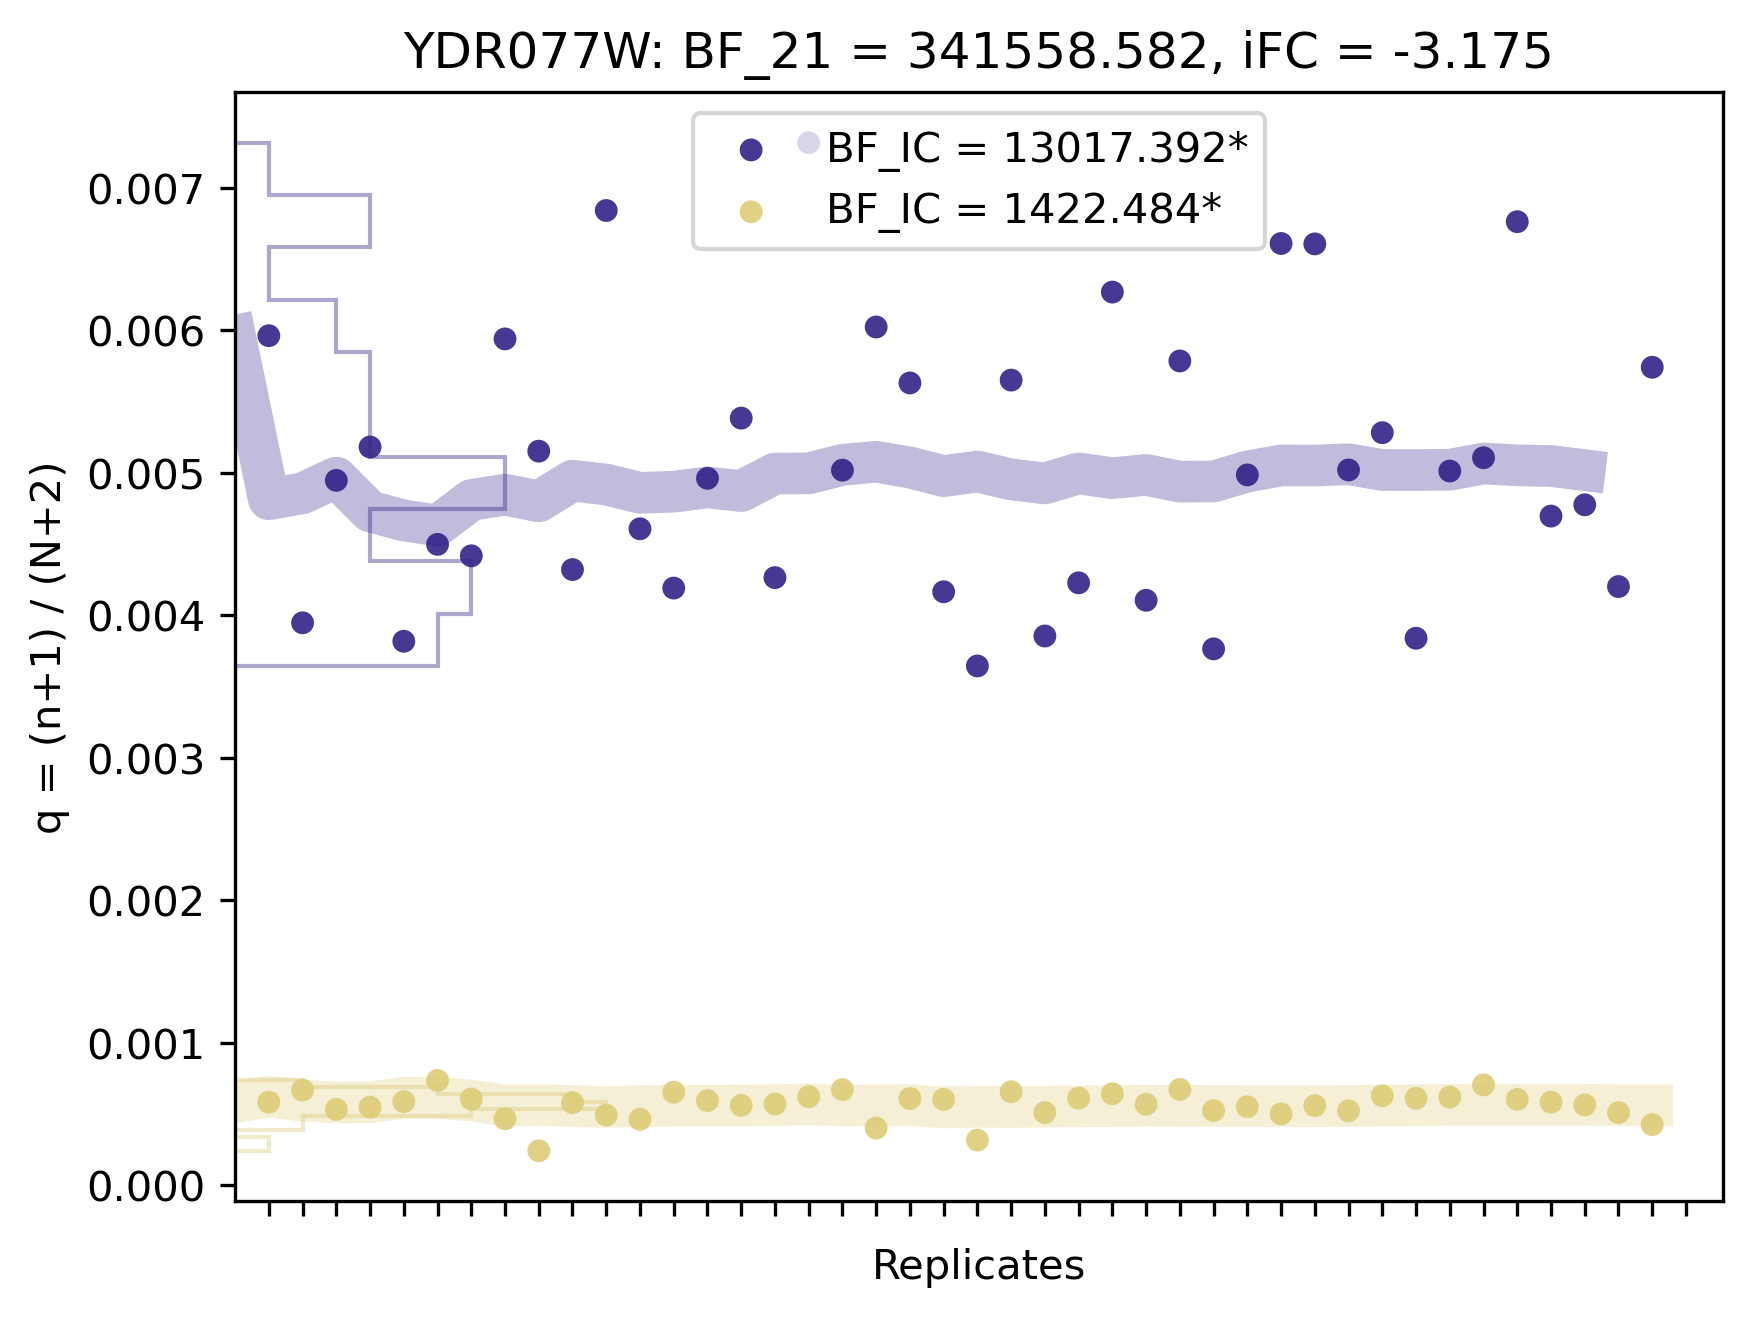

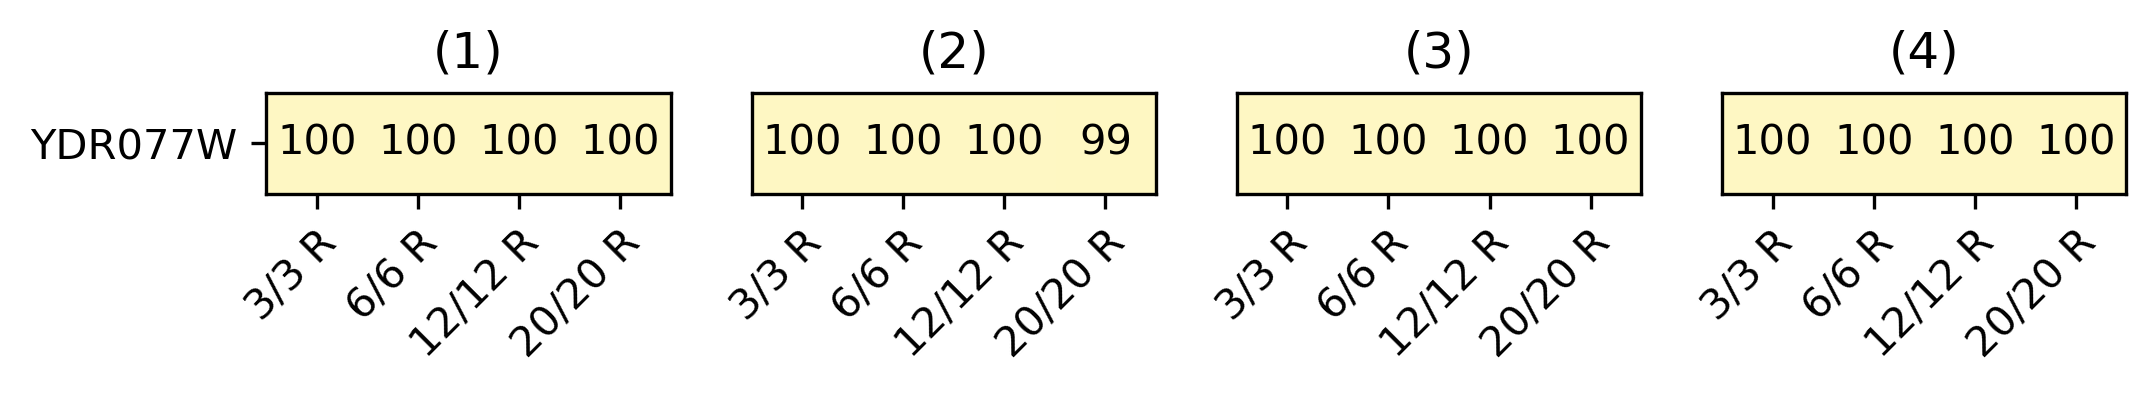

[None, None, None, None]

In [11]:
[stalk([gene]) for gene in ['YGR192C', 'YOR383C', 'YHR174W', 'YDR077W']]

Read counts in WT across replicates:


genes    1    2    3    4    5     6    7    8    9  ...   33   34  \
5422  YNL232W  388  697  459  658  779  1276  674  718  769  ...  528  775   

       35   36   37   38    39   40    41   42  
5422  833  529  395  536  1068  385  1080  515  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...    35   36  \
5422  YNL232W  841  622  644  855  573  983  688  772  635  ...  1335  666   

       37   38   39   40   41   42   43   44  
5422  913  595  804  679  714  710  768  646  

[1 rows x 45 columns]

bayexpress results:


locus_name      BF        FC   BF_IC_WT  AOTP_WT  BF_IC_Snf2  AOTP_Snf2  \
5422    YNL232W  7.1749  0.090803 -48.996454    False -181.486812      False   

             W  
5422  79.52381

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


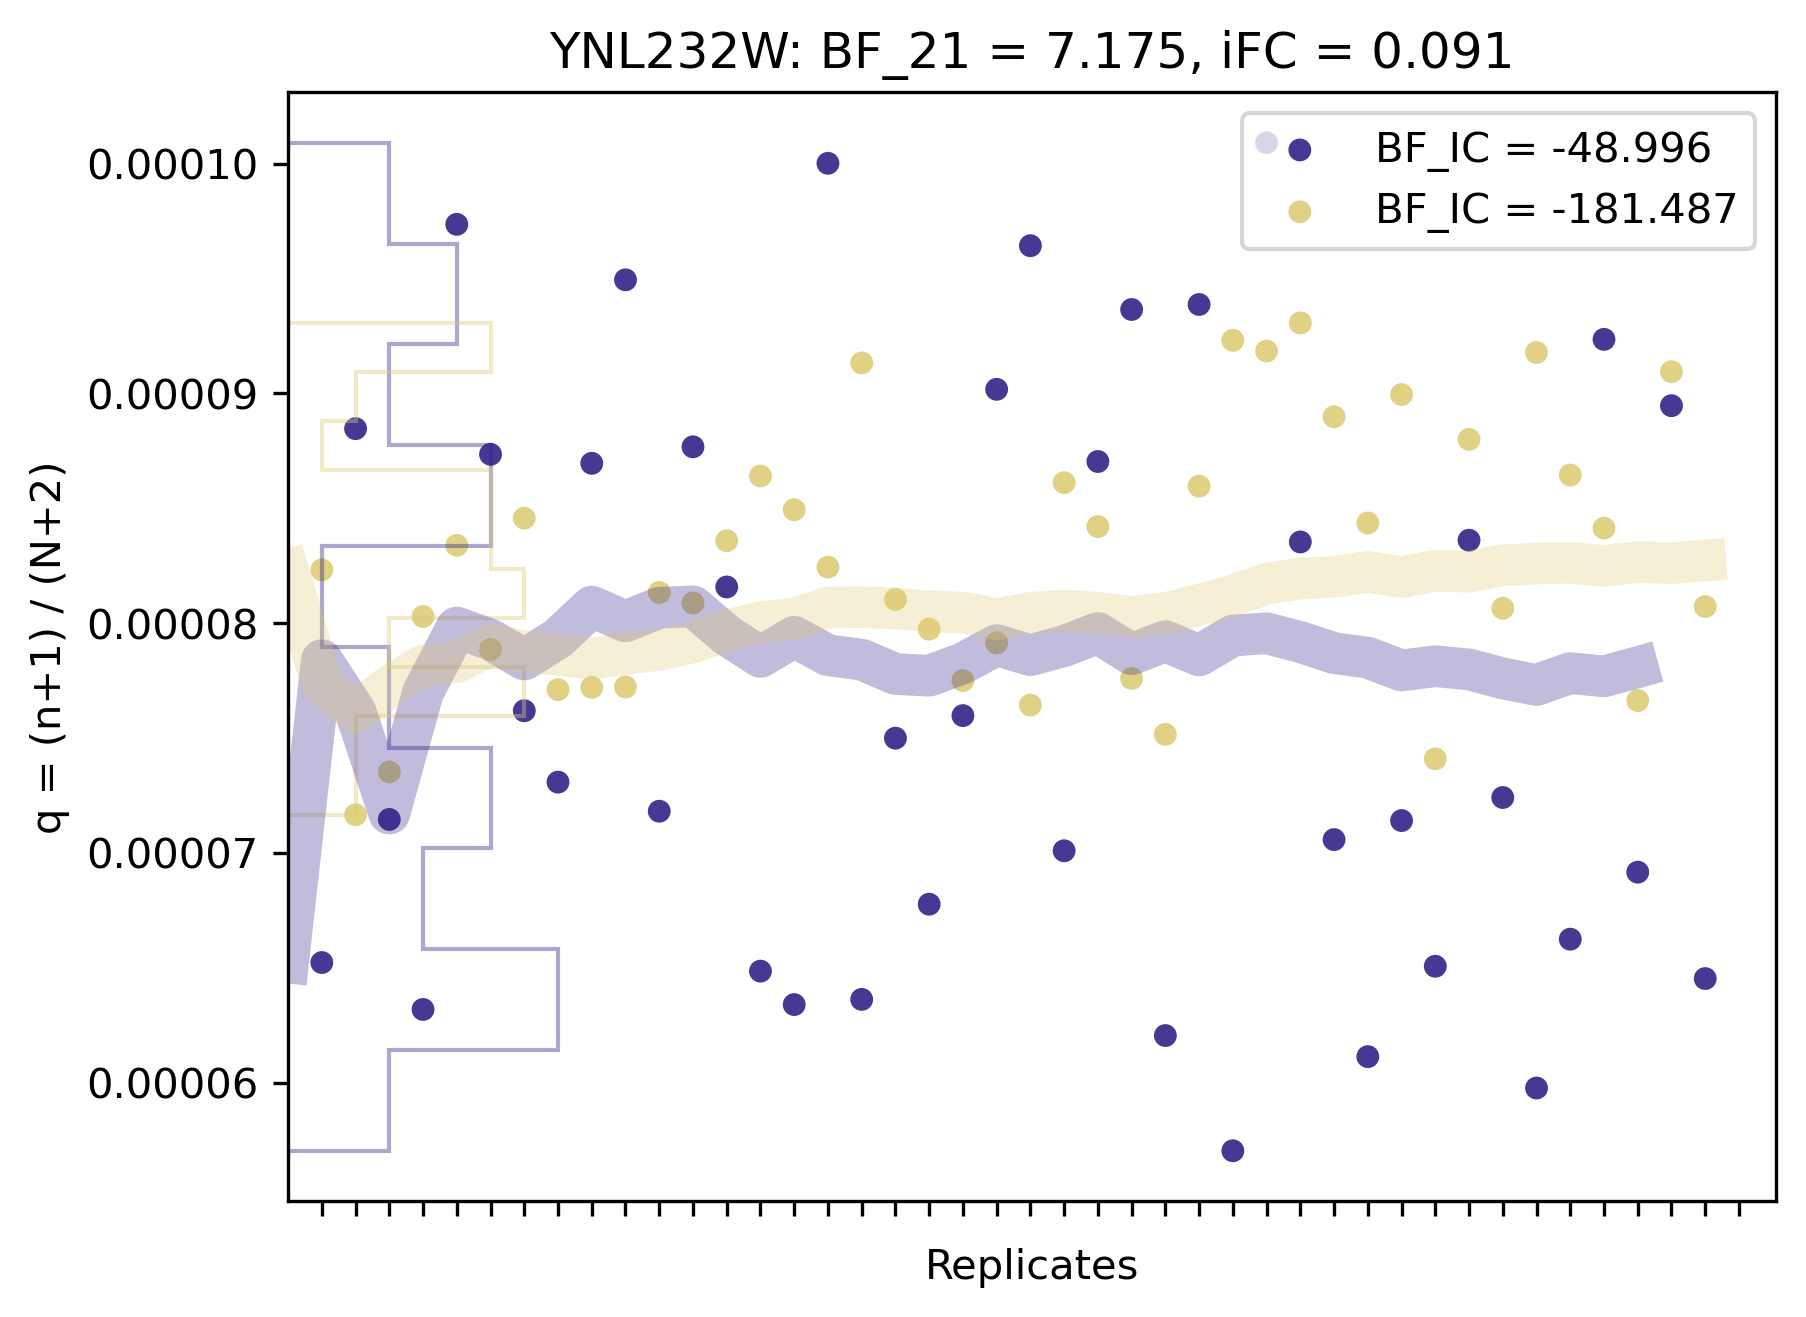

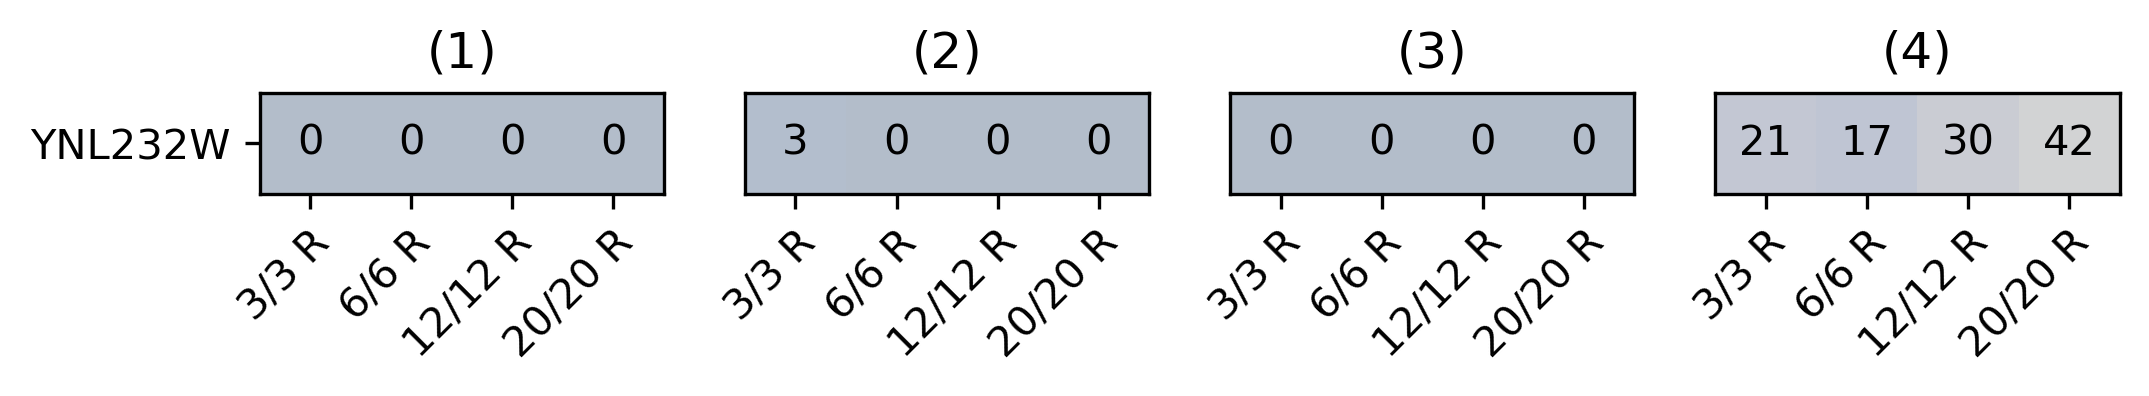

Read counts in WT across replicates:


genes   1   2   3   4   5    6   7   8   9  ...  33  34  35  36  37  \
4511  YLR329W  30  49  62  88  64  104  48  34  53  ...  29  85  56  43  52   

      38  39  40  41  42  
4511  27  71  44  86  51  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1   2   3    4   5    6   7   8   9  ...   35  36  37  38  \
4511  YLR329W  112  65  71  104  52  114  62  73  50  ...  111  65  73  47   

      39   40  41  42   43  44  
4511  70  120  59  56  105  57  

[1 rows x 45 columns]

bayexpress results:


locus_name       BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
4511    YLR329W  7.20385  0.306775 -196.805858    False -205.931345   

      AOTP_Snf2          W  
4511      False  16.119048

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


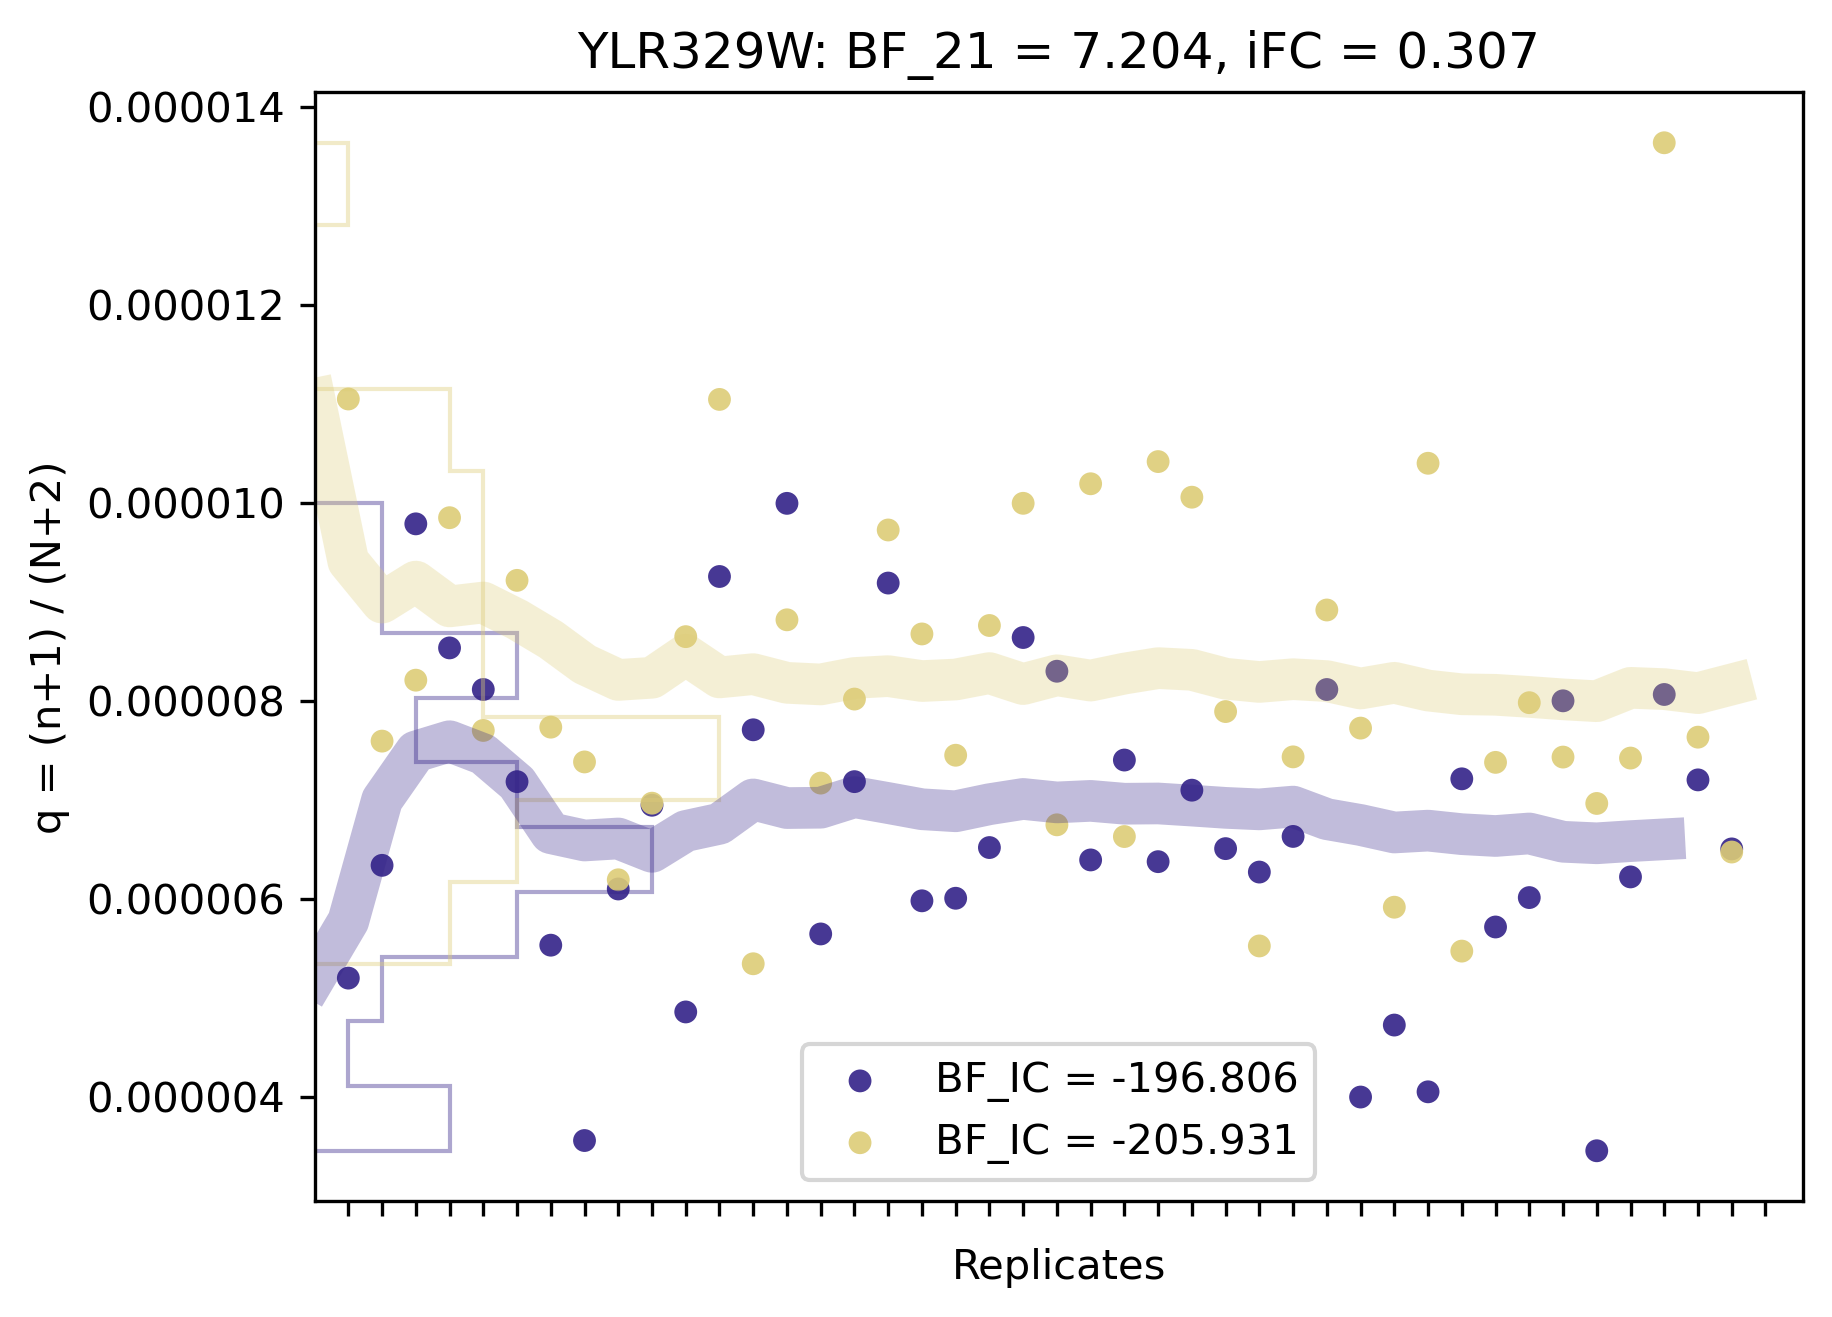

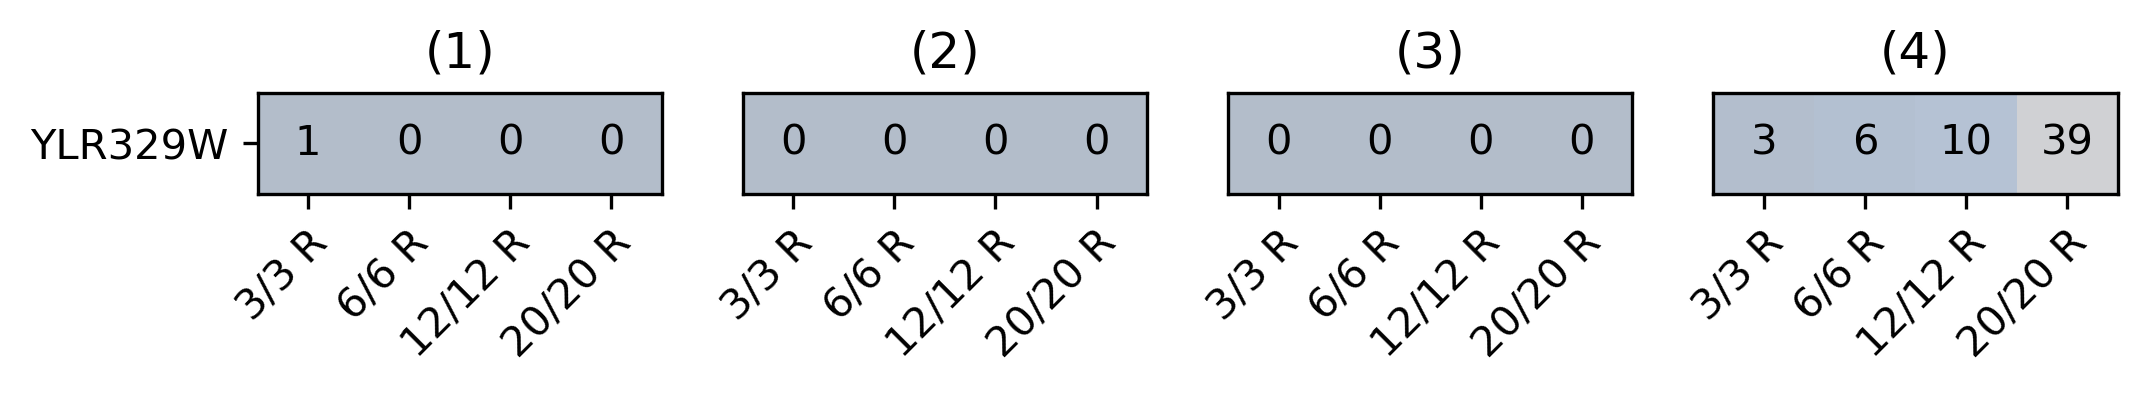

Read counts in WT across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   33   34  \
1409  YDR291W  268  443  315  477  451  956  473  409  458  ...  337  586   

       35   36   37   38   39   40   41   42  
1409  516  380  261  323  603  288  659  359  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   35   36  \
1409  YDR291W  630  488  538  663  399  753  410  564  461  ...  816  434   

       37   38   39   40   41   42   43   44  
1409  496  391  453  477  425  570  524  405  

[1 rows x 45 columns]

bayexpress results:


locus_name        BF        FC   BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
1409    YDR291W  7.219764  0.111894 -95.144699    False -163.157529   

      AOTP_Snf2     W  
1409      False  60.5

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


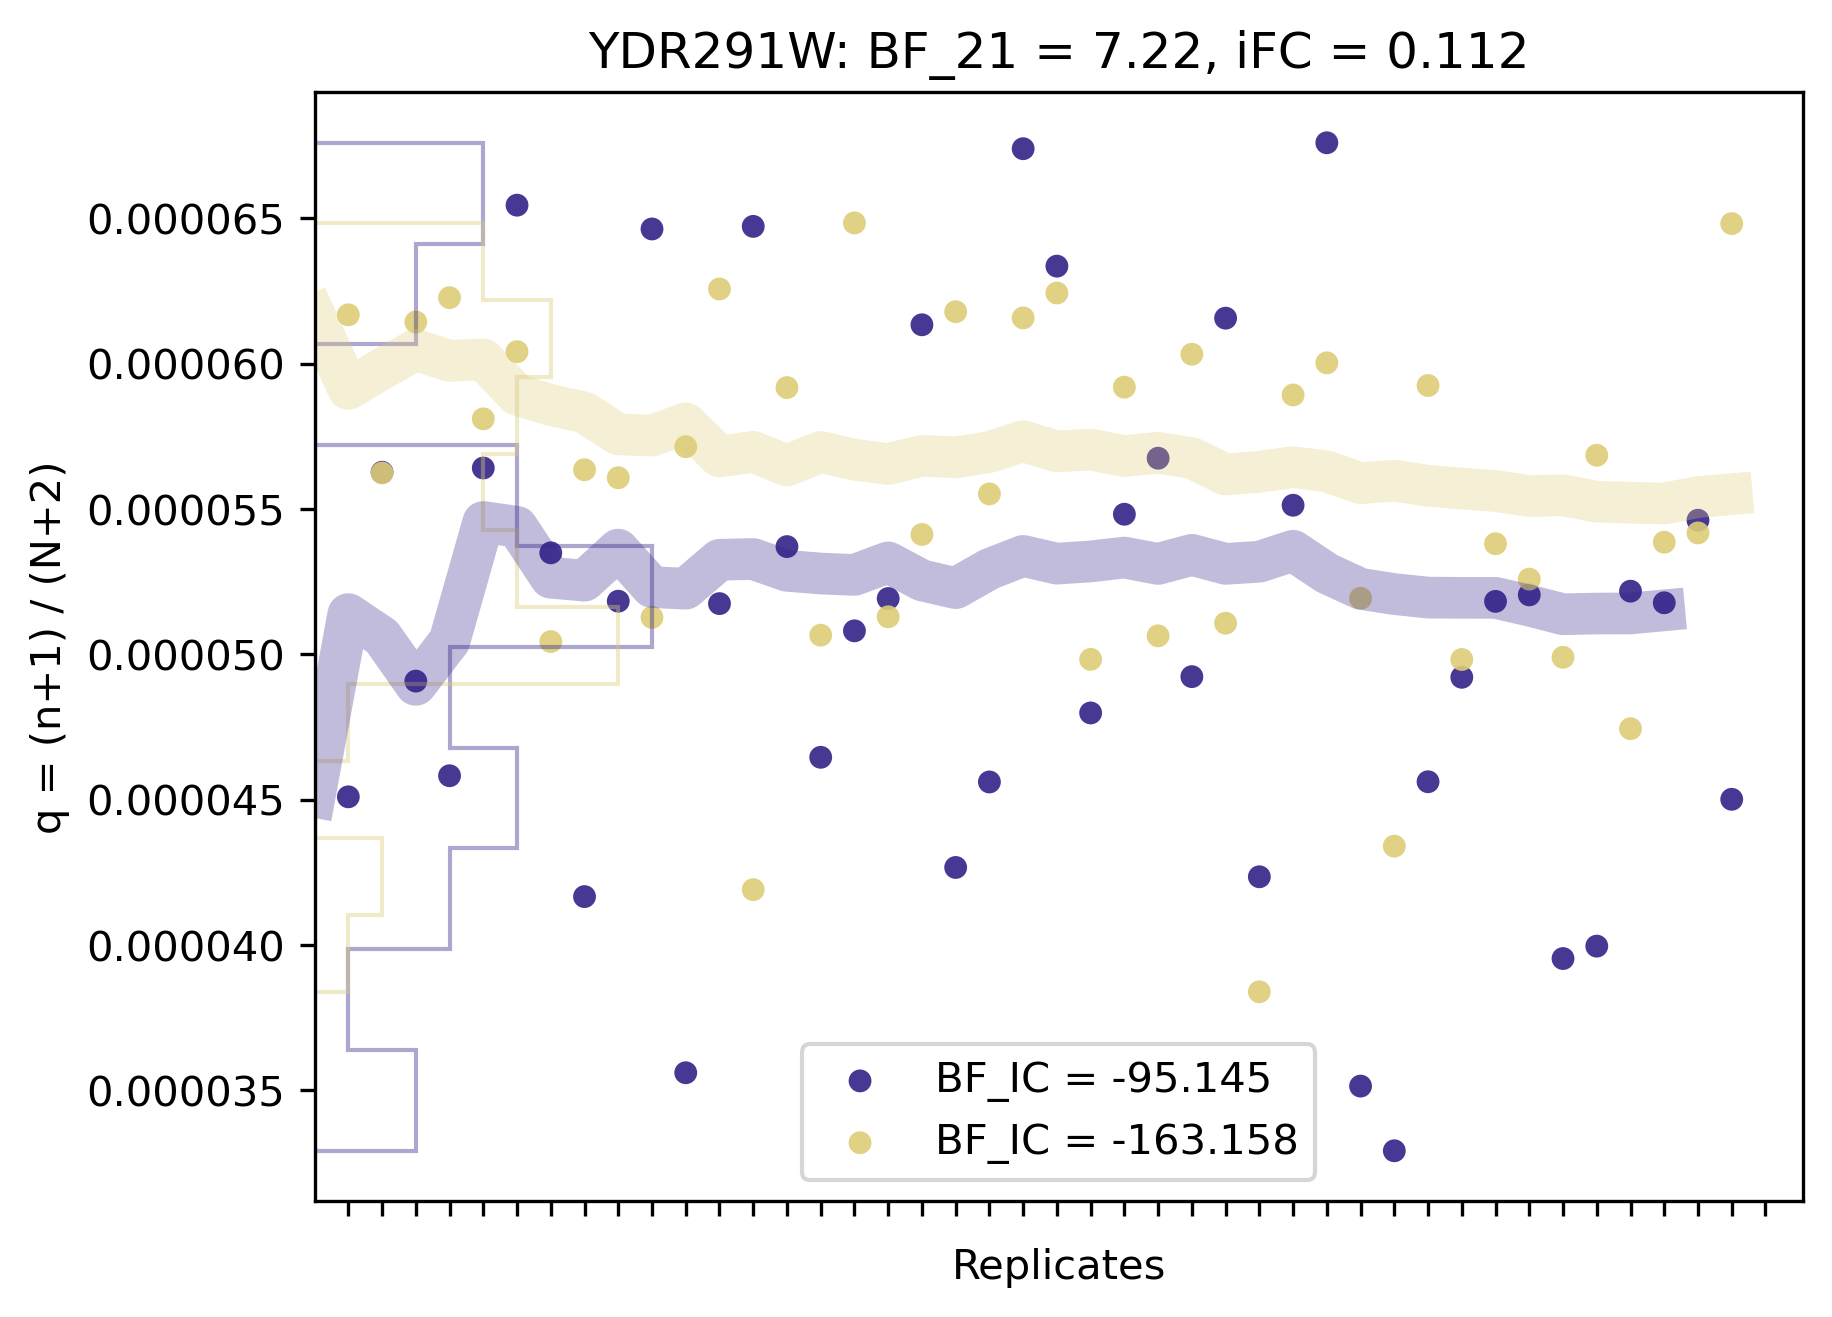

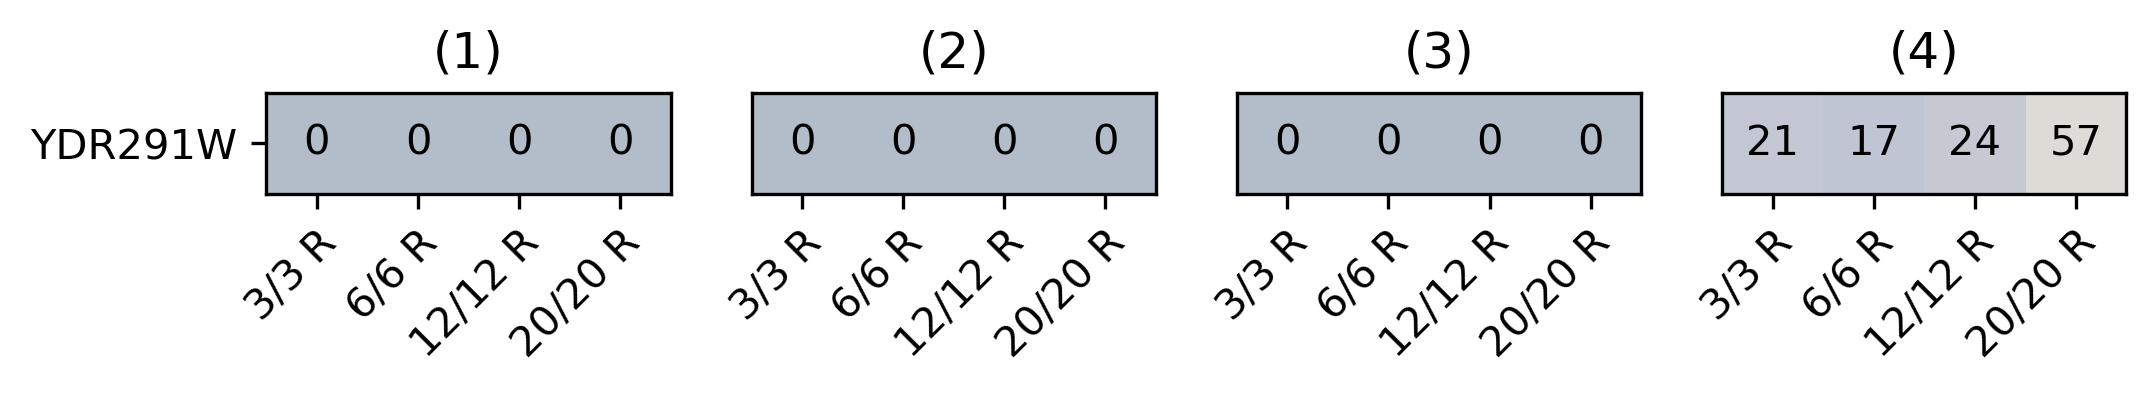

Read counts in WT across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   33   34  \
6701  YPR164W  247  418  292  425  408  879  456  432  388  ...  340  552   

       35   36   37   38   39   40   41   42  
6701  482  383  270  328  621  267  613  363  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   35   36  \
6701  YPR164W  512  478  462  545  356  682  411  539  417  ...  805  403   

       37   38   39   40   41   42   43   44  
6701  470  379  478  459  388  485  420  389  

[1 rows x 45 columns]

bayexpress results:


locus_name        BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
6701    YPR164W  7.242236  0.115596 -129.747251    False -198.587507   

      AOTP_Snf2          W  
6701      False  59.071429

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


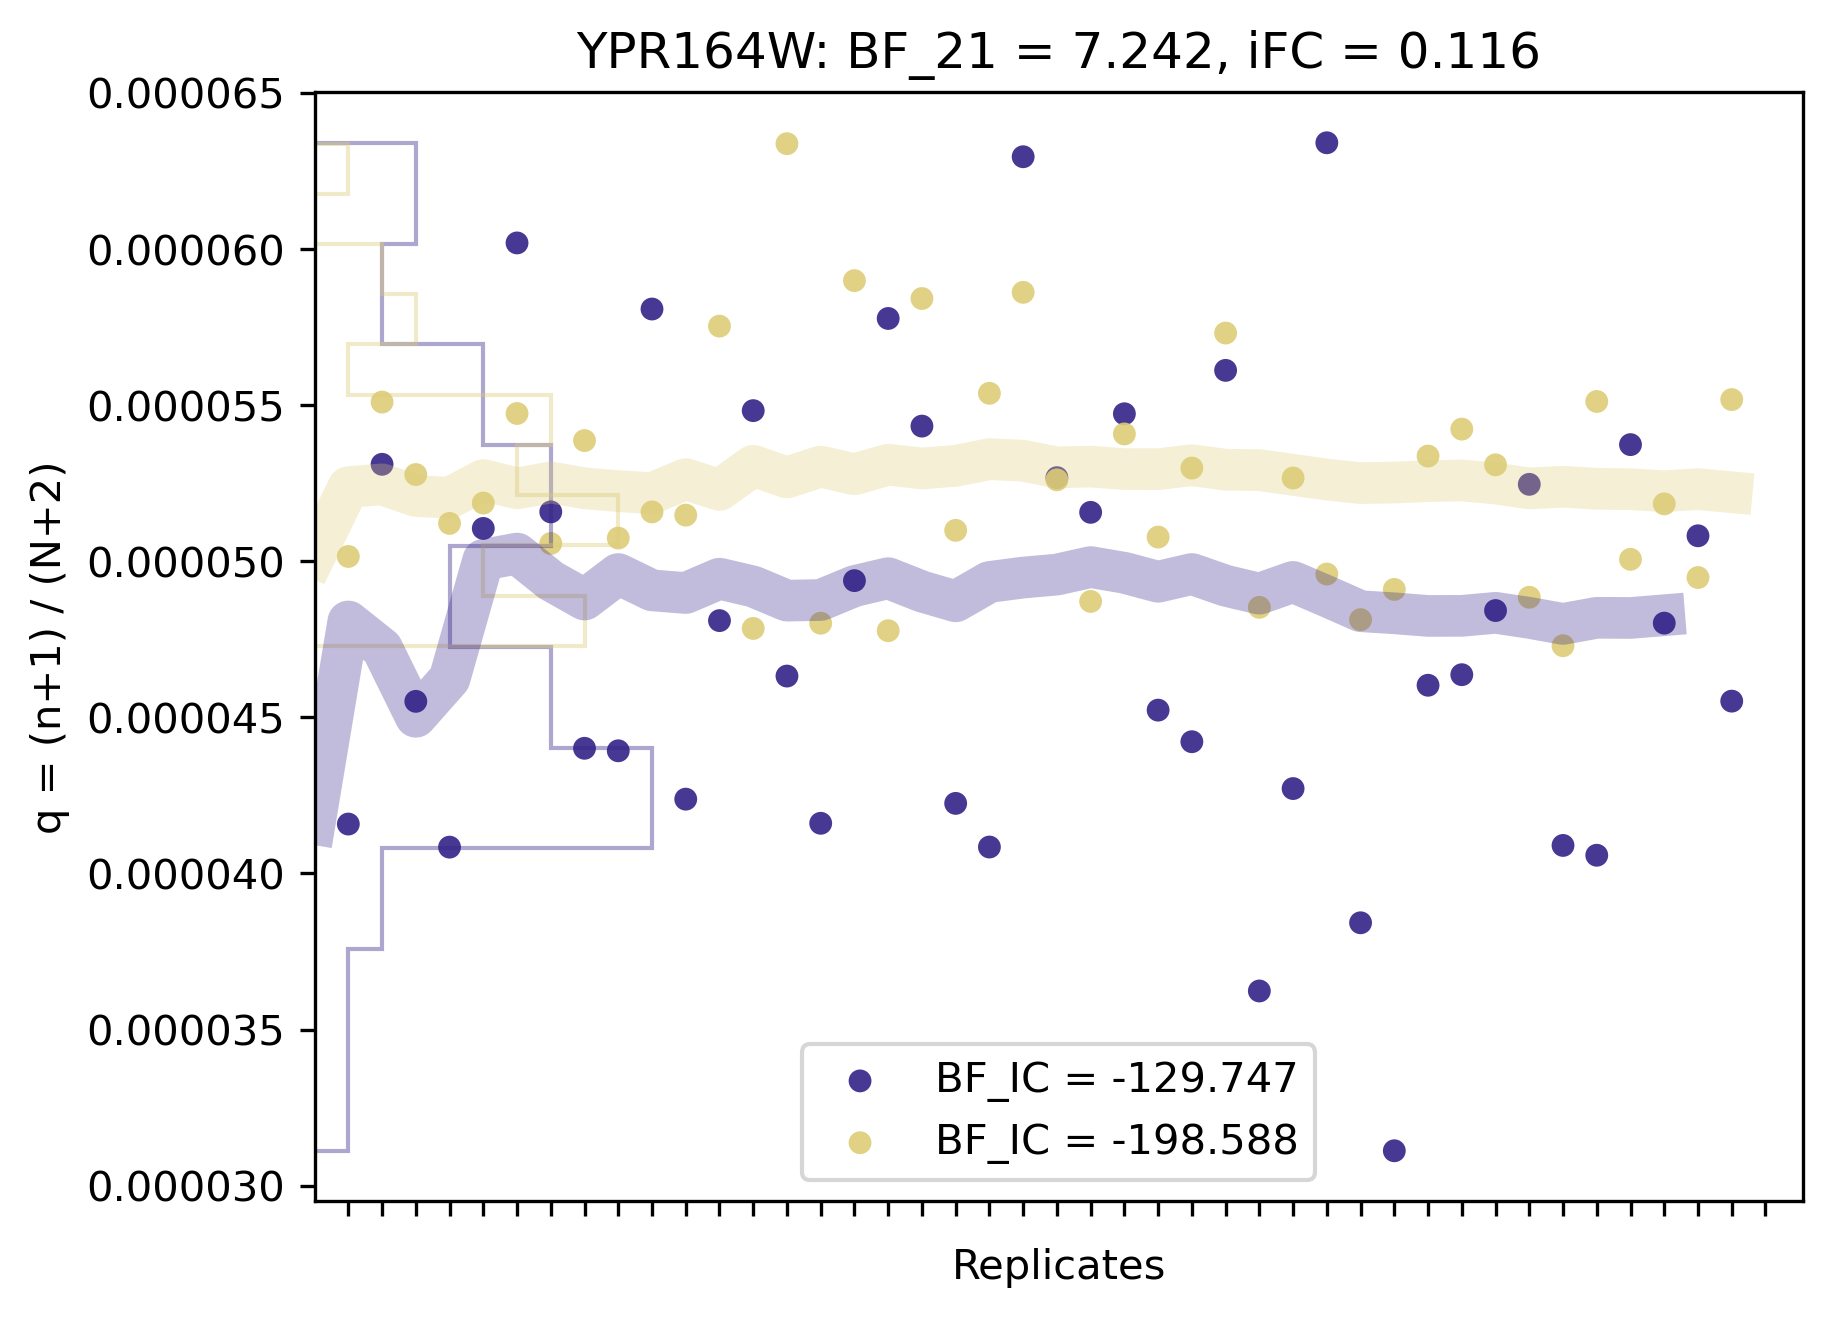

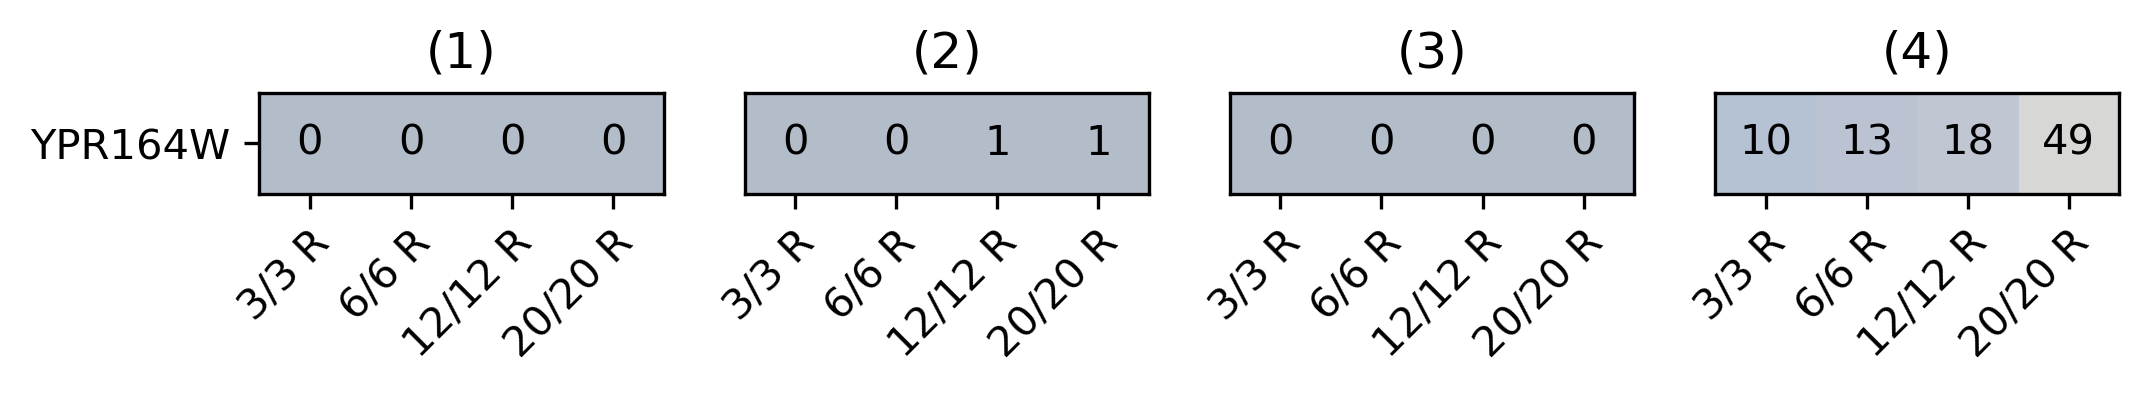

[None, None, None, None]

In [12]:
[stalk([gene]) for gene in ['YNL232W', 'YLR329W', 'YDR291W', 'YPR164W']]

Read counts in WT across replicates:


genes   1   2   3   4   5   6   7   8   9  ...  33  34  35  36  37  38  \
6763  snR32  22  65  37  32  60  81  32  21  59  ...  23  50  64  38  18  14   

      39  40  41  42  
6763  38  36  65  27  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes   1   2   3   4   5   6   7   8   9  ...  35  36  37  38  39  40  \
6763  snR32  37  35  29  60  49  35  24  39  42  ...  70  33  35  21  63  50   

      41  42  43  44  
6763  32  38  43  40  

[1 rows x 45 columns]

bayexpress results:


locus_name        BF       FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
6763      snR32 -5.400319 -0.10677 -173.267945    False -199.190675   

      AOTP_Snf2         W  
6763      False  3.928571

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


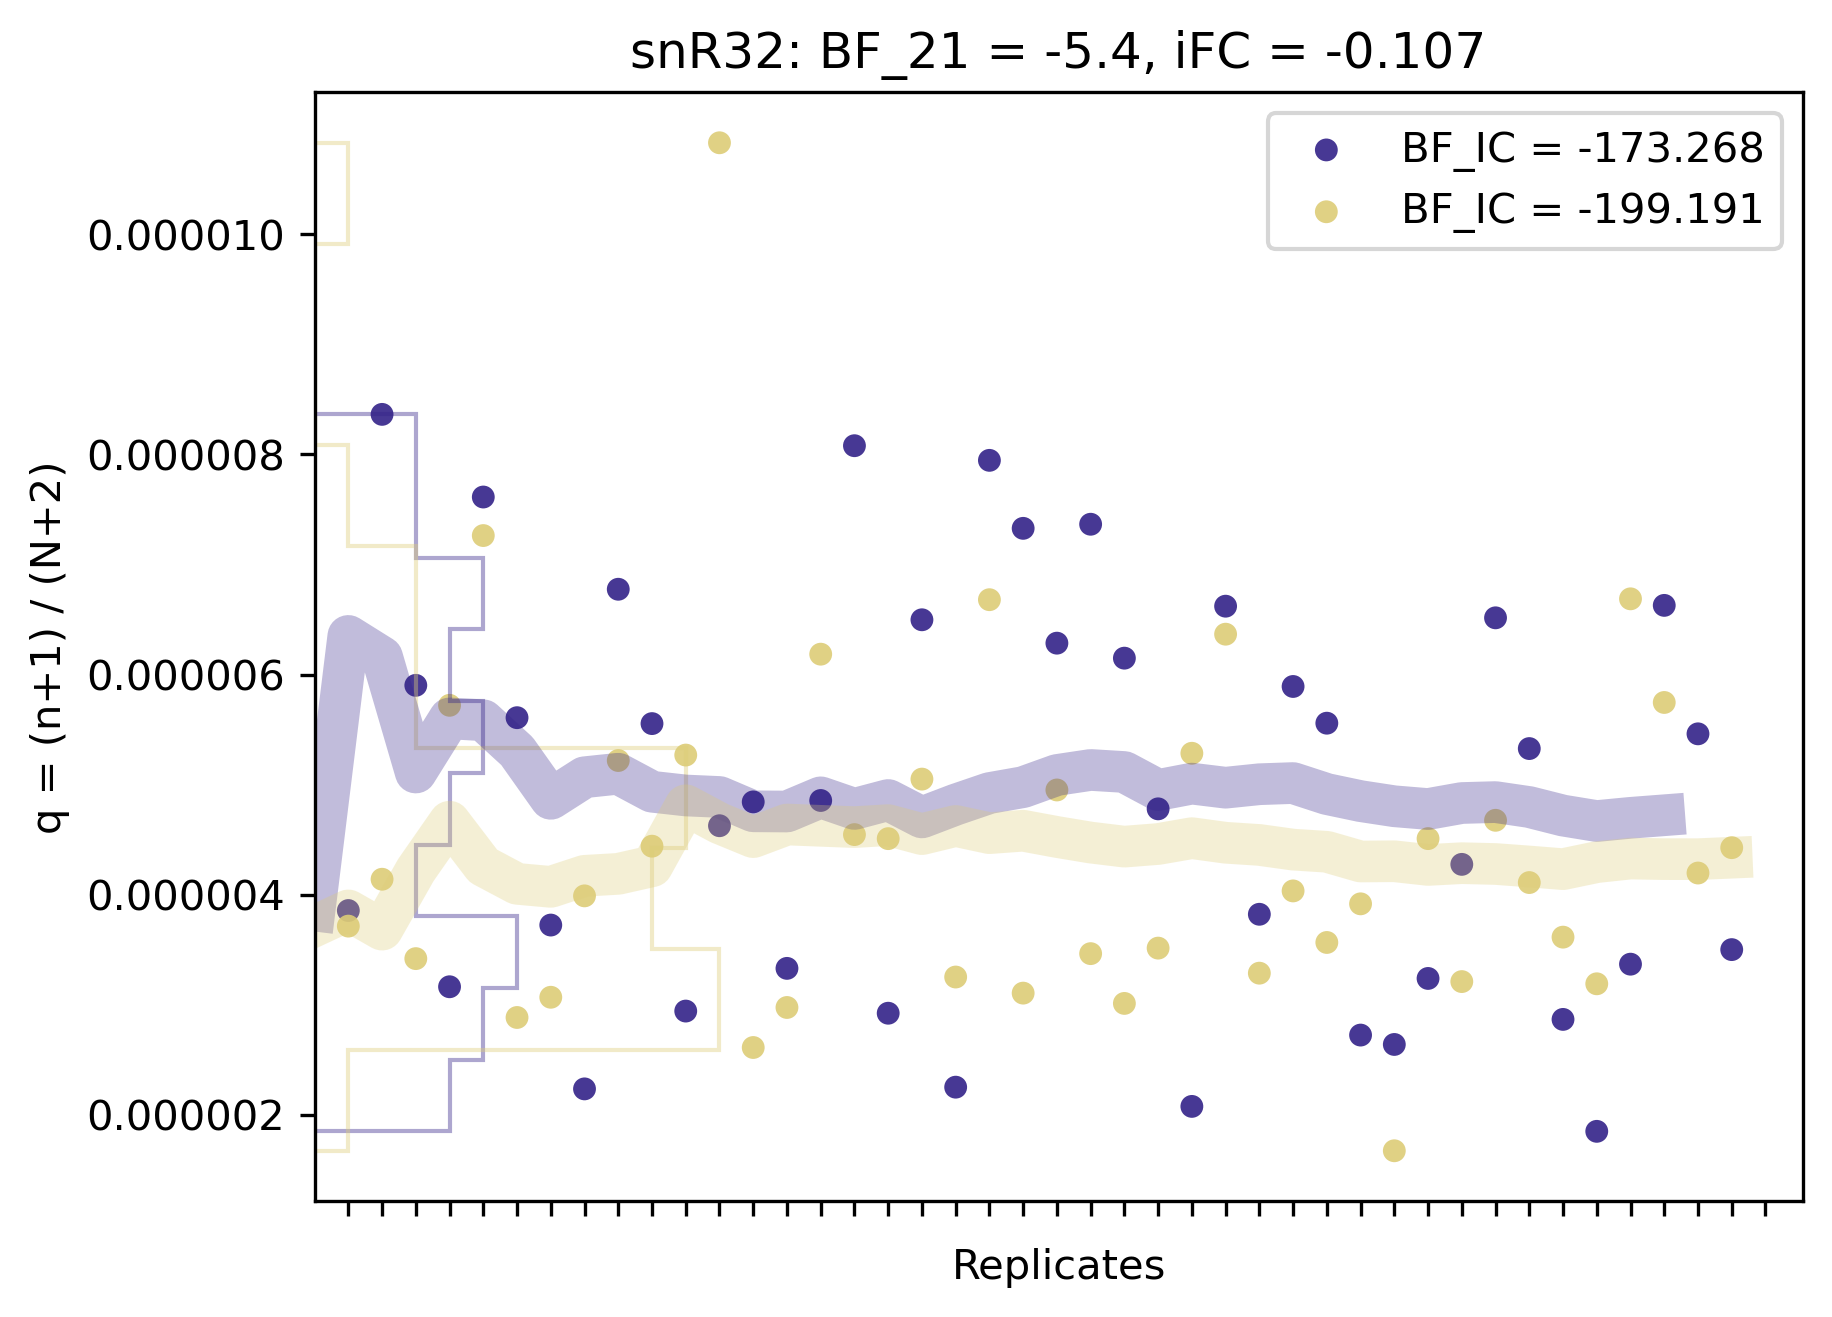

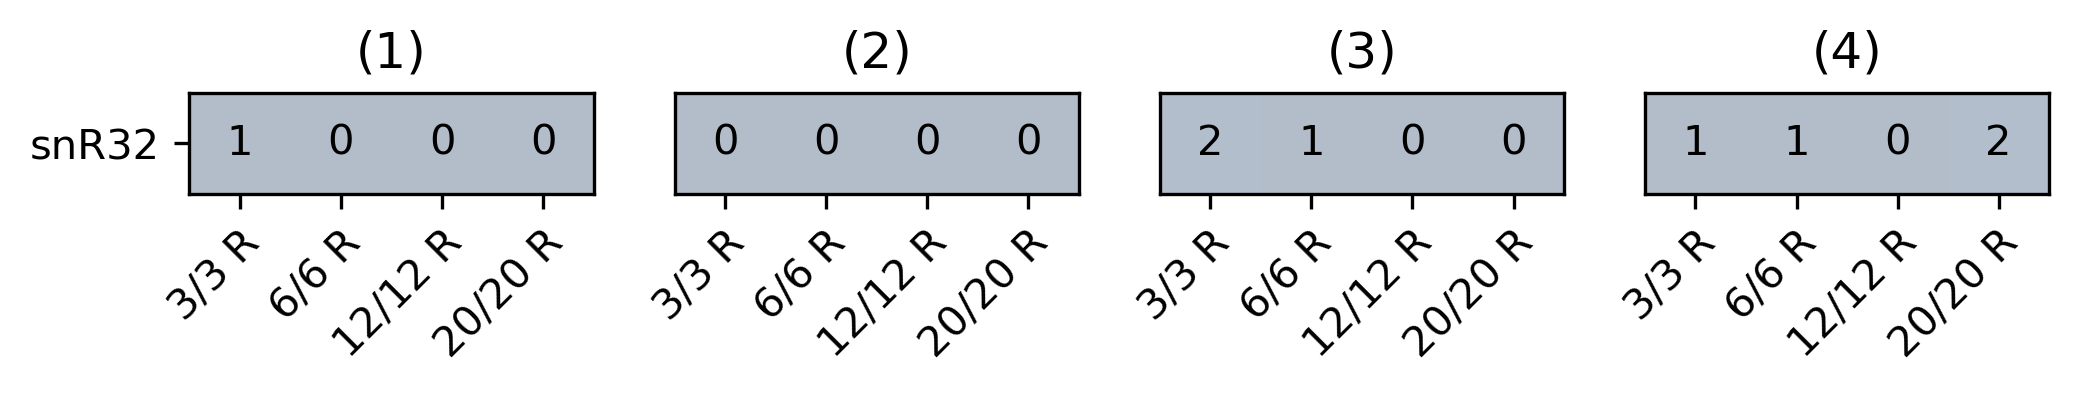

Read counts in WT across replicates:


genes    1     2    3     4     5     6     7     8     9  ...    33  \
6255  YPL032C  775  1330  978  1470  1316  2684  1284  1254  1236  ...  1030   

        34    35    36   37   38    39   40    41    42  
6255  1656  1729  1157  903  872  1773  747  1894  1122  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes     1     2     3     4    5     6     7     8    9  ...    35  \
6255  YPL032C  1643  1301  1153  1612  987  2242  1161  1532  860  ...  2383   

        36    37   38    39    40    41    42    43    44  
6255  1350  1488  978  1419  1514  1069  1348  1511  1103  

[1 rows x 45 columns]

bayexpress results:


locus_name       BF        FC   BF_IC_WT  AOTP_WT  BF_IC_Snf2  AOTP_Snf2  \
6255    YPL032C -5.39359  0.009353  15.238002     True  -61.994904      False   

               W  
6255  104.190476

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


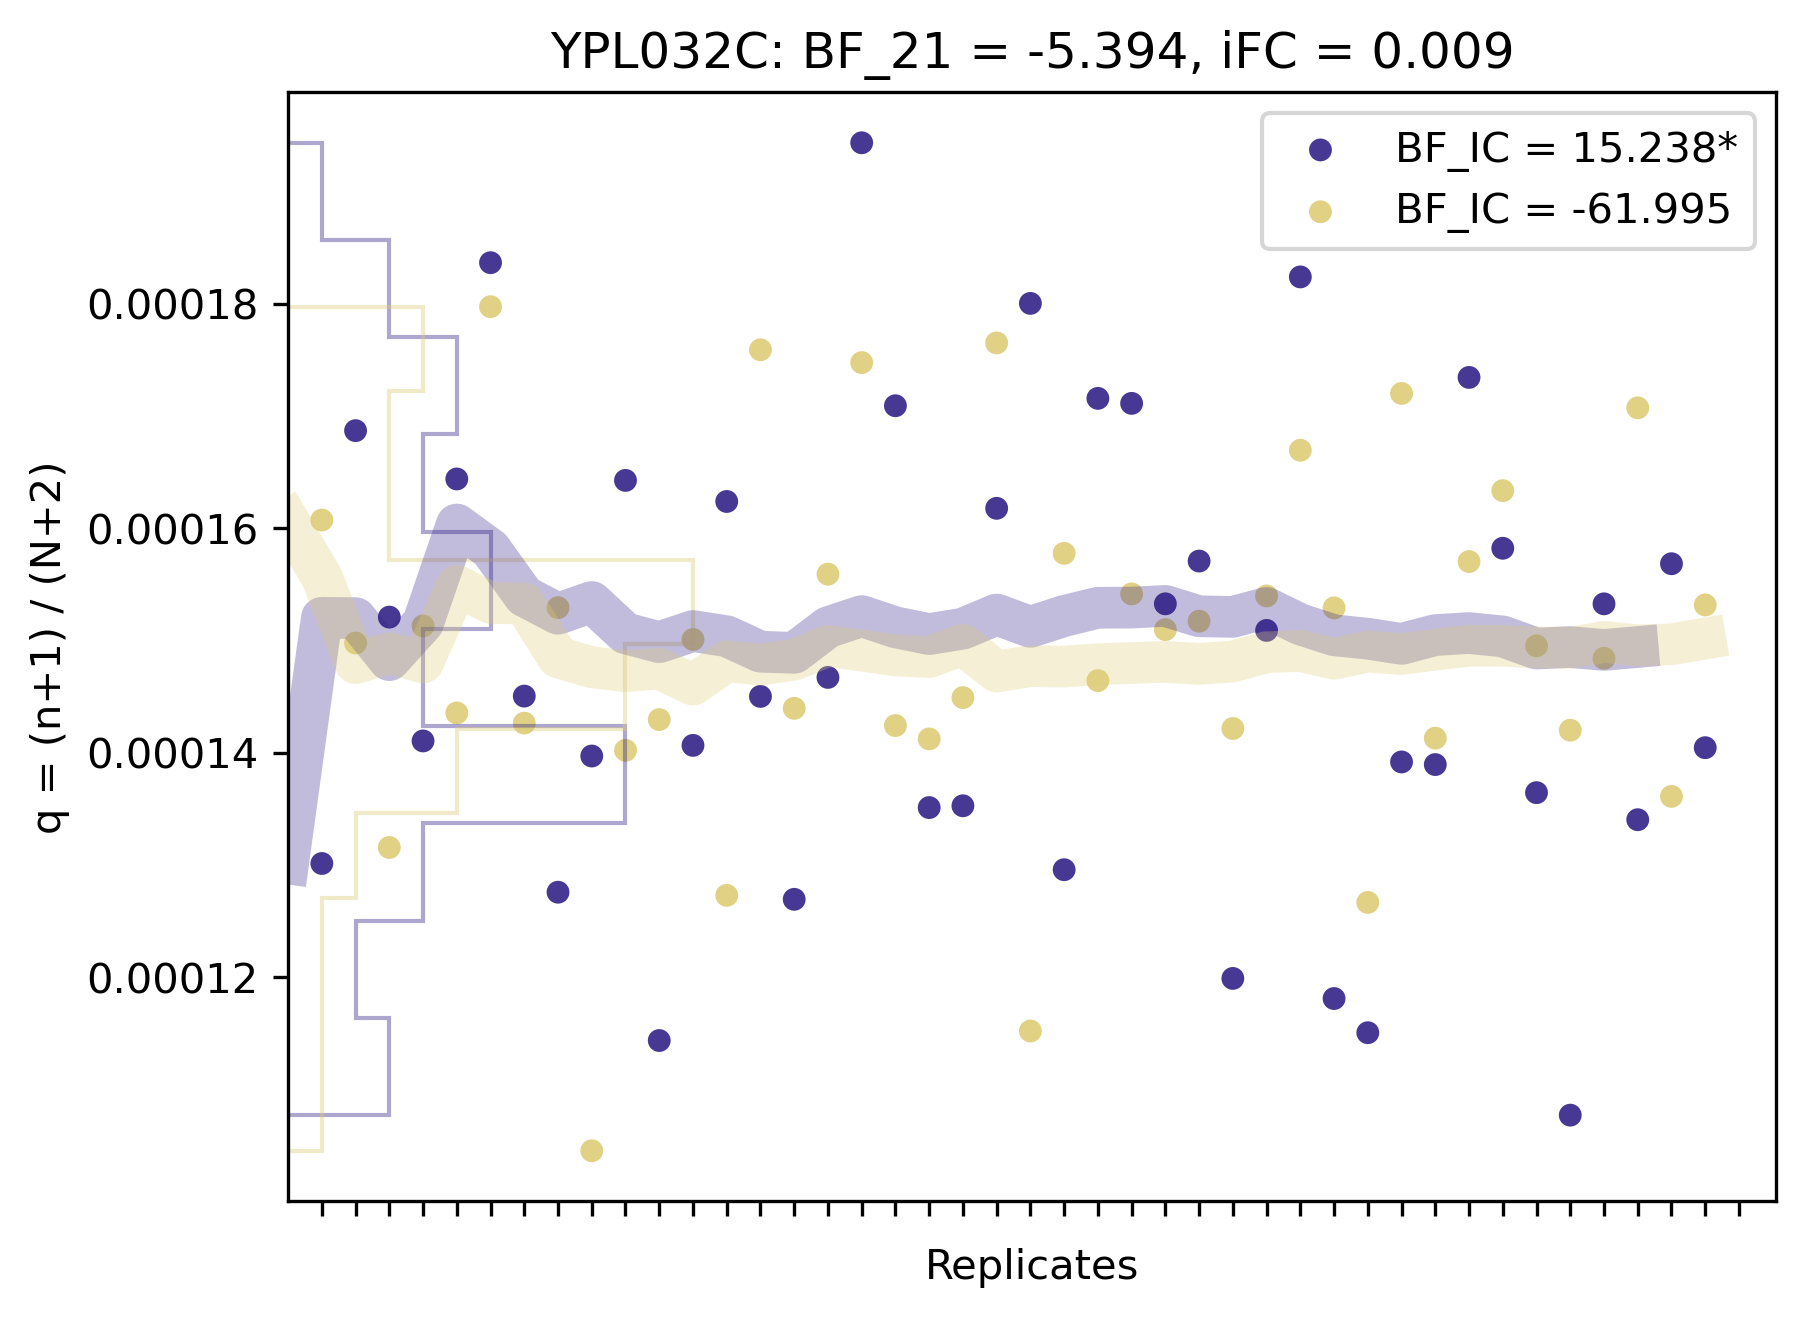

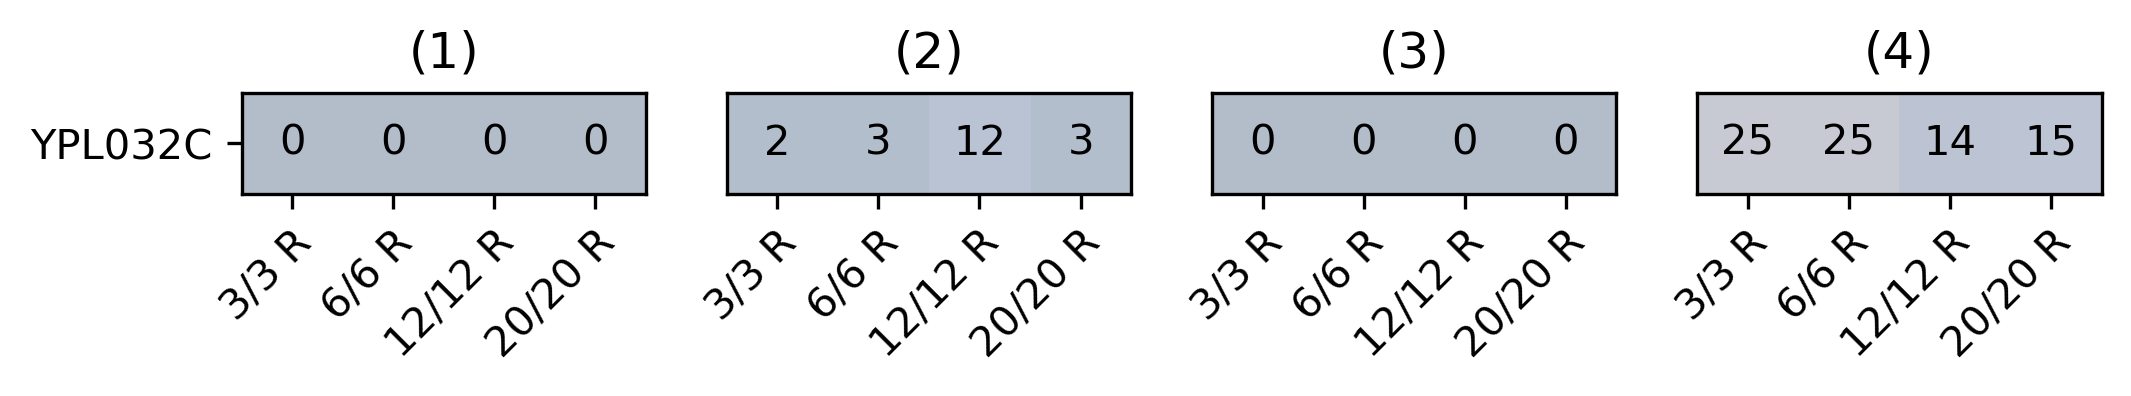

Read counts in WT across replicates:


genes   1   2   3   4   5   6   7   8   9  ...  33  34  35  36  37  \
5212  YNL034W  14  42  33  30  31  78  39  37  35  ...  18  51  35  25  29   

      38  39  40  41  42  
5212  29  43  22  43  34  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes   1   2   3   4   5   6   7   8   9  ...  35  36  37  38  39  \
5212  YNL034W  25  34  26  50  25  47  31  29  26  ...  50  34  40  21  35   

      40  41  42  43  44  
5212  33  16  27  34  24  

[1 rows x 45 columns]

bayexpress results:


locus_name        BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
5212    YNL034W -5.392332 -0.122325 -220.383309    False -234.900049   

      AOTP_Snf2         W  
5212      False  2.428571

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


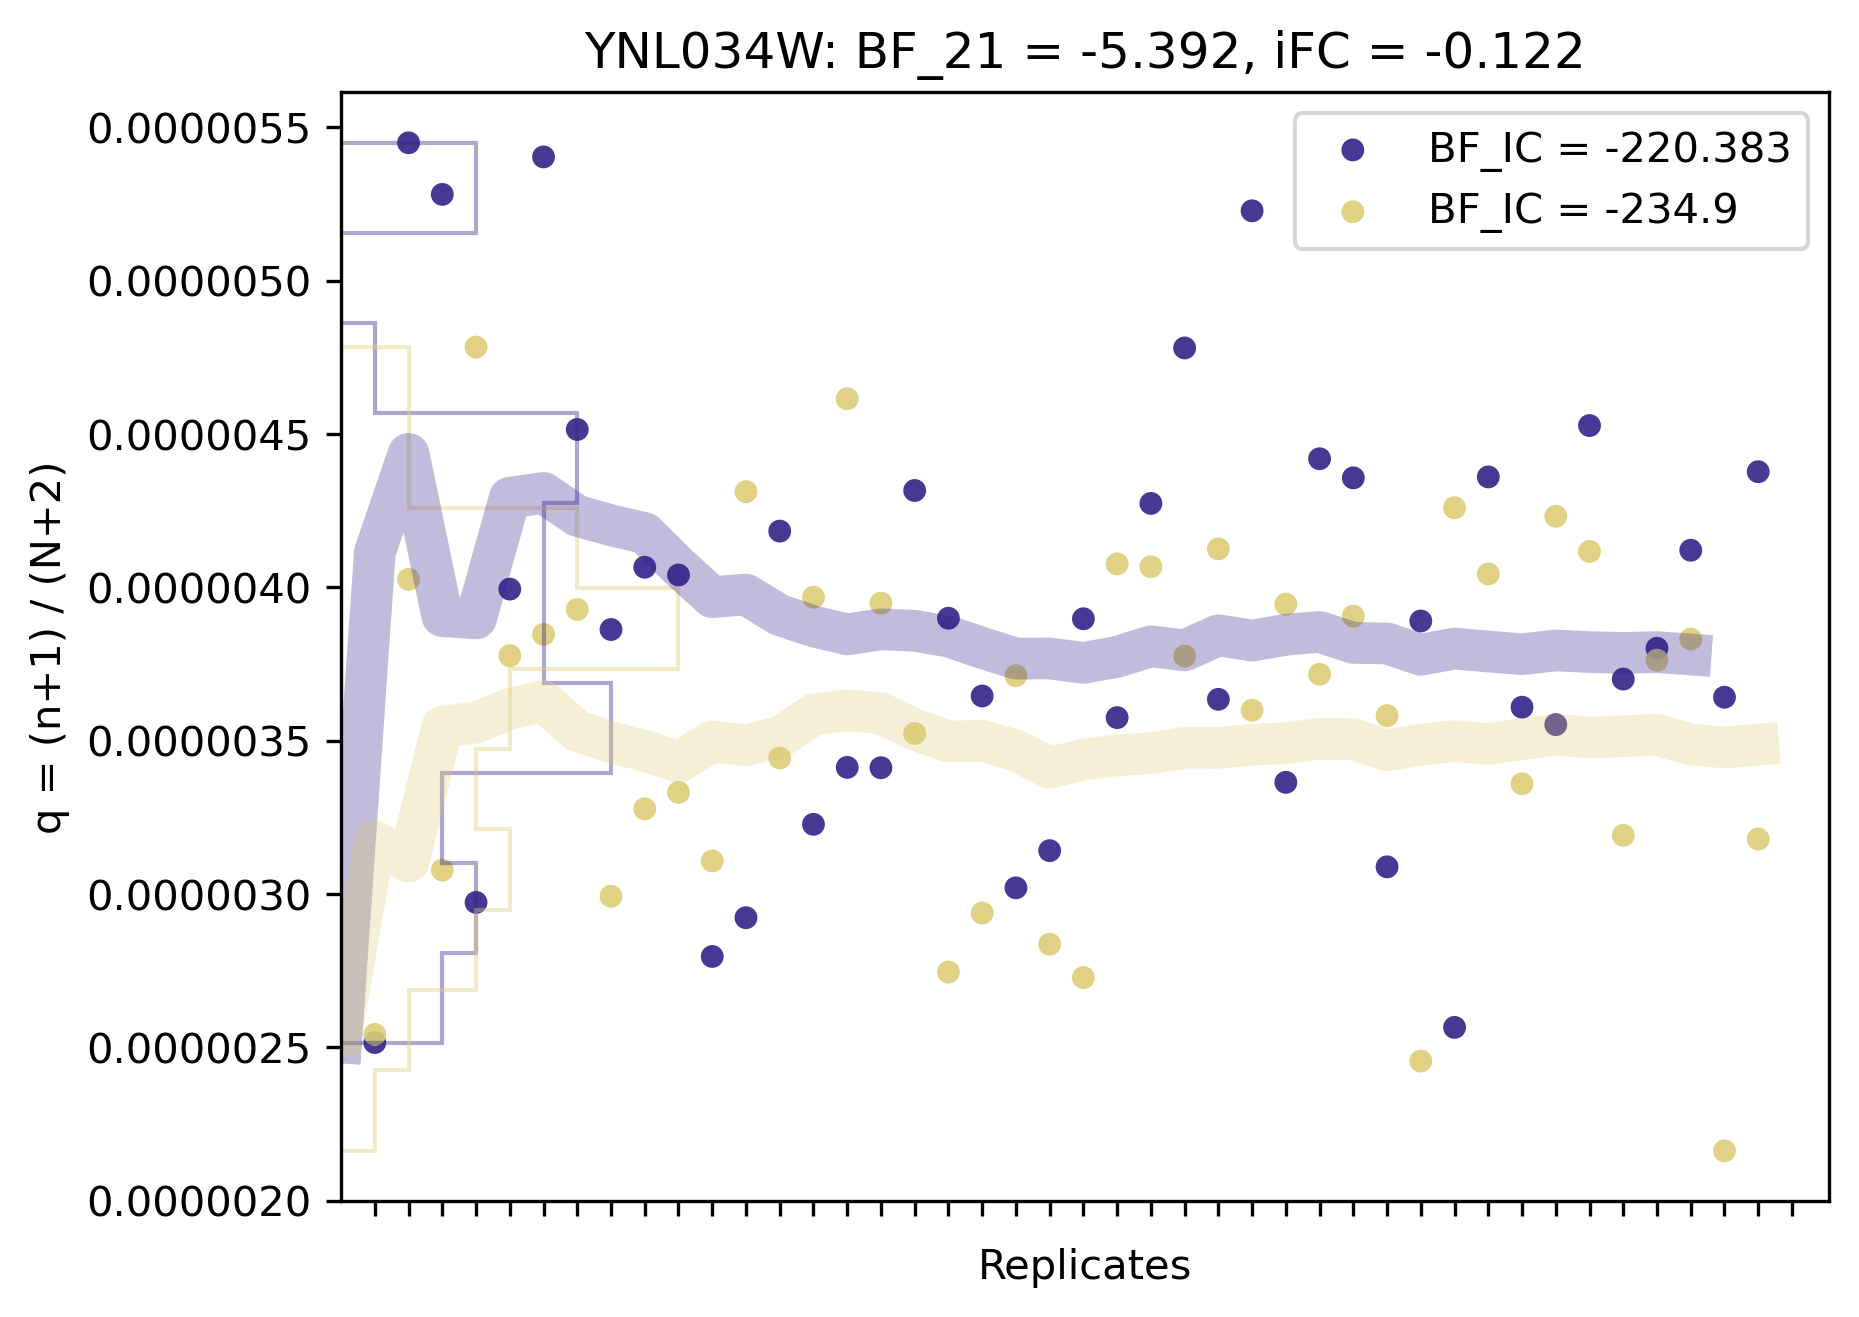

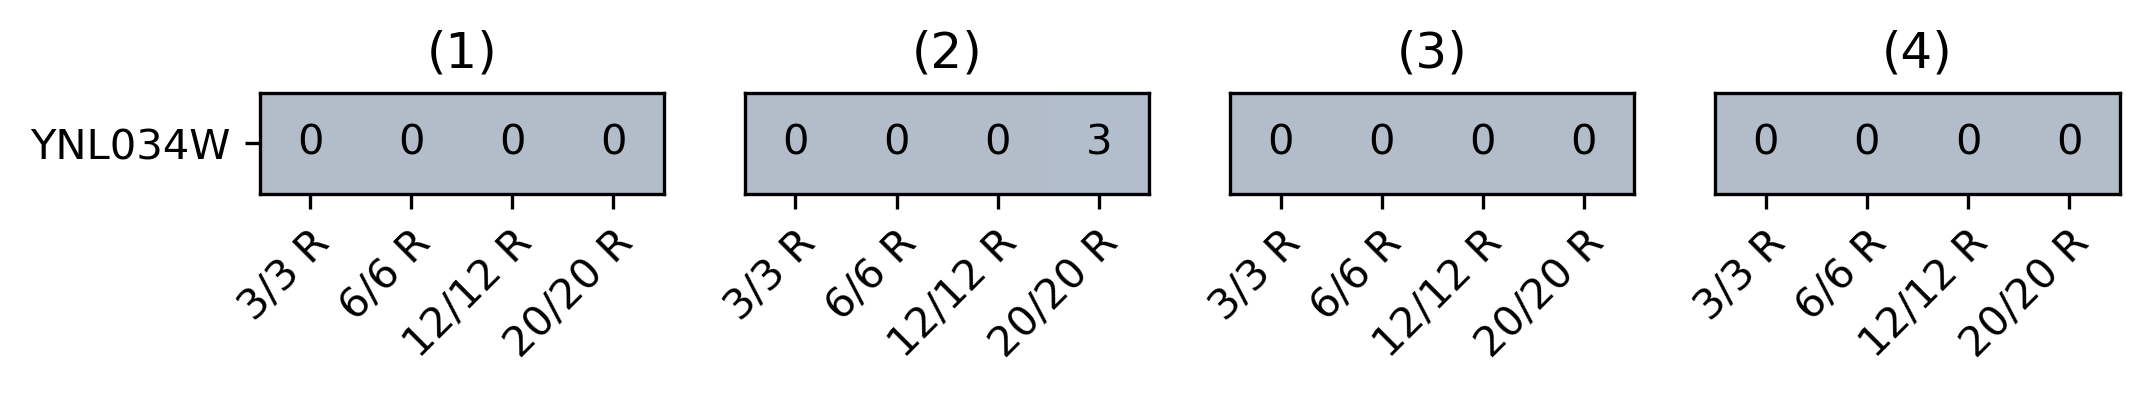

Read counts in WT across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   33   34  \
6253  YPL030W  184  384  235  283  457  801  364  255  270  ...  281  297   

       35   36   37   38   39   40   41   42  
6253  466  244  200  184  570  174  515  212  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   35   36  \
6253  YPL030W  380  282  308  347  236  484  306  381  327  ...  561  312   

       37   38   39   40   41   42   43   44  
6253  324  275  302  377  320  387  398  352  

[1 rows x 45 columns]

bayexpress results:


locus_name        BF        FC   BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
6253    YPL030W -5.389092  0.027465  46.700324     True -174.514572   

      AOTP_Snf2          W  
6253      False  52.880952

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


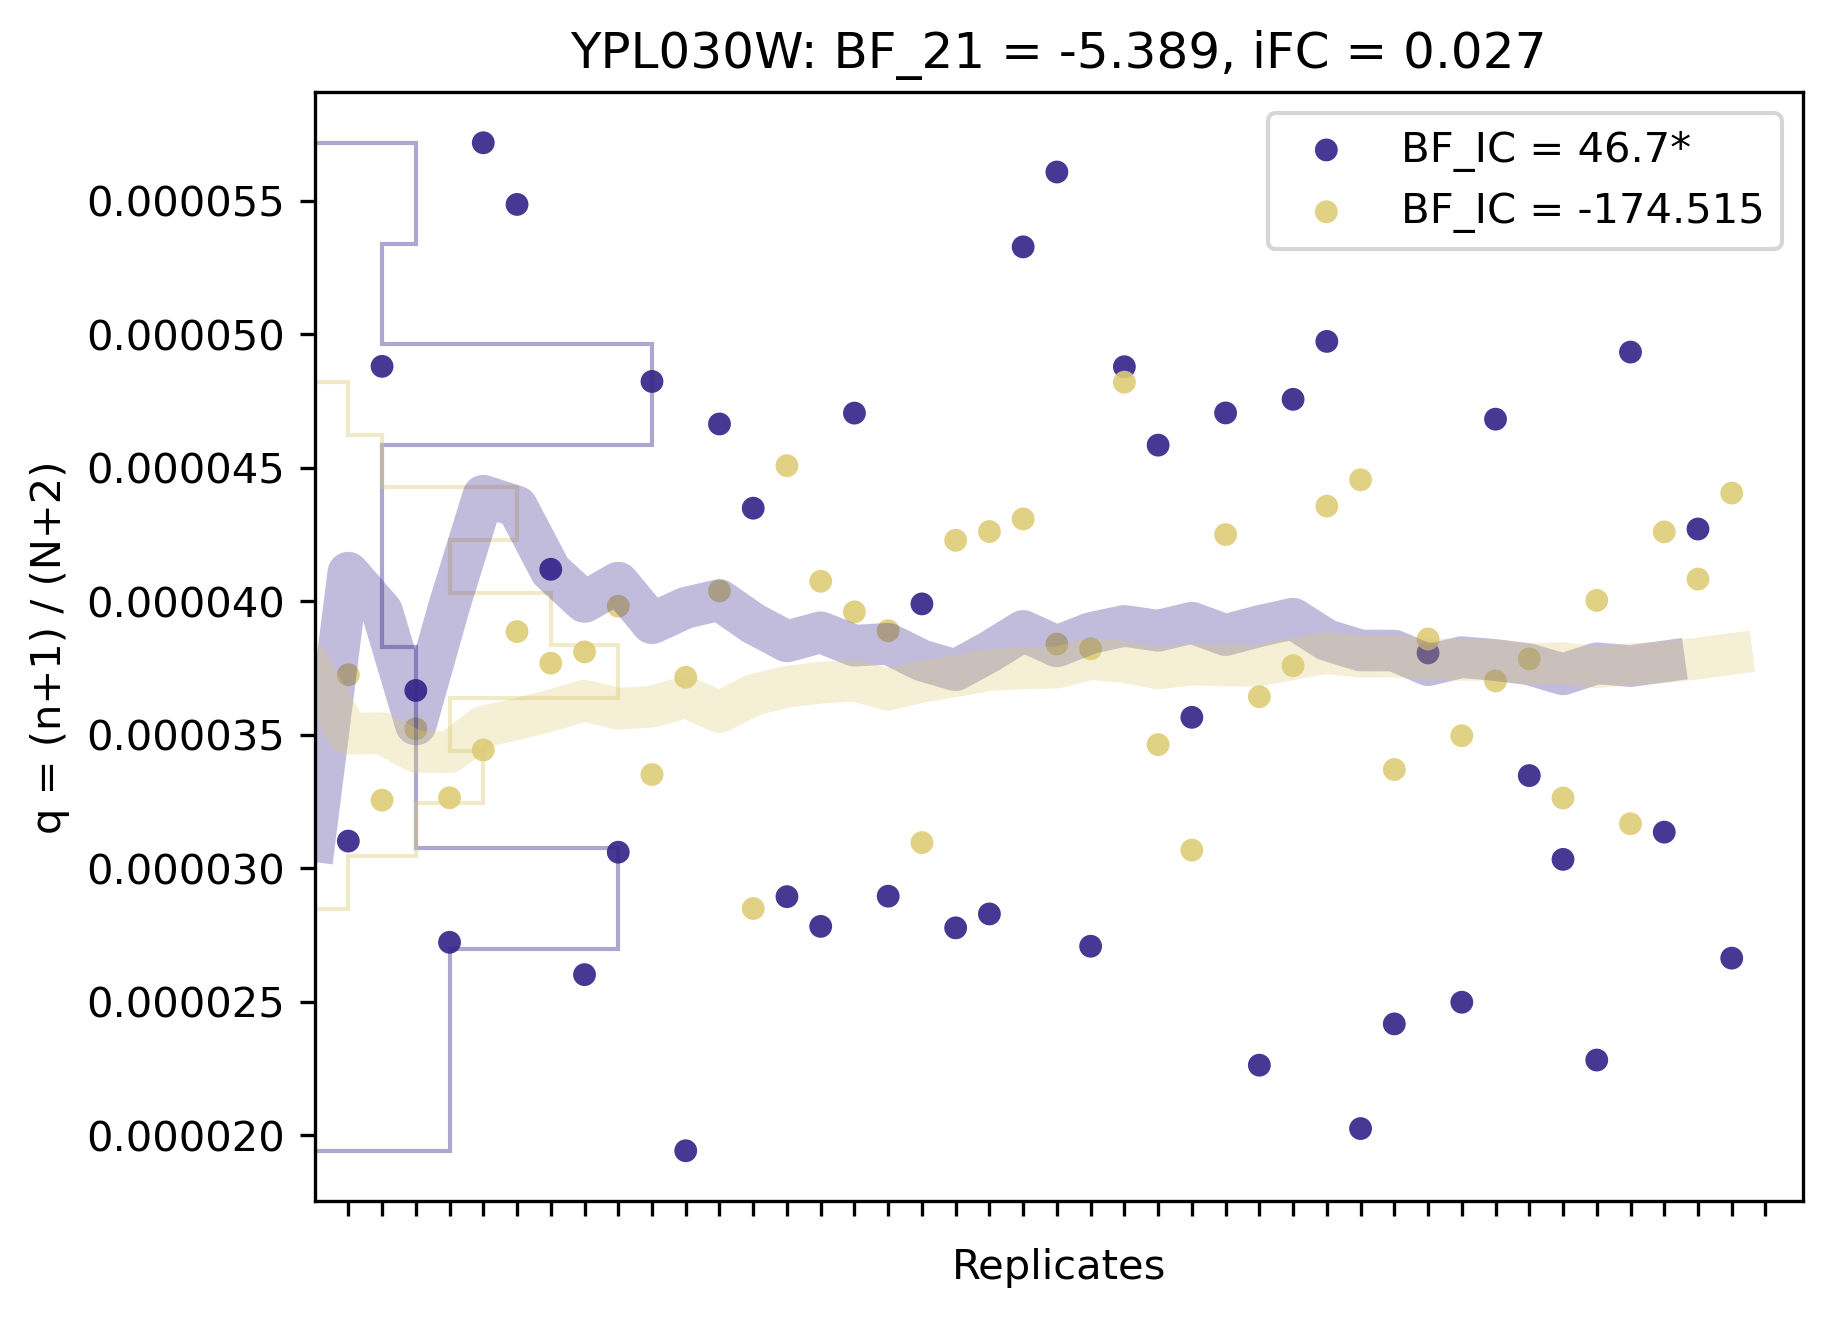

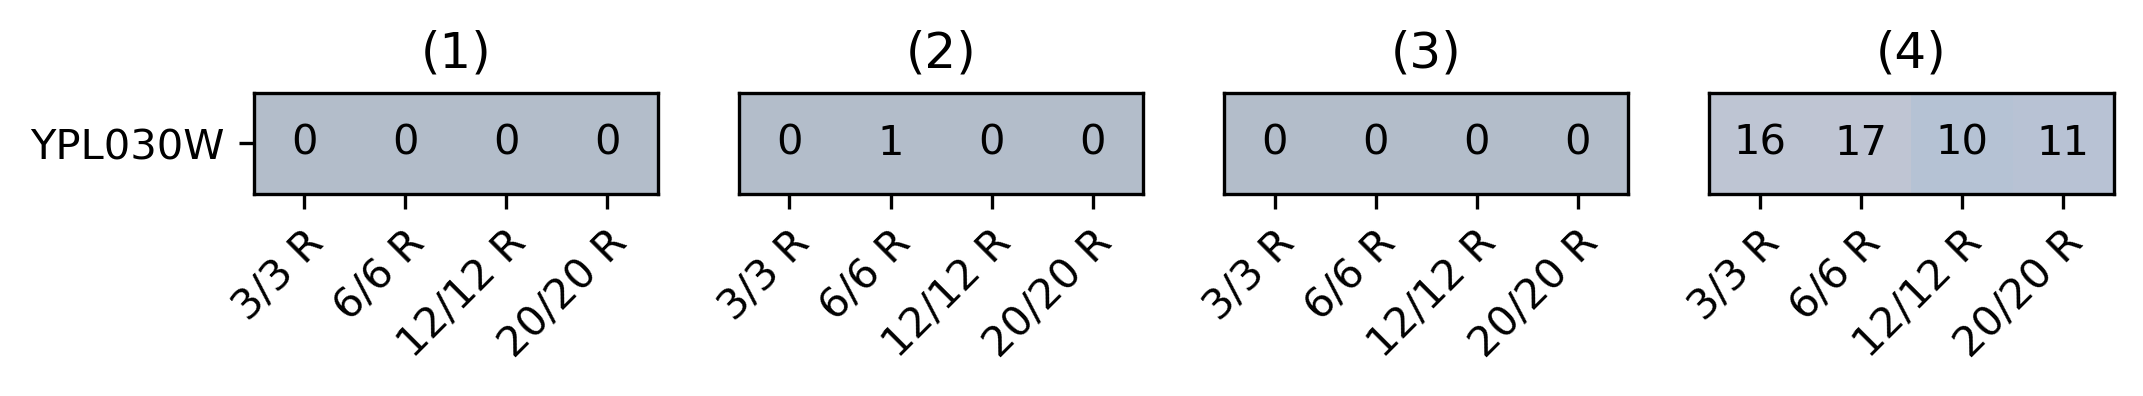

[None, None, None, None]

In [13]:
[stalk([gene]) for gene in ['snR32', 'YPL032C', 'YNL034W', 'YPL030W']]

Read counts in WT across replicates:


genes   1    2    3    4    5    6    7   8    9  ...  33   34   35   36  \
4  LSR1  60  163  233  163  193  375  194  84  211  ...  66  385  232  149   

    37  38   39   40   41   42  
4  114  81  109  132  243  128  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6   7    8    9  ...   35   36   37  38  \
4  LSR1  210  103  159  260  298  303  96  132  263  ...  250  195  153  57   

    39   40   41   42   43   44  
4  742  227  227  117  224  136  

[1 rows x 45 columns]

bayexpress results:


locus_name        BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  AOTP_Snf2  \
4       LSR1  0.451012  0.120243  251.787125     True  478.066414       True   

      W  
4  34.5

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


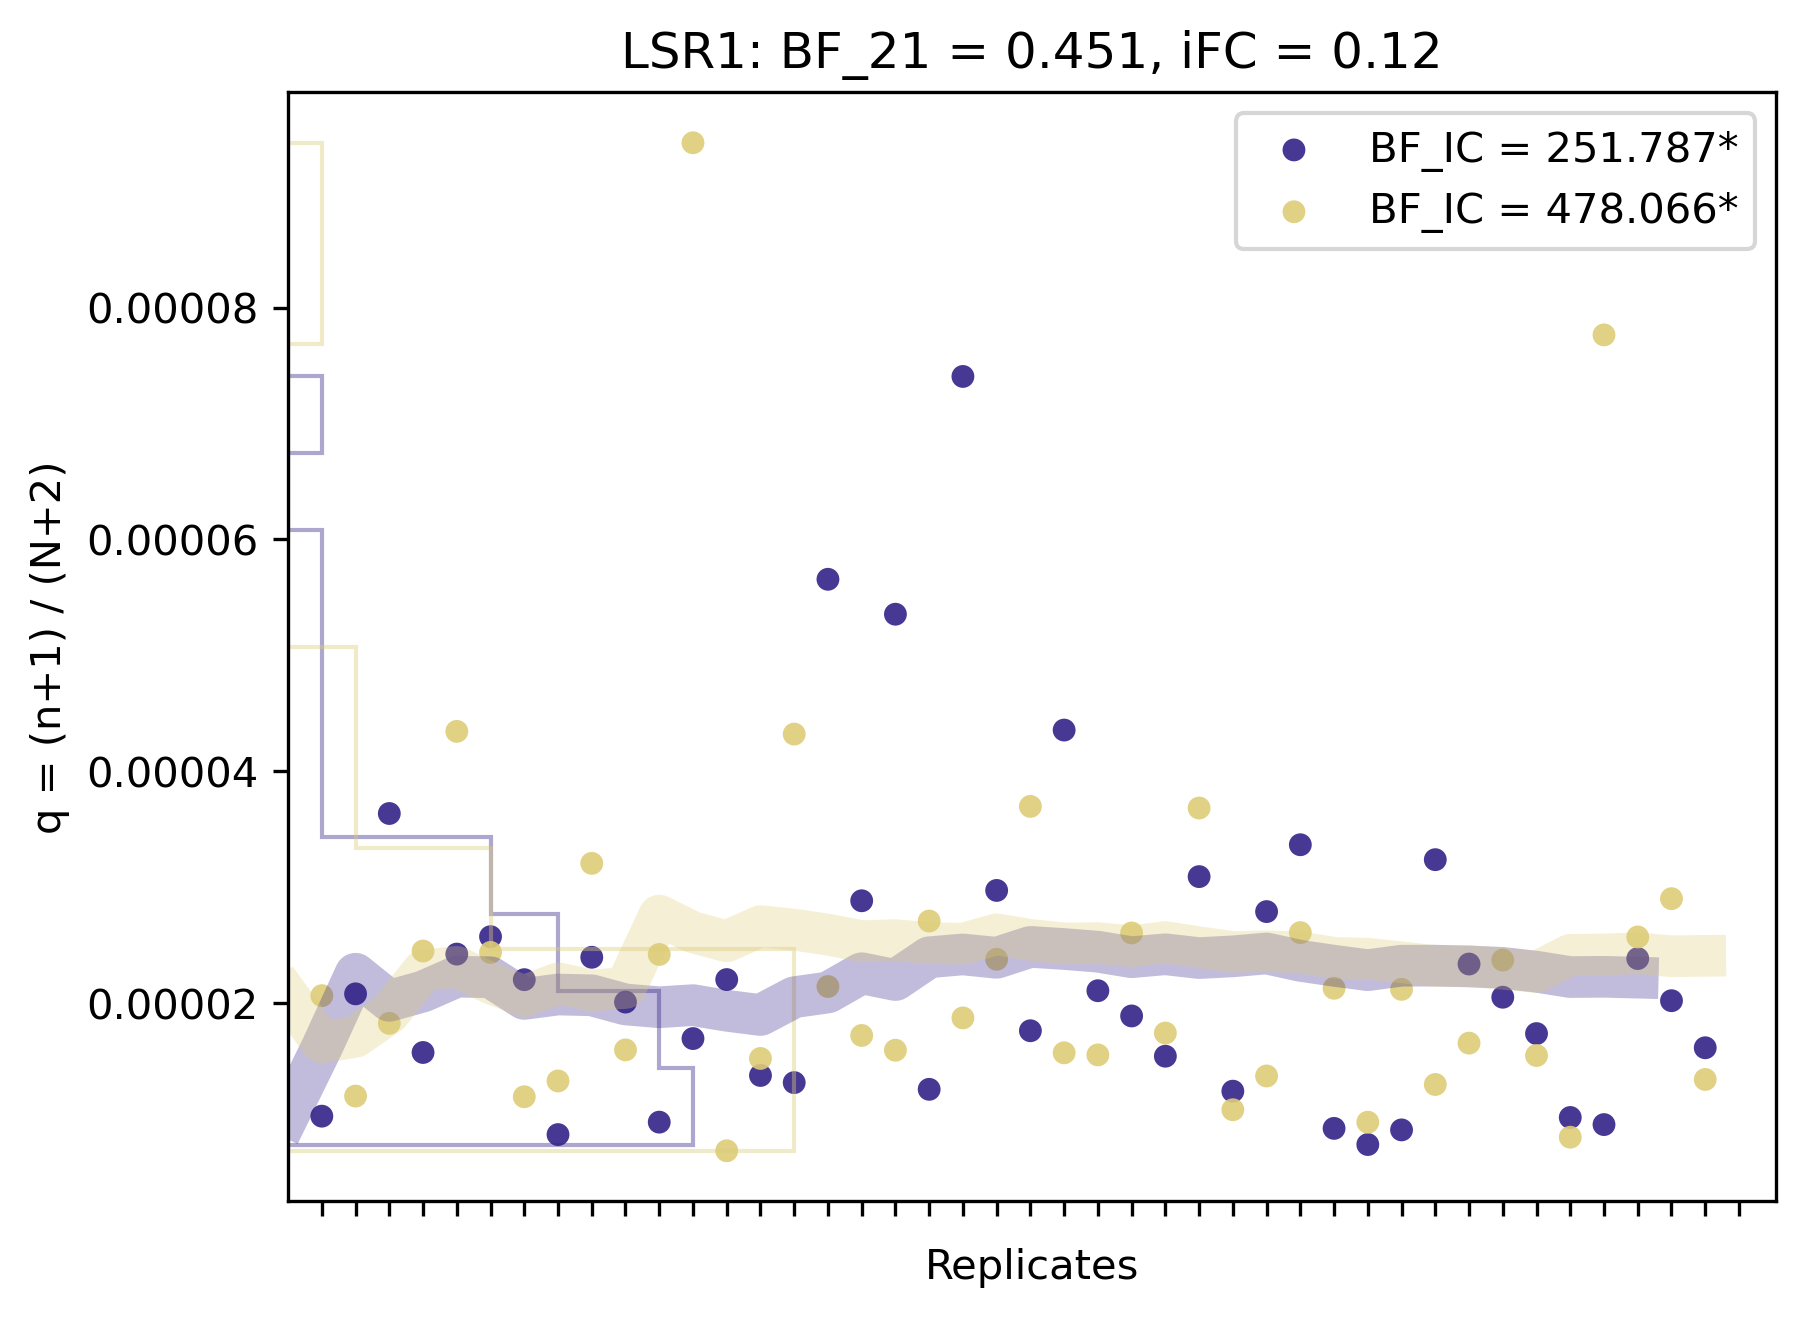

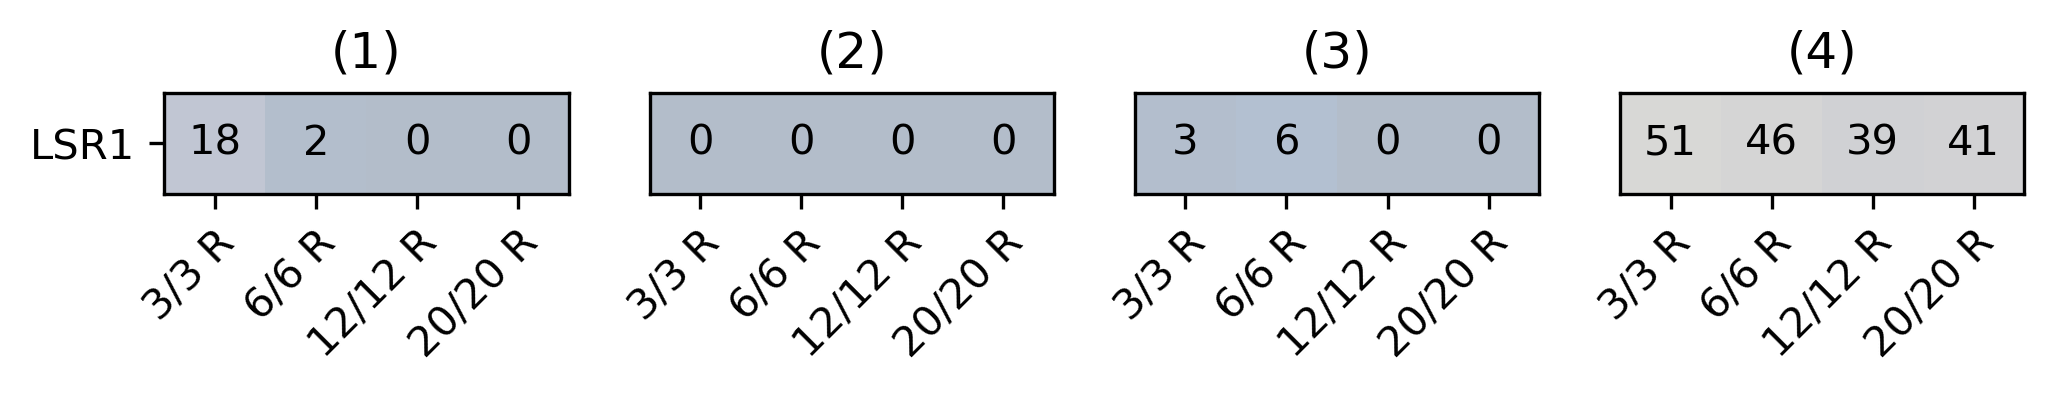

Read counts in WT across replicates:


genes     1     2     3     4     5     6     7     8     9  ...  \
4118  YLL039C  2871  2292  3125  5119  1856  3819  2731  4535  2751  ...   

        33    34    35    36    37    38    39    40    41    42  
4118  2505  6020  2577  3350  3851  3740  3142  2683  3485  3700  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes     1     2     3     4     5     6     7     8     9  ...  \
4118  YLL039C  4854  4618  4216  5444  3416  5893  3748  4813  3494  ...   

        35    36    37    38    39    40    41    42    43    44  
4118  6705  3932  4700  3101  4272  3889  3504  4042  3635  3027  

[1 rows x 45 columns]

bayexpress results:


locus_name          BF        FC     BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
4118    YLL039C  533.296466  0.257212  2171.972823     True    14.76729   

      AOTP_Snf2      W  
4118       True  799.0

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


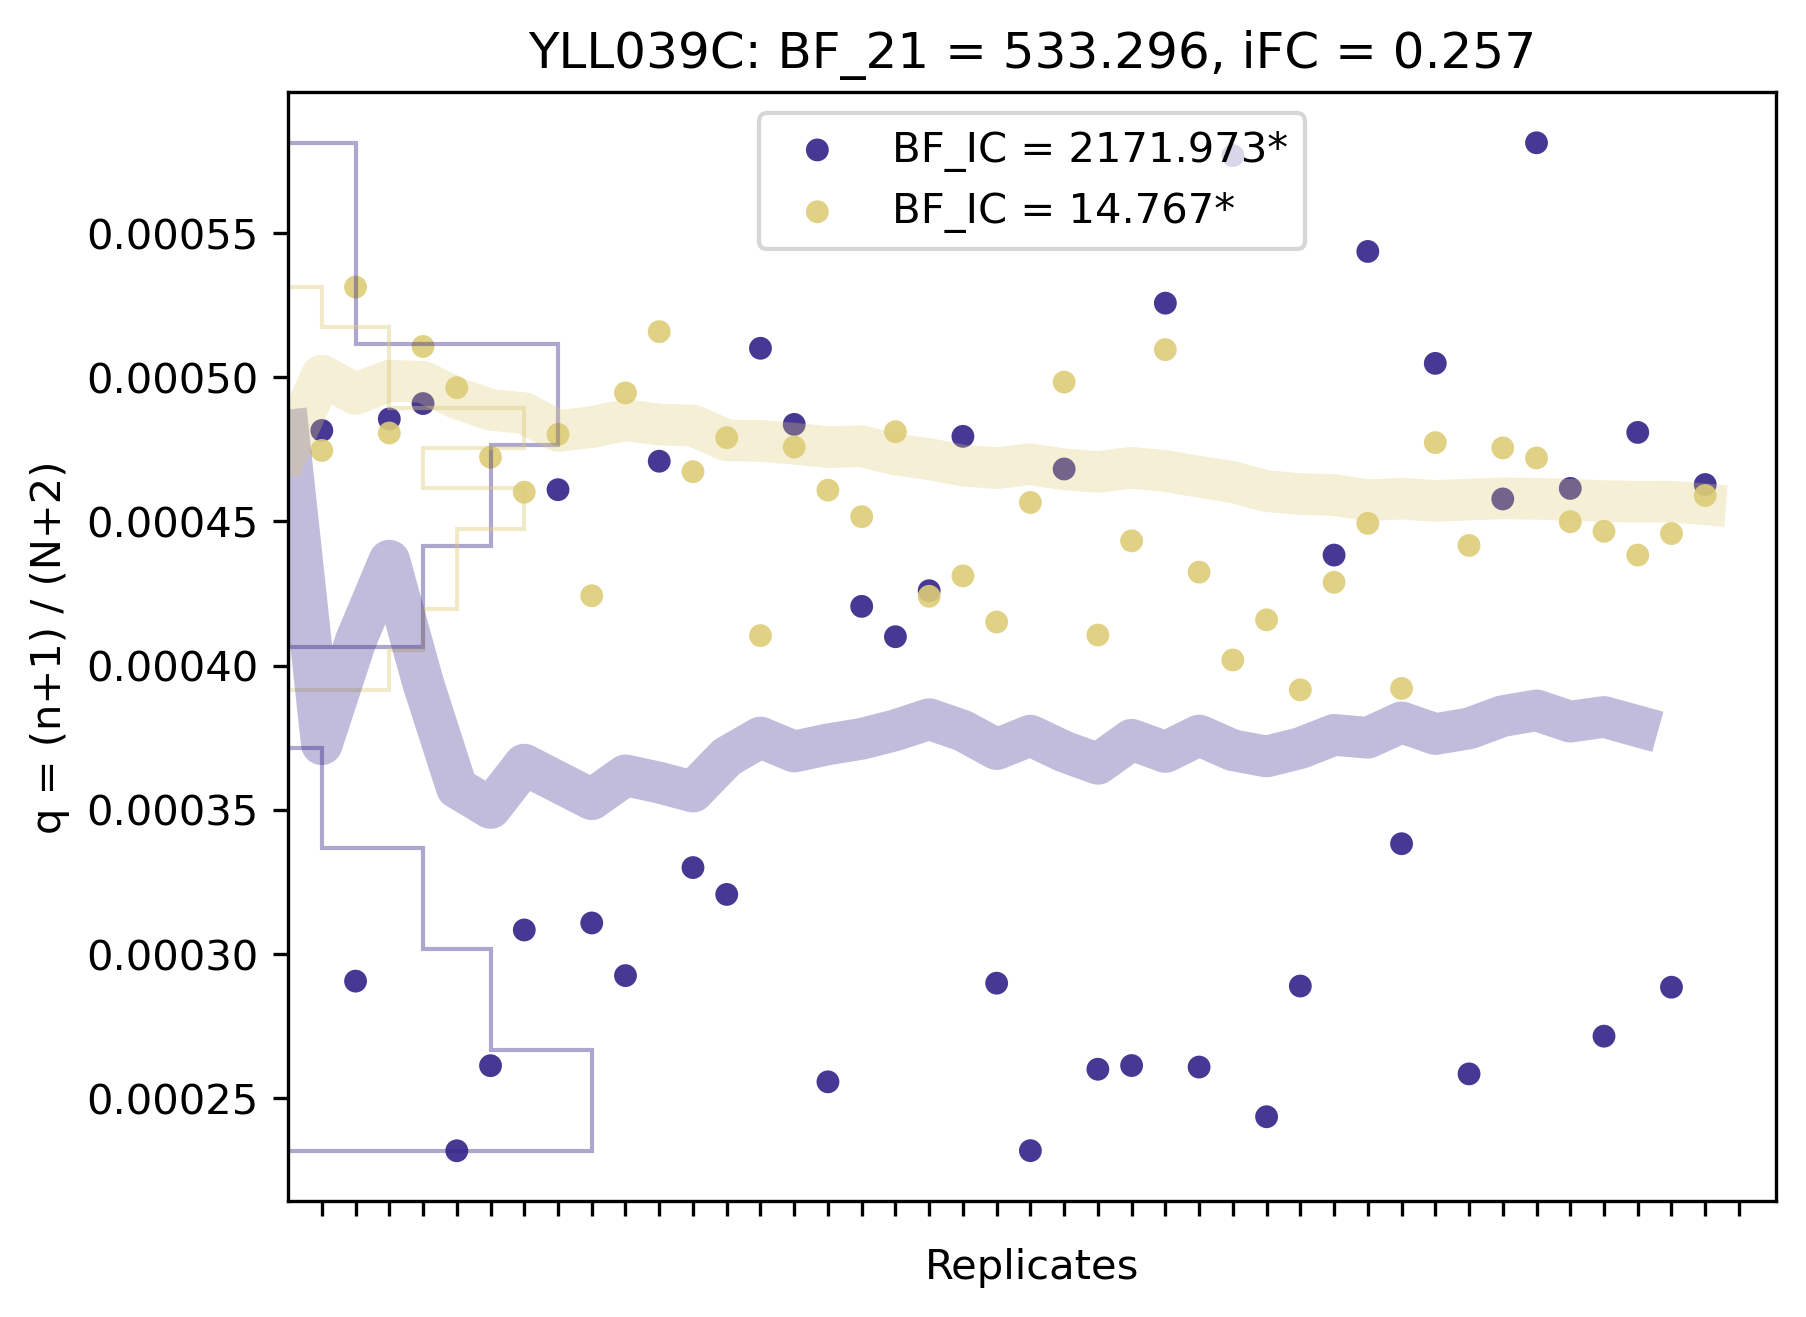

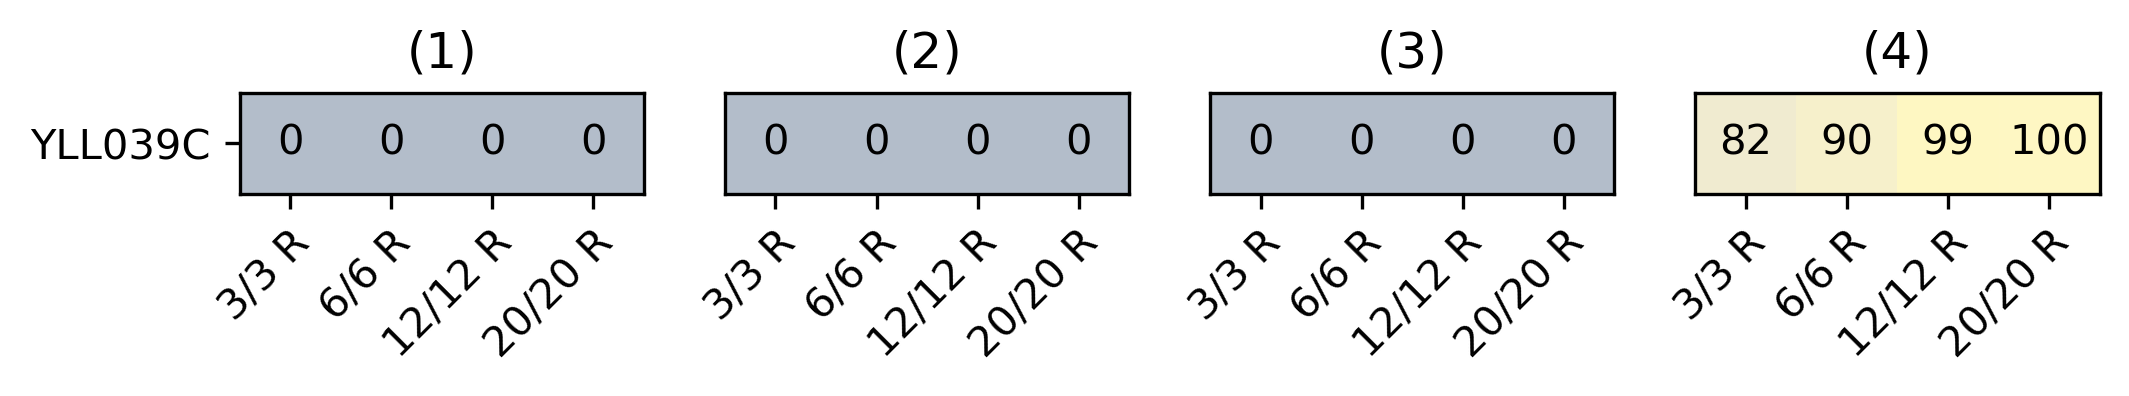

Read counts in WT across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   33   34  \
3425  YJL098W  191  444  189  274  482  835  377  351  333  ...  425  319   

       35   36   37   38   39   40   41   42  
3425  600  276  190  276  740  141  675  209  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   35   36  \
3425  YJL098W  422  275  270  406  206  479  388  422  328  ...  632  355   

       37   38   39   40   41   42   43   44  
3425  483  251  318  441  302  344  430  272  

[1 rows x 45 columns]

bayexpress results:


locus_name        BF       FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
3425    YJL098W  1.025525 -0.09119  113.153322     True -129.167778   

      AOTP_Snf2          W  
3425      False  54.166667

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


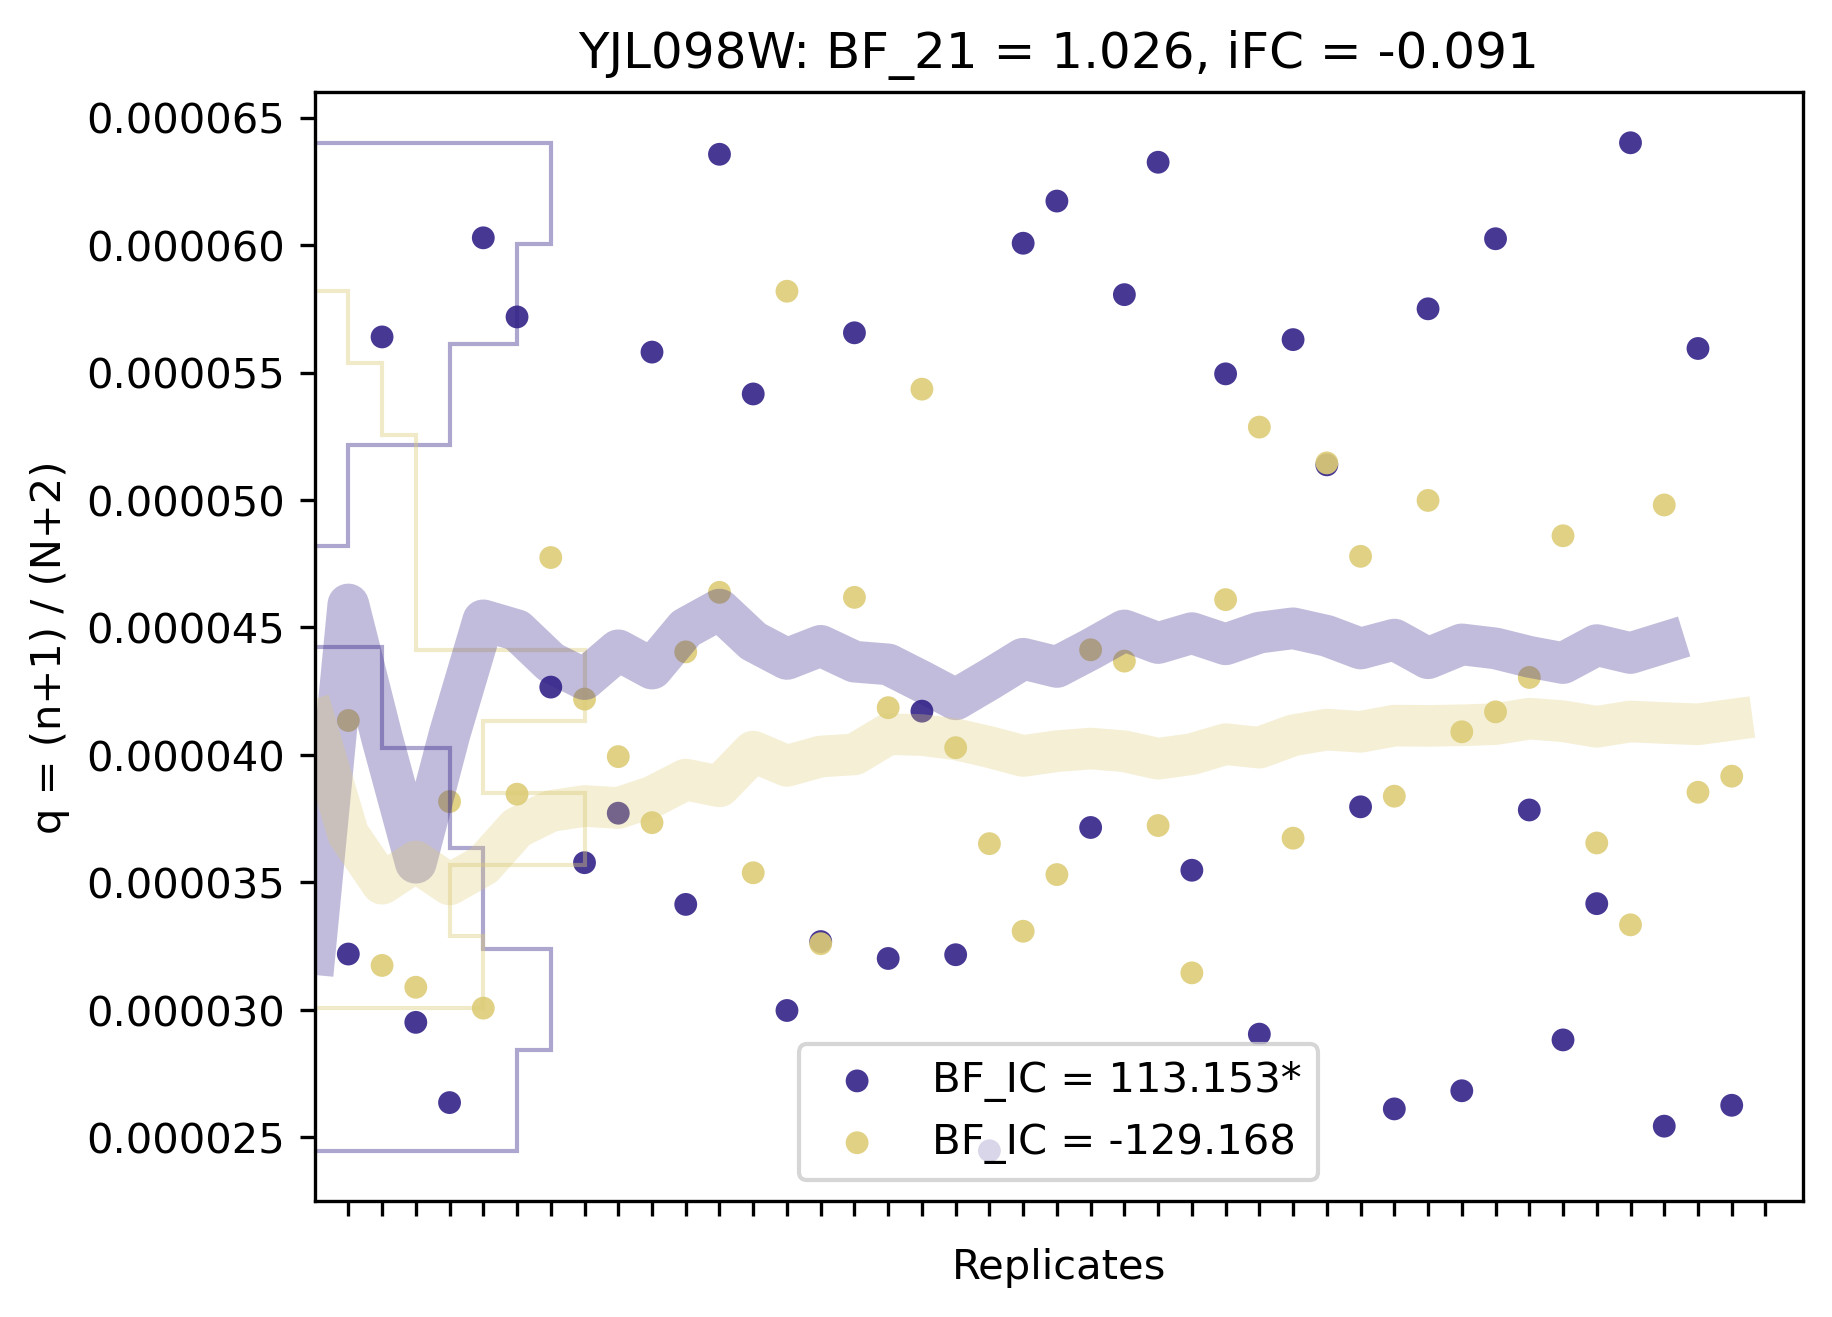

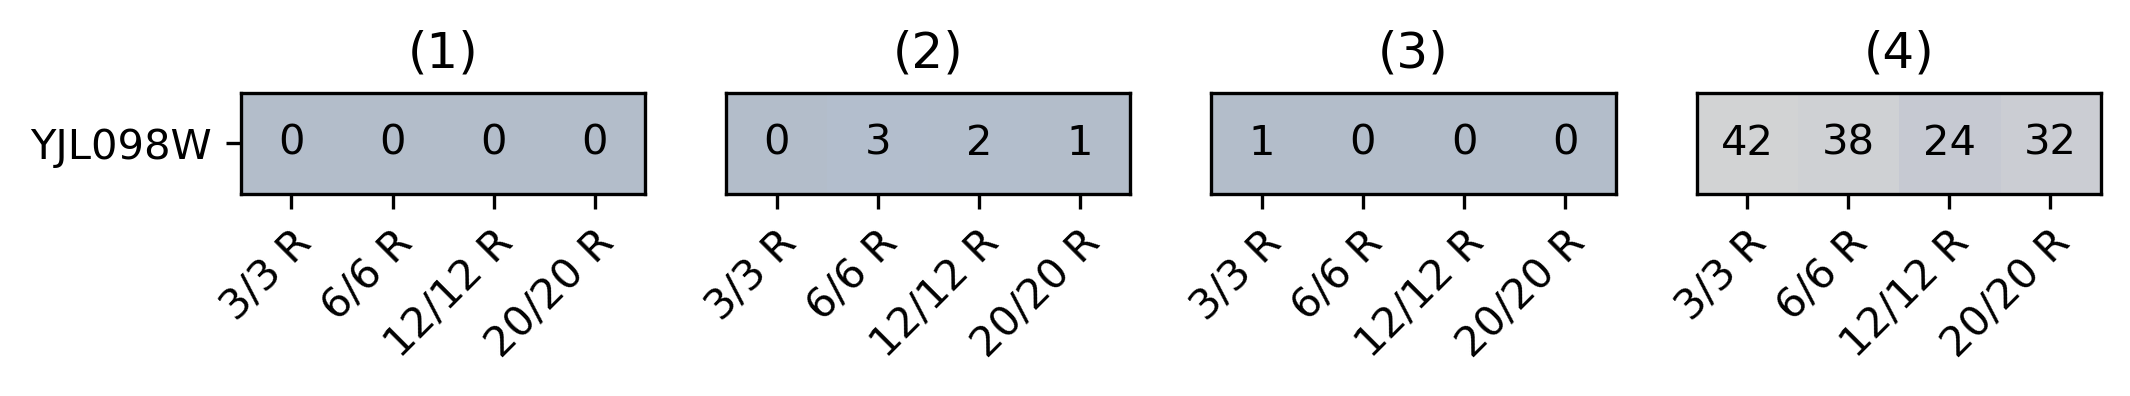

Read counts in WT across replicates:


genes     1     2     3      4     5      6      7     8     9  ...  \
4105  YLL026W  7782  6824  5769  15638  5762  12947  11553  7721  8710  ...   

        33     34    35    36     37     38    39    40     41     42  
4105  9044  14953  9460  6648  14532  10012  8658  5186  10382  11633  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes     1     2     3     4     5     6     7     8     9  ...  \
4105  YLL026W  4902  6442  8778  6301  5824  6513  3583  9178  8045  ...   

        35    36    37    38    39    40    41    42    43    44  
4105  8981  4753  4432  5837  7484  4437  6357  8747  3817  6881  

[1 rows x 45 columns]

bayexpress results:


locus_name           BF        FC     BF_IC_WT  AOTP_WT   BF_IC_Snf2  \
4105    YLL026W  6986.693811 -0.641283  7075.514403     True  4404.269569   

      AOTP_Snf2            W  
4105       True  2982.880952

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


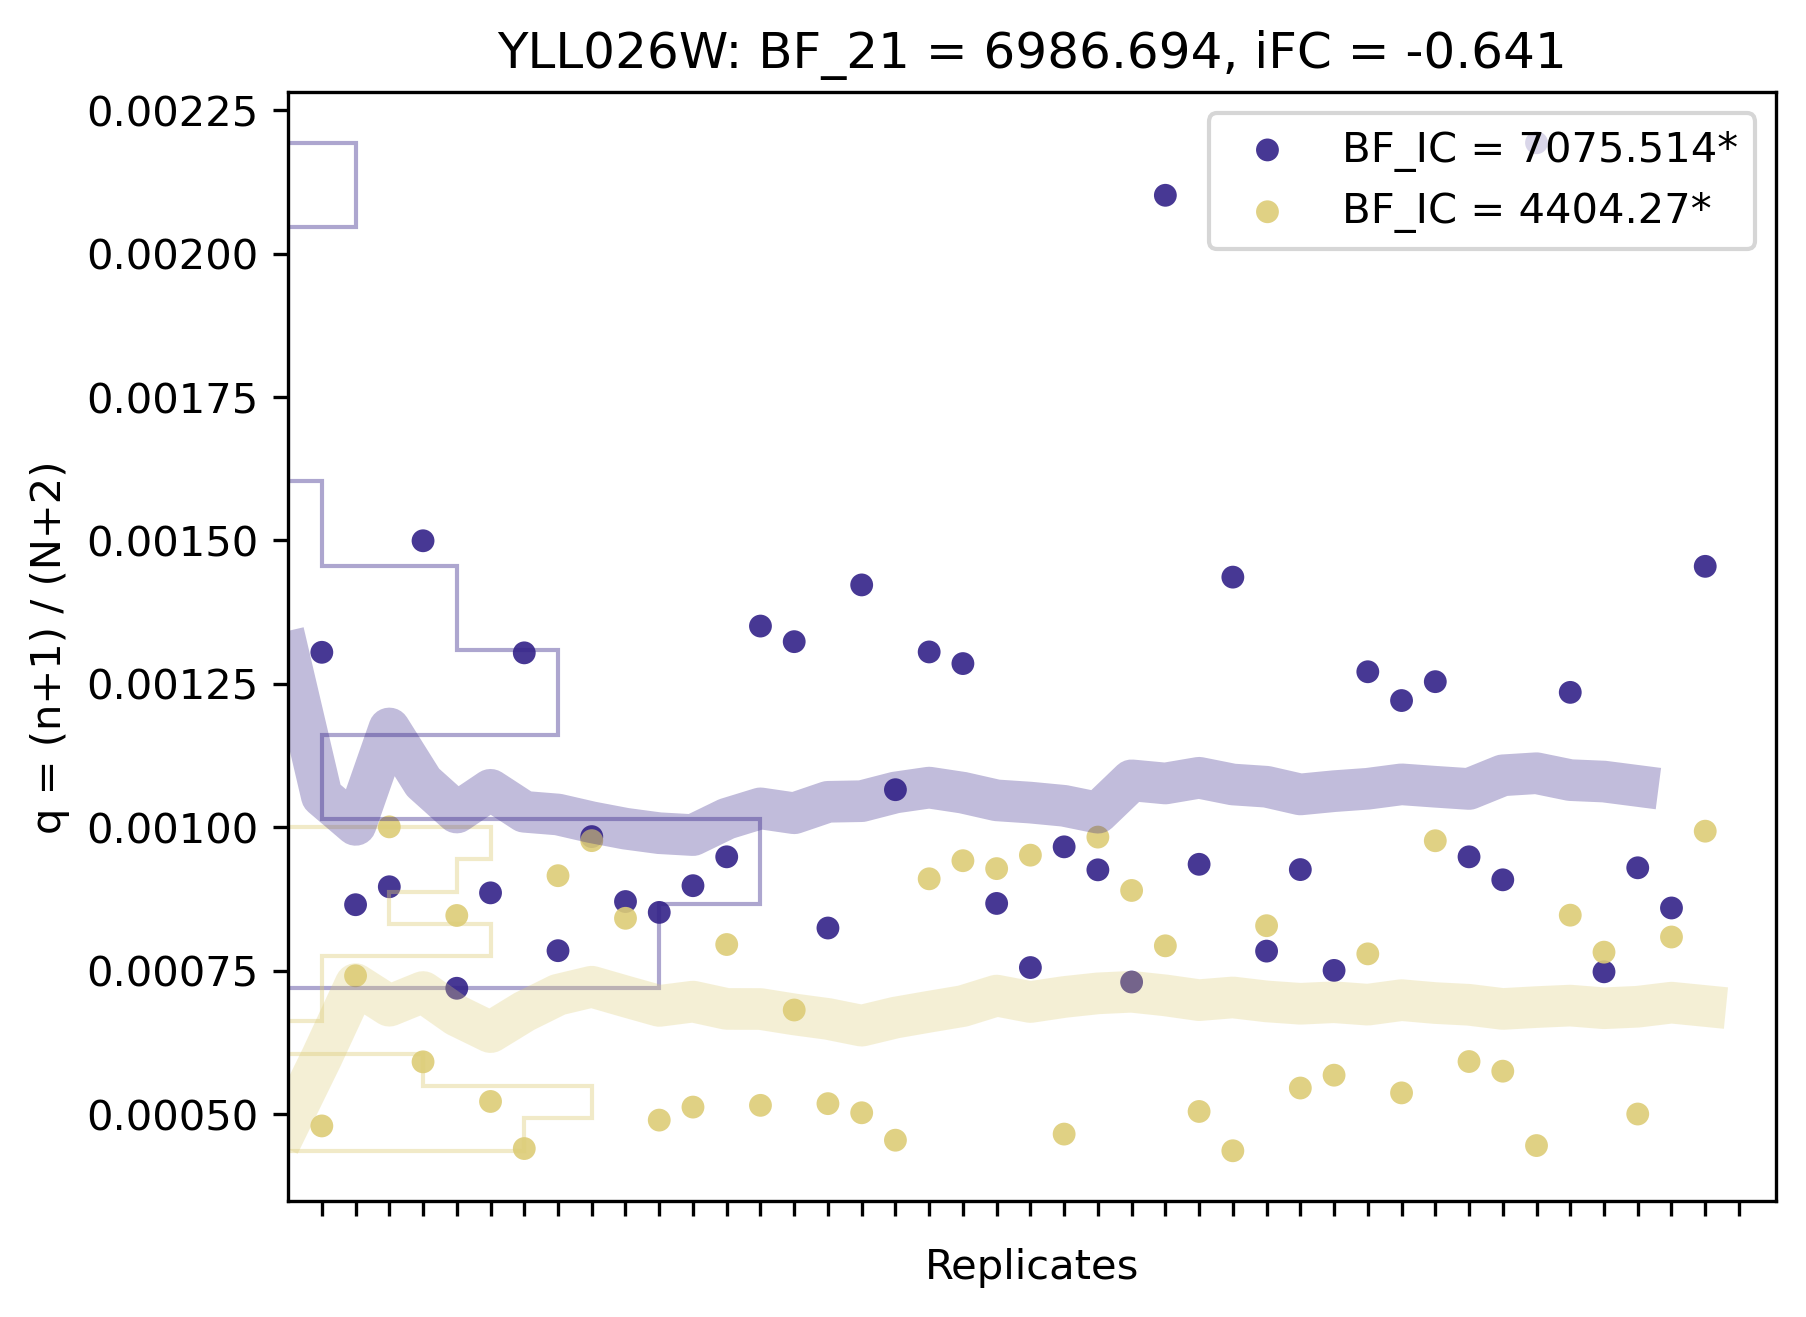

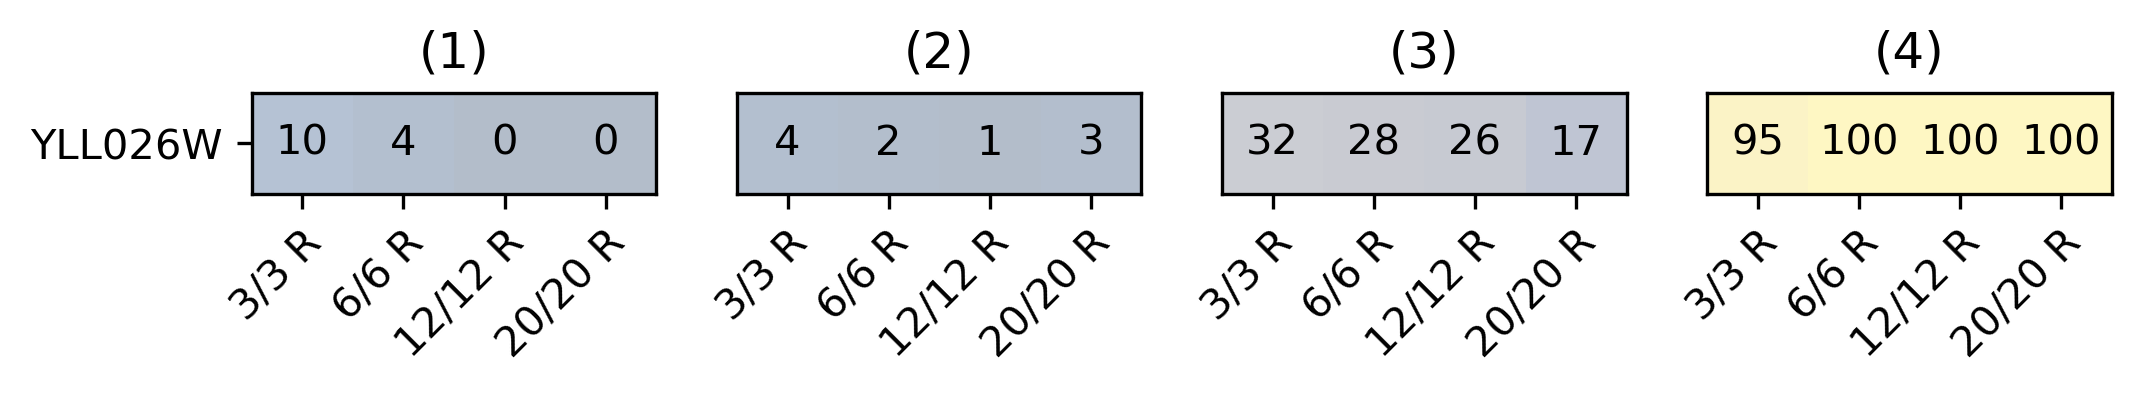

[None, None, None, None]

In [14]:
[stalk([gene]) for gene in ['LSR1', 'YLL039C', 'YJL098W', 'YLL026W']]

Read counts in WT across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   33   34  \
4868  YMR048W  125  178  146  217  178  257  136  217  178  ...  136  249   

       35   36   37   38   39   40   41   42  
4868  209  152  131  158  216  122  265  153  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   35   36  \
4868  YMR048W  390  310  331  418  243  479  292  276  296  ...  597  297   

       37   38   39   40   41   42   43   44  
4868  398  231  342  326  266  267  383  258  

[1 rows x 45 columns]

bayexpress results:


locus_name          BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
4868    YMR048W  329.411226  0.797614 -202.050367    False -190.785337   

      AOTP_Snf2          W  
4868      False  143.02381

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


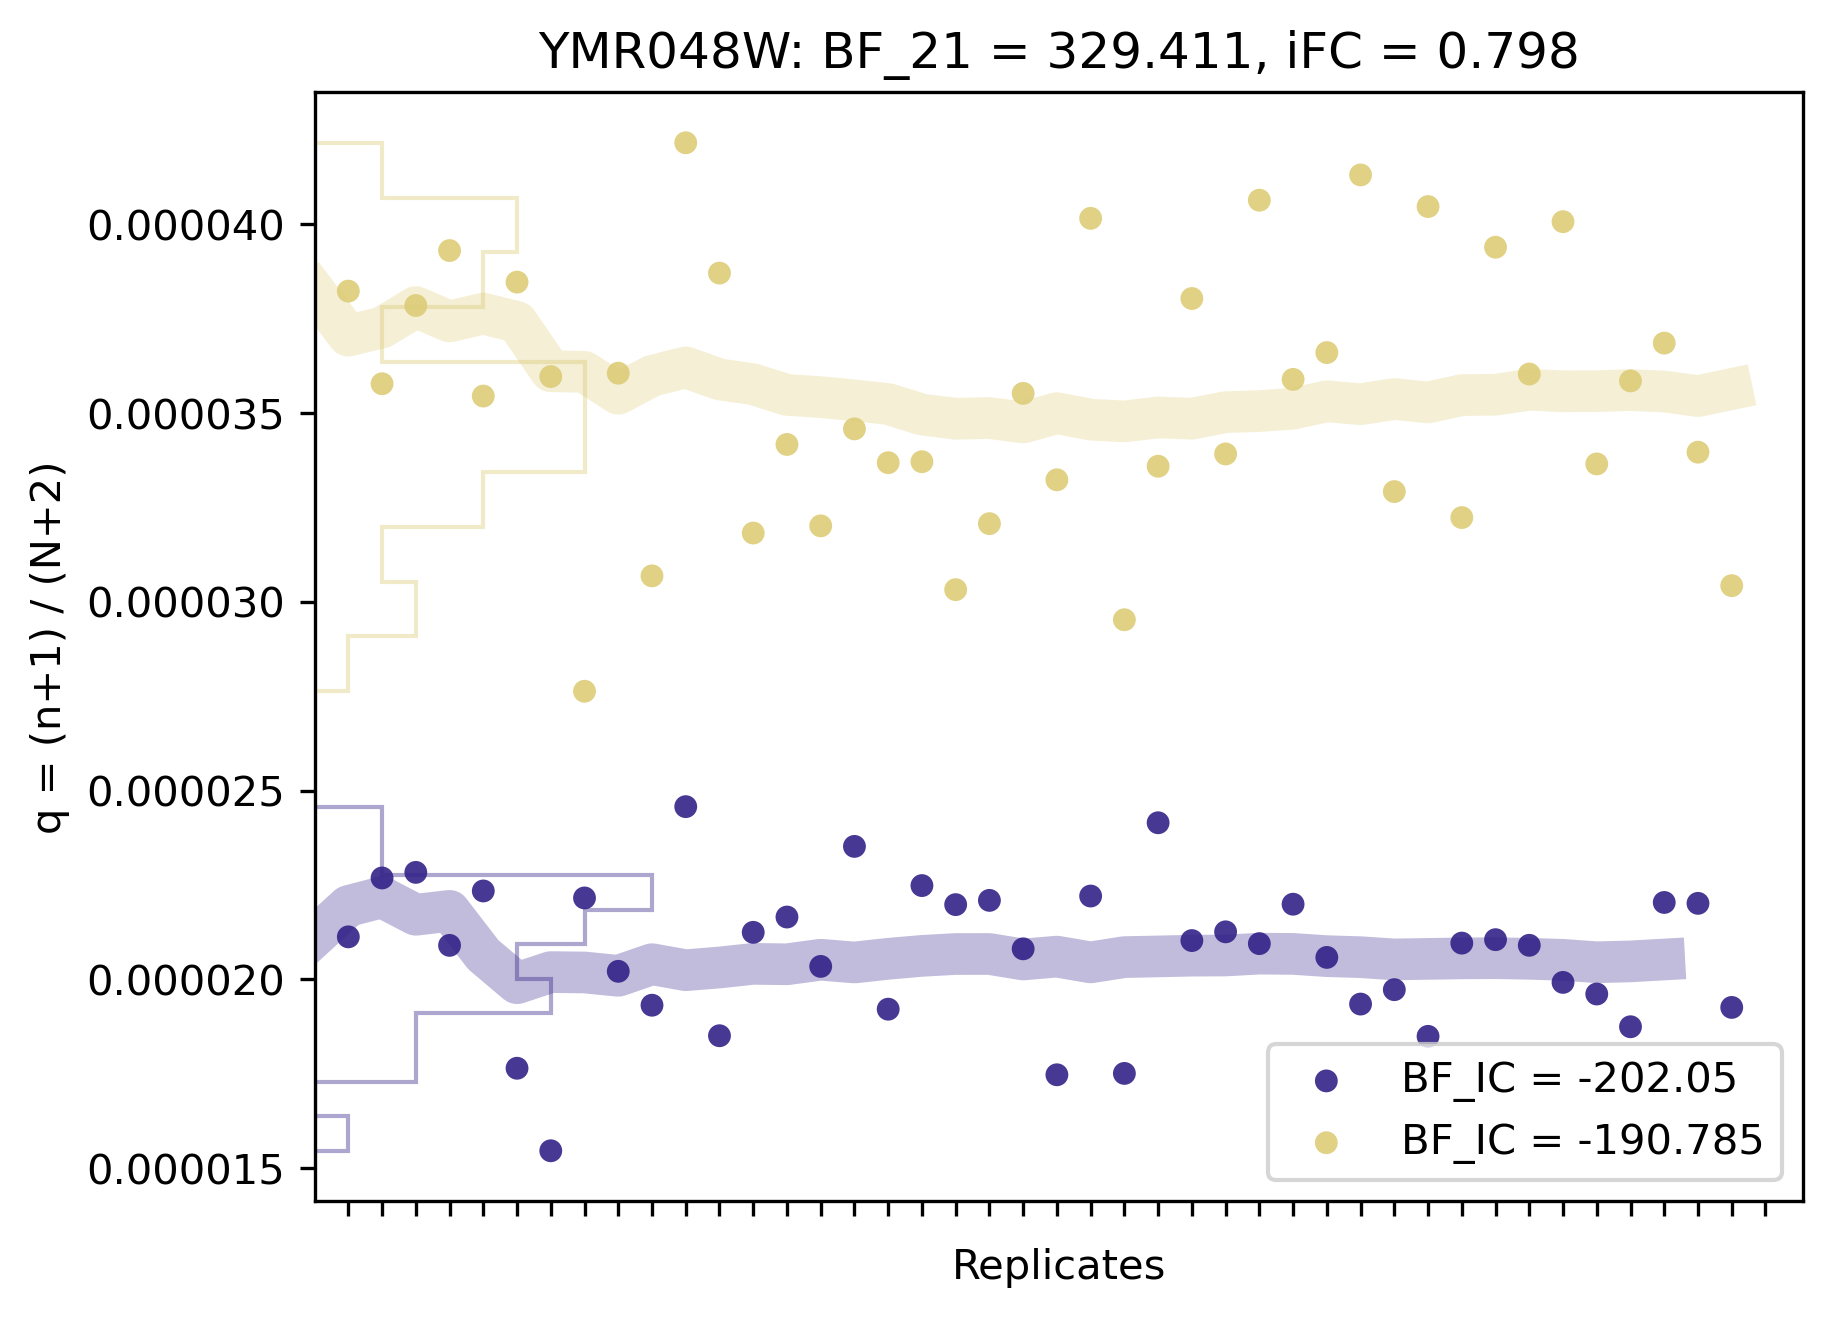

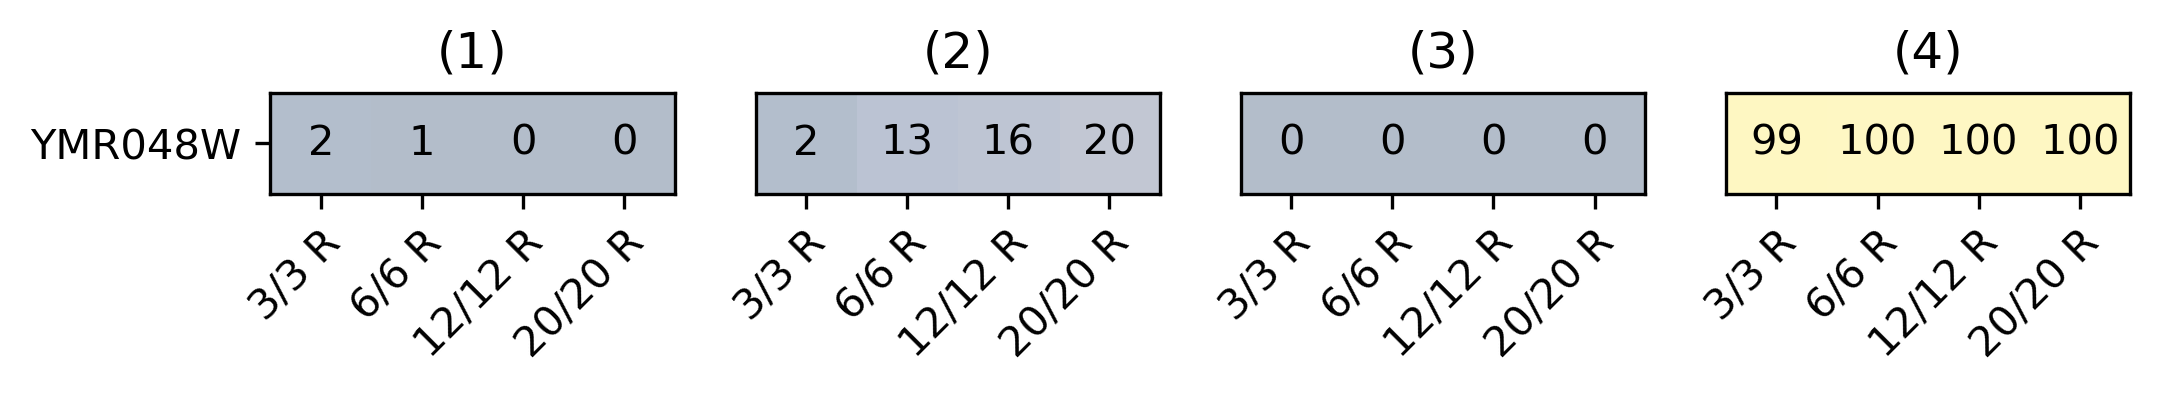

In [15]:
stalk(['YMR048W'])

Read counts in WT across replicates:


genes    1    2    3    4    5     6    7    8    9  ...   33   34  \
5422  YNL232W  388  697  459  658  779  1276  674  718  769  ...  528  775   

       35   36   37   38    39   40    41   42  
5422  833  529  395  536  1068  385  1080  515  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...    35   36  \
5422  YNL232W  841  622  644  855  573  983  688  772  635  ...  1335  666   

       37   38   39   40   41   42   43   44  
5422  913  595  804  679  714  710  768  646  

[1 rows x 45 columns]

bayexpress results:


locus_name      BF        FC   BF_IC_WT  AOTP_WT  BF_IC_Snf2  AOTP_Snf2  \
5422    YNL232W  7.1749  0.090803 -48.996454    False -181.486812      False   

             W  
5422  79.52381

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


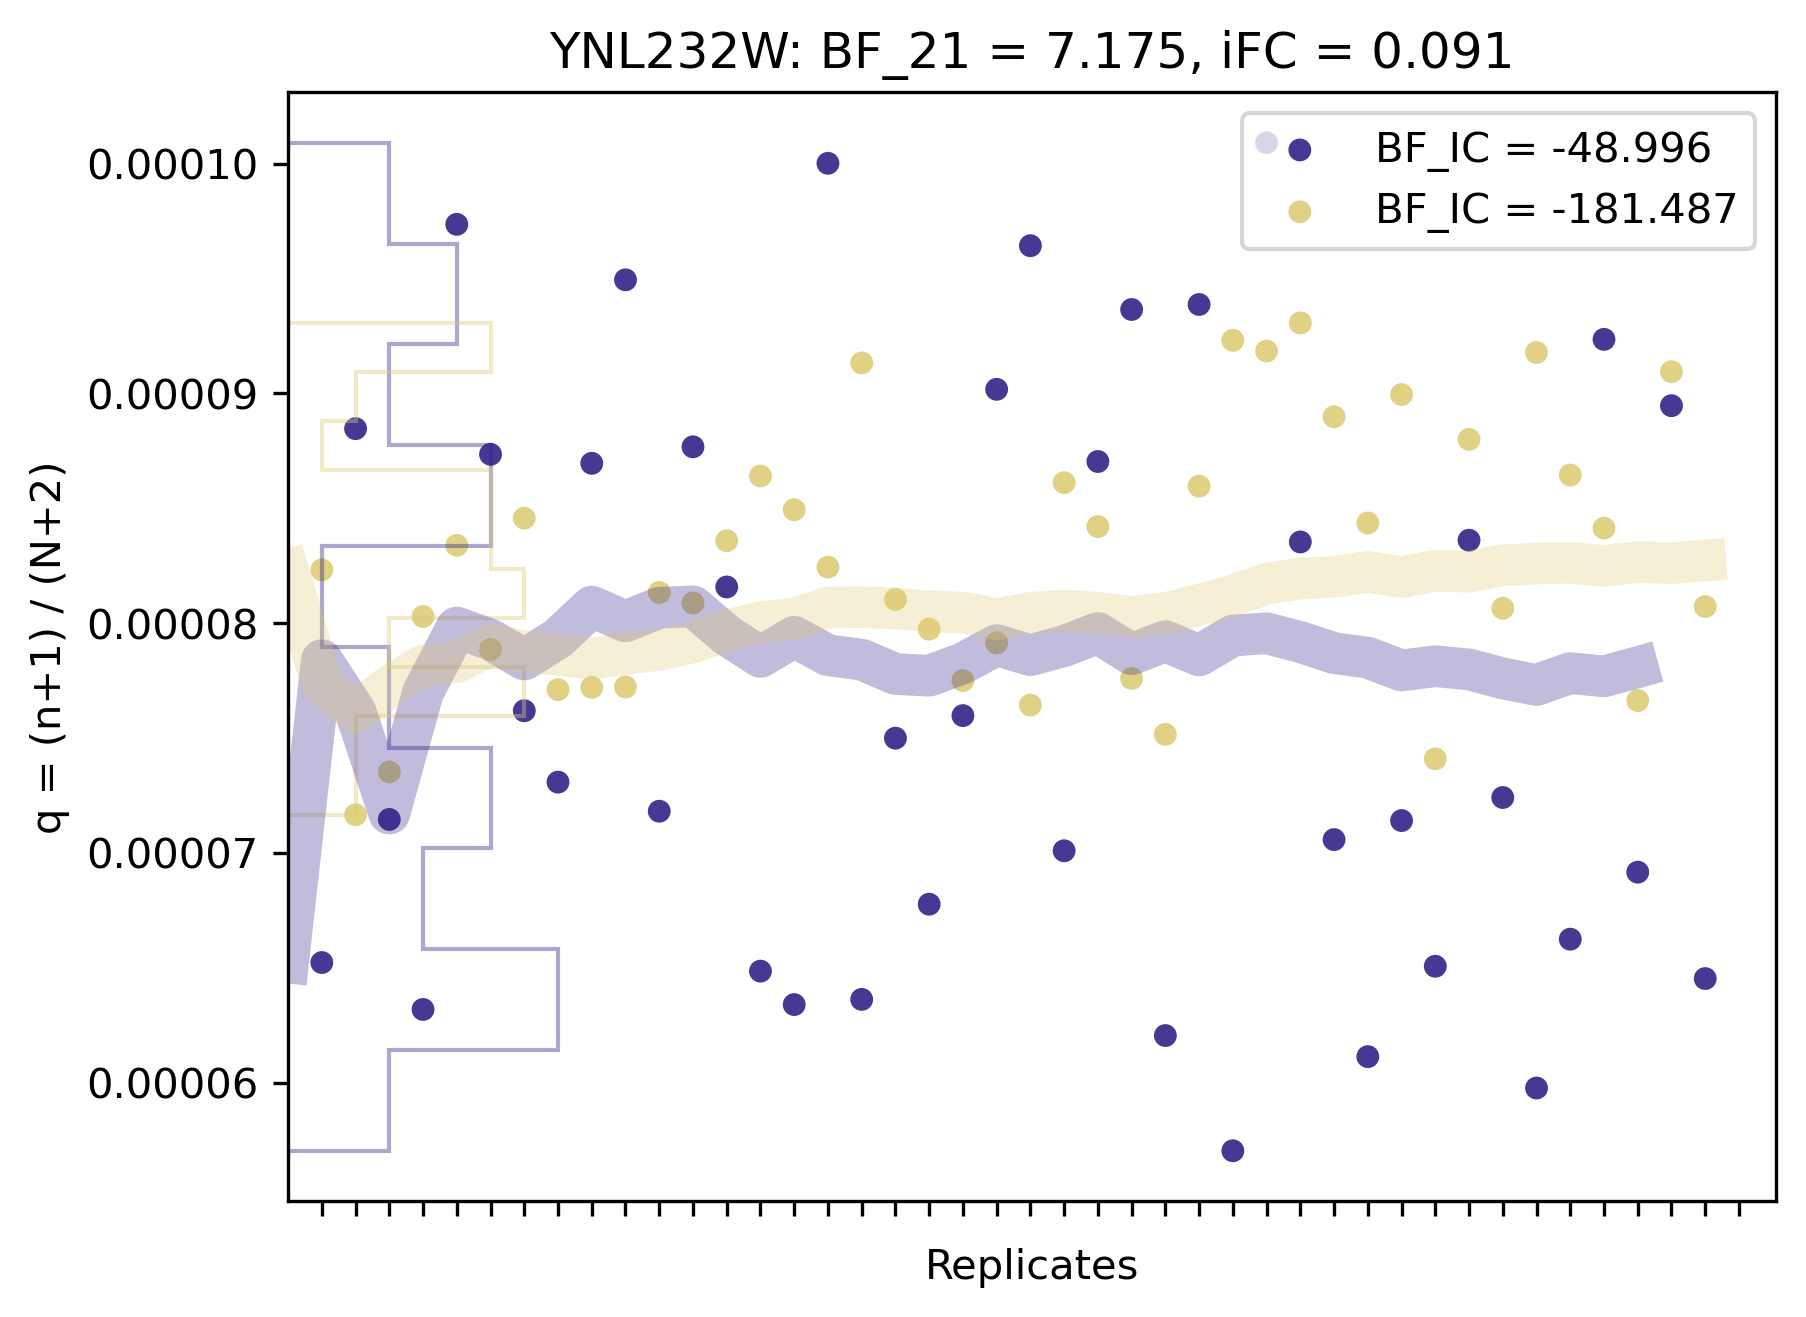

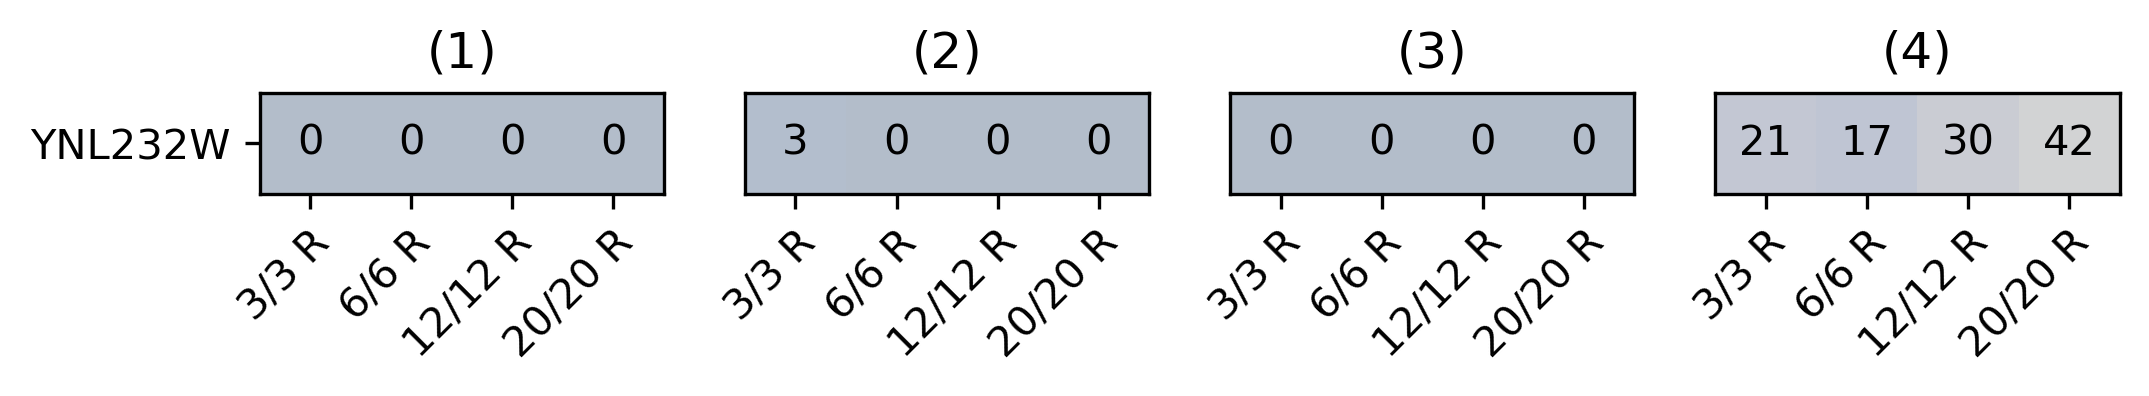

Read counts in WT across replicates:


genes   1   2   3   4   5    6   7   8   9  ...  33  34  35  36  37  \
4511  YLR329W  30  49  62  88  64  104  48  34  53  ...  29  85  56  43  52   

      38  39  40  41  42  
4511  27  71  44  86  51  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1   2   3    4   5    6   7   8   9  ...   35  36  37  38  \
4511  YLR329W  112  65  71  104  52  114  62  73  50  ...  111  65  73  47   

      39   40  41  42   43  44  
4511  70  120  59  56  105  57  

[1 rows x 45 columns]

bayexpress results:


locus_name       BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
4511    YLR329W  7.20385  0.306775 -196.805858    False -205.931345   

      AOTP_Snf2          W  
4511      False  16.119048

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


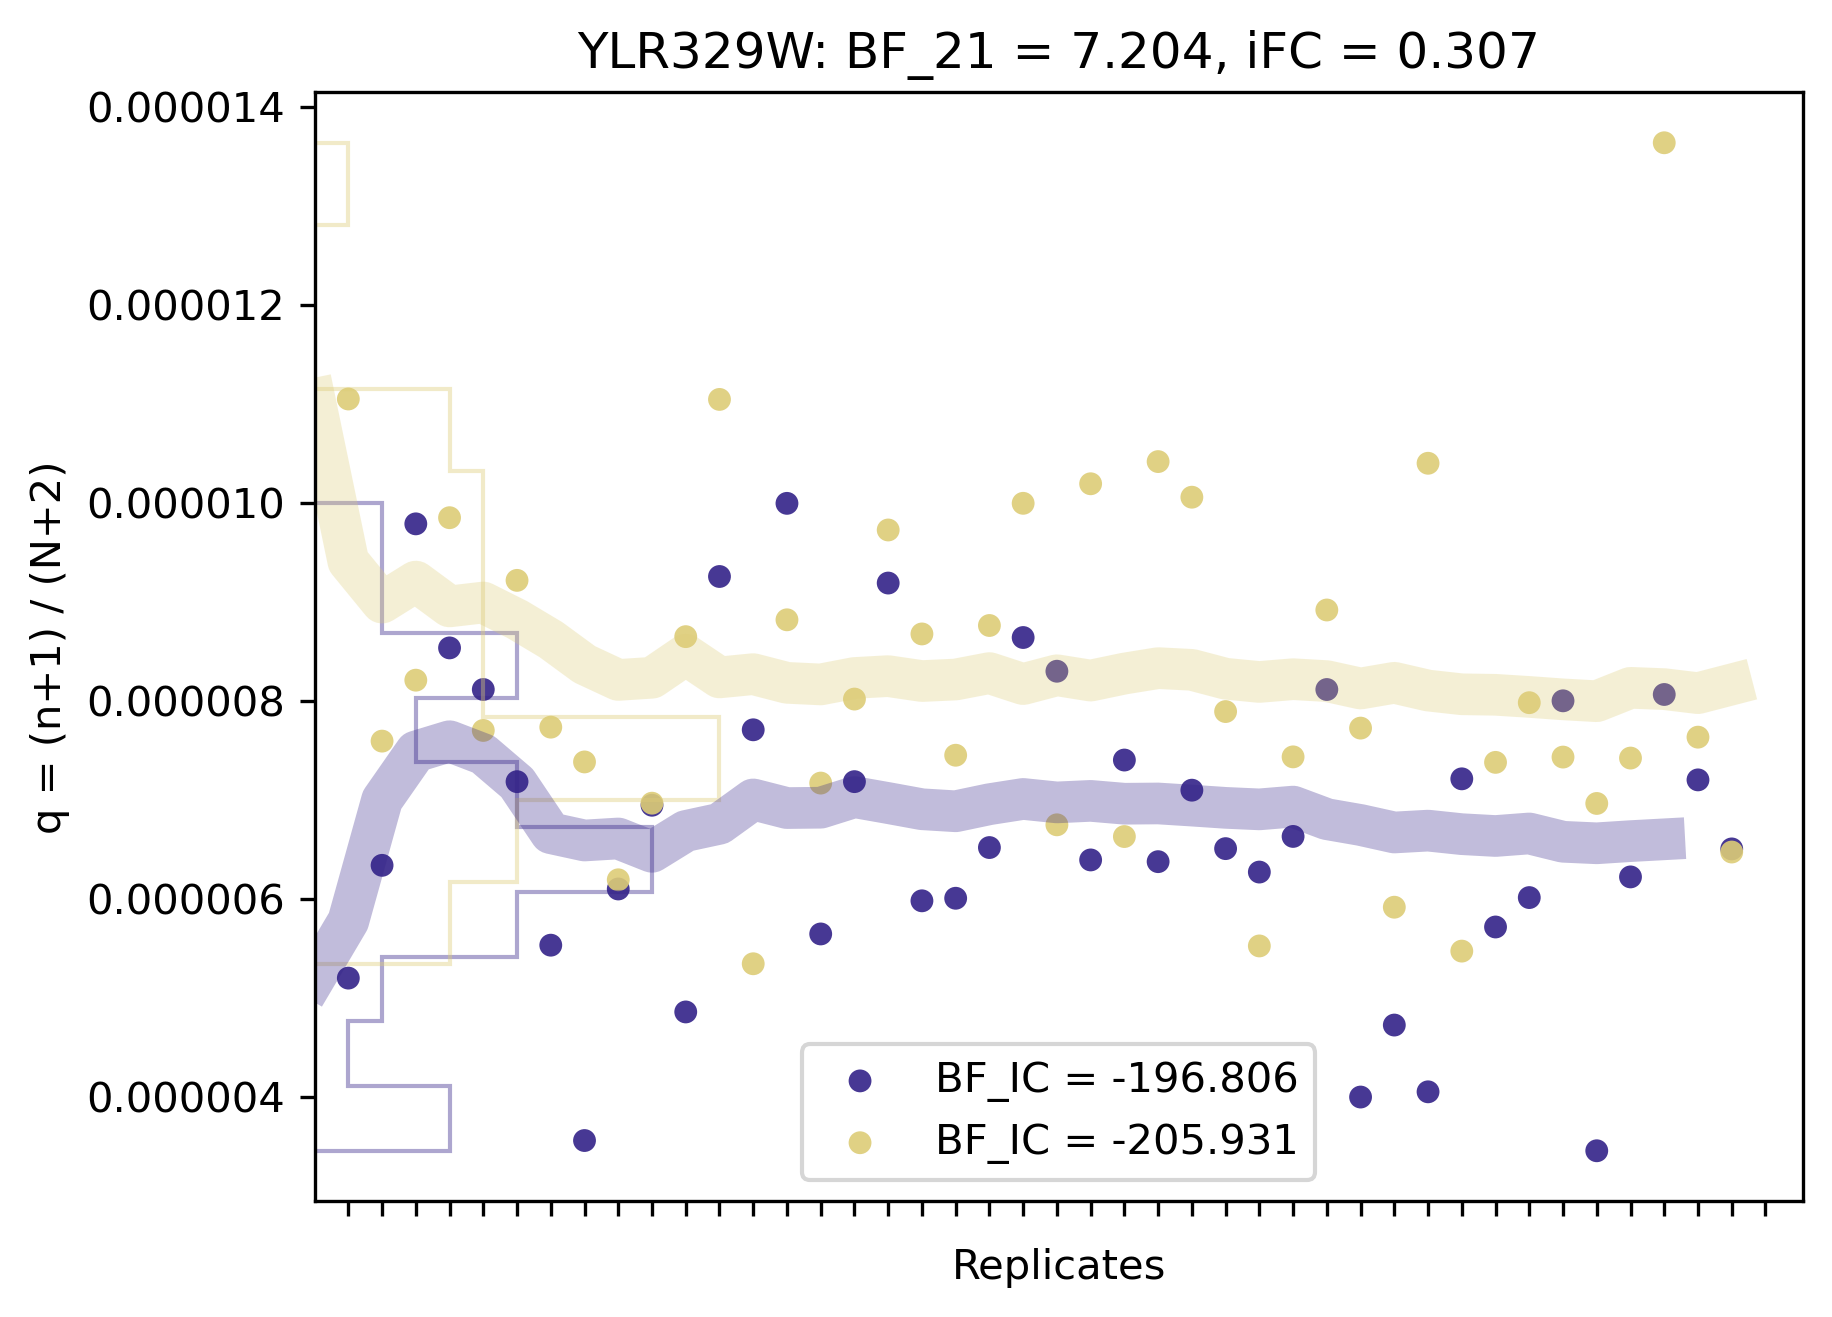

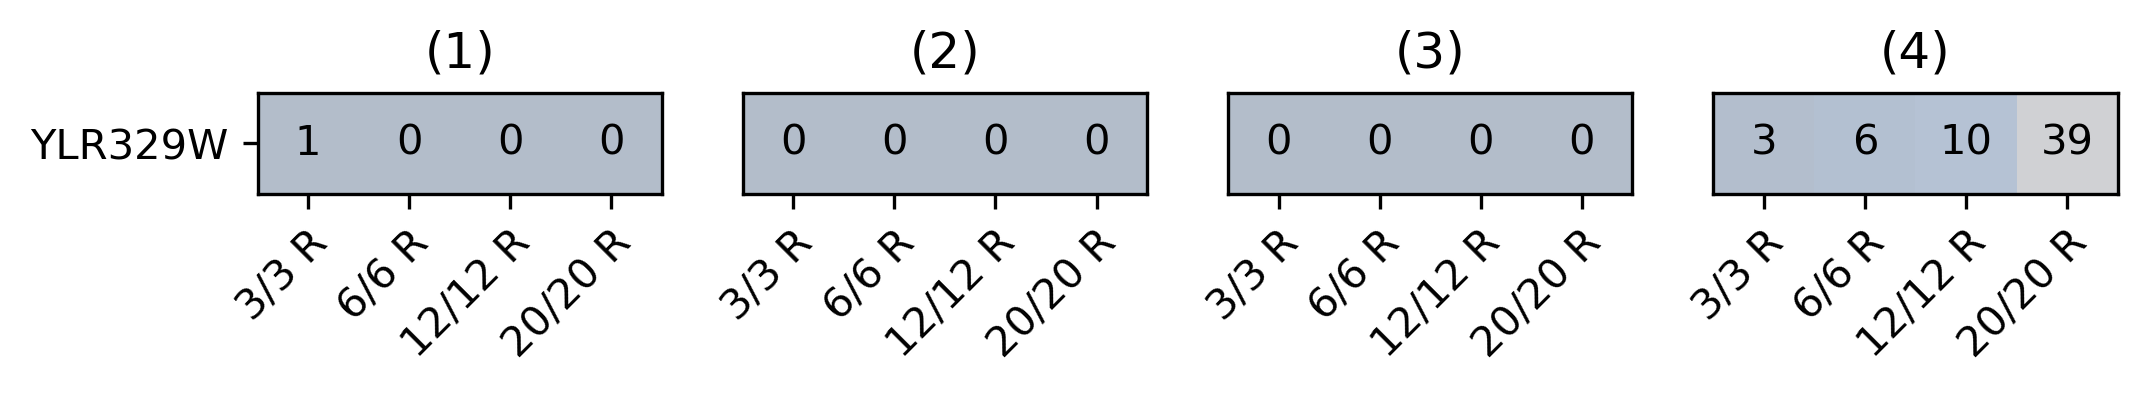

Read counts in WT across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   33   34  \
1409  YDR291W  268  443  315  477  451  956  473  409  458  ...  337  586   

       35   36   37   38   39   40   41   42  
1409  516  380  261  323  603  288  659  359  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   35   36  \
1409  YDR291W  630  488  538  663  399  753  410  564  461  ...  816  434   

       37   38   39   40   41   42   43   44  
1409  496  391  453  477  425  570  524  405  

[1 rows x 45 columns]

bayexpress results:


locus_name        BF        FC   BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
1409    YDR291W  7.219764  0.111894 -95.144699    False -163.157529   

      AOTP_Snf2     W  
1409      False  60.5

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


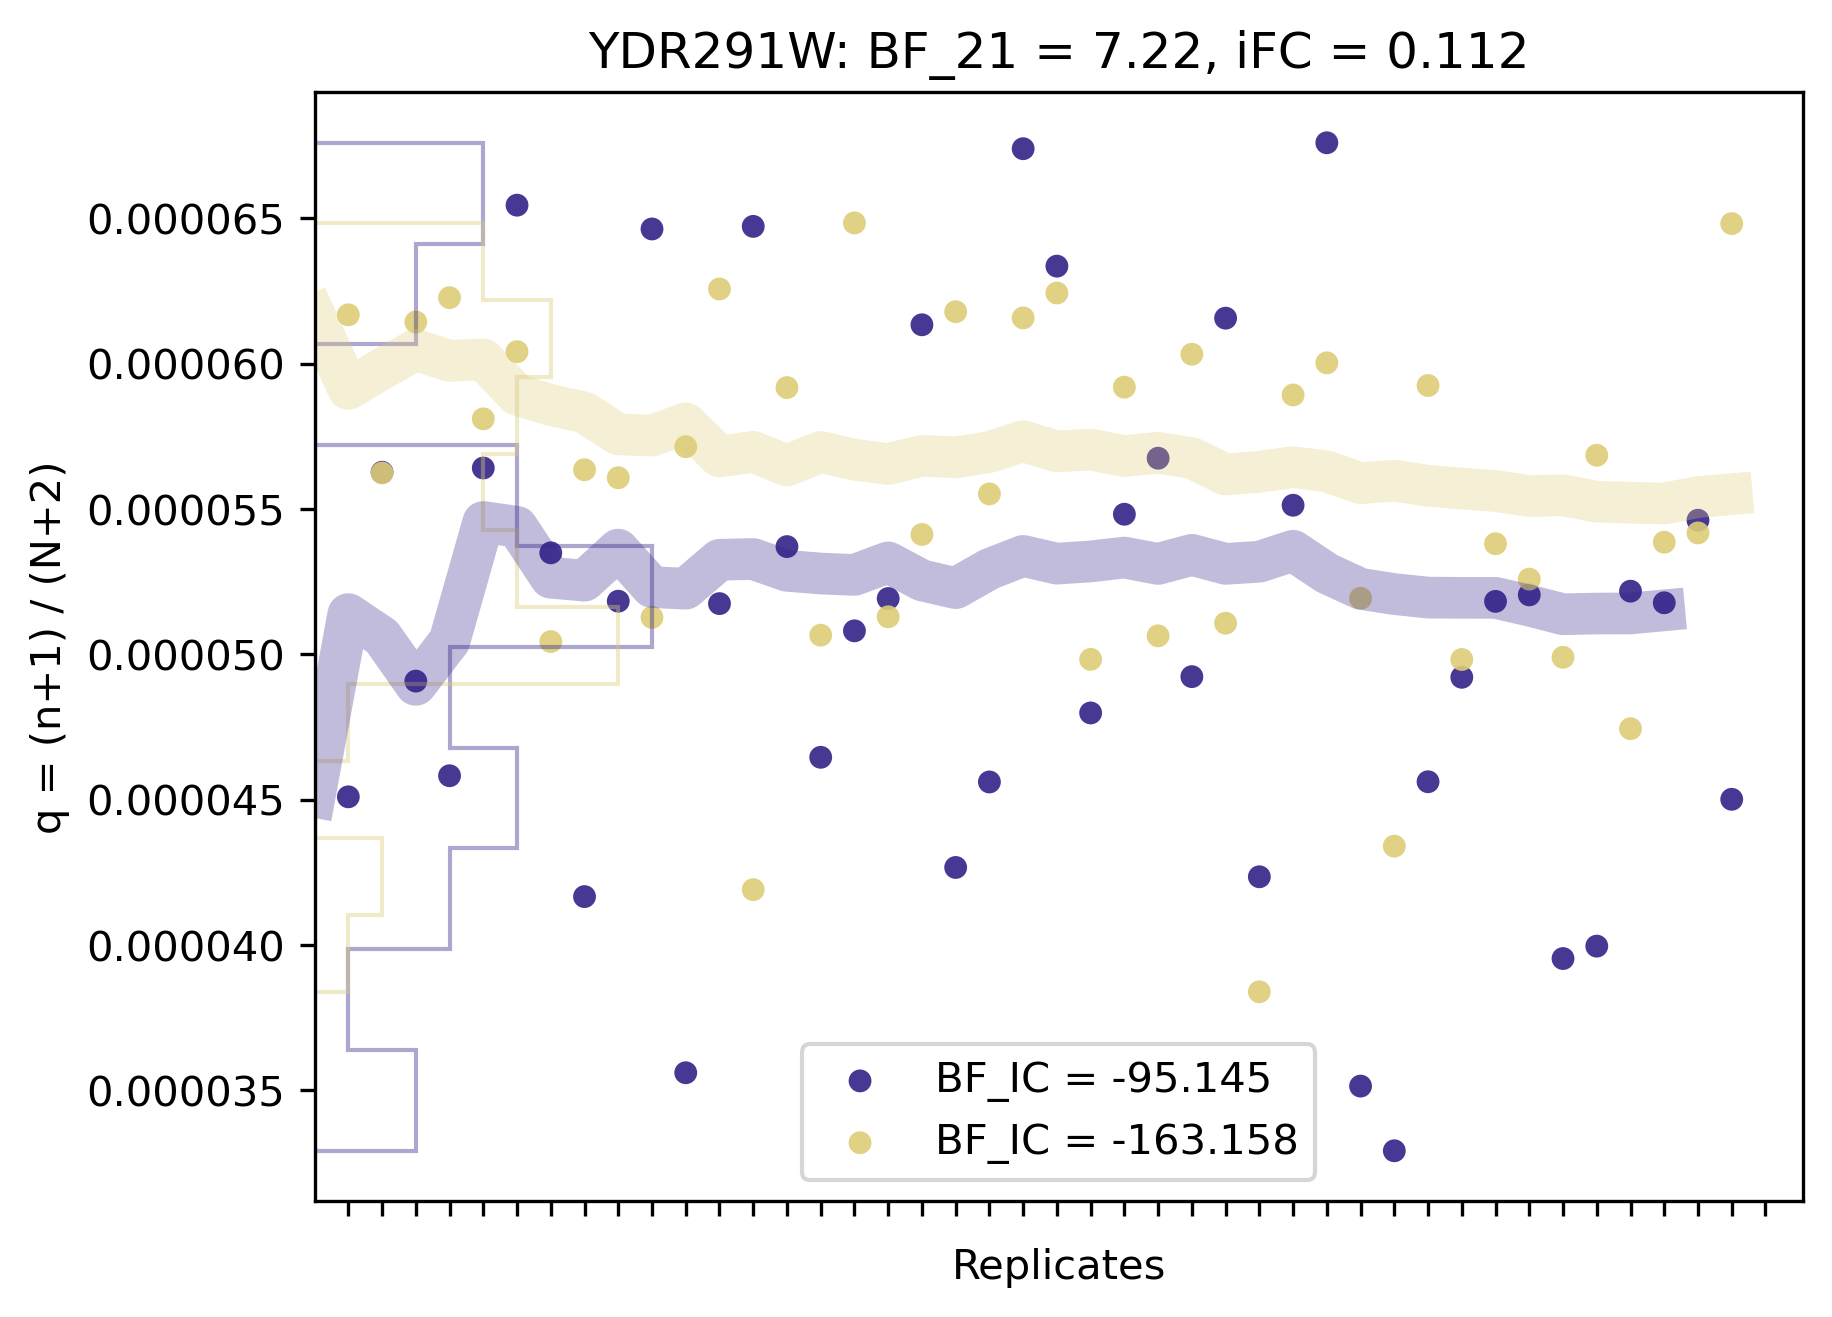

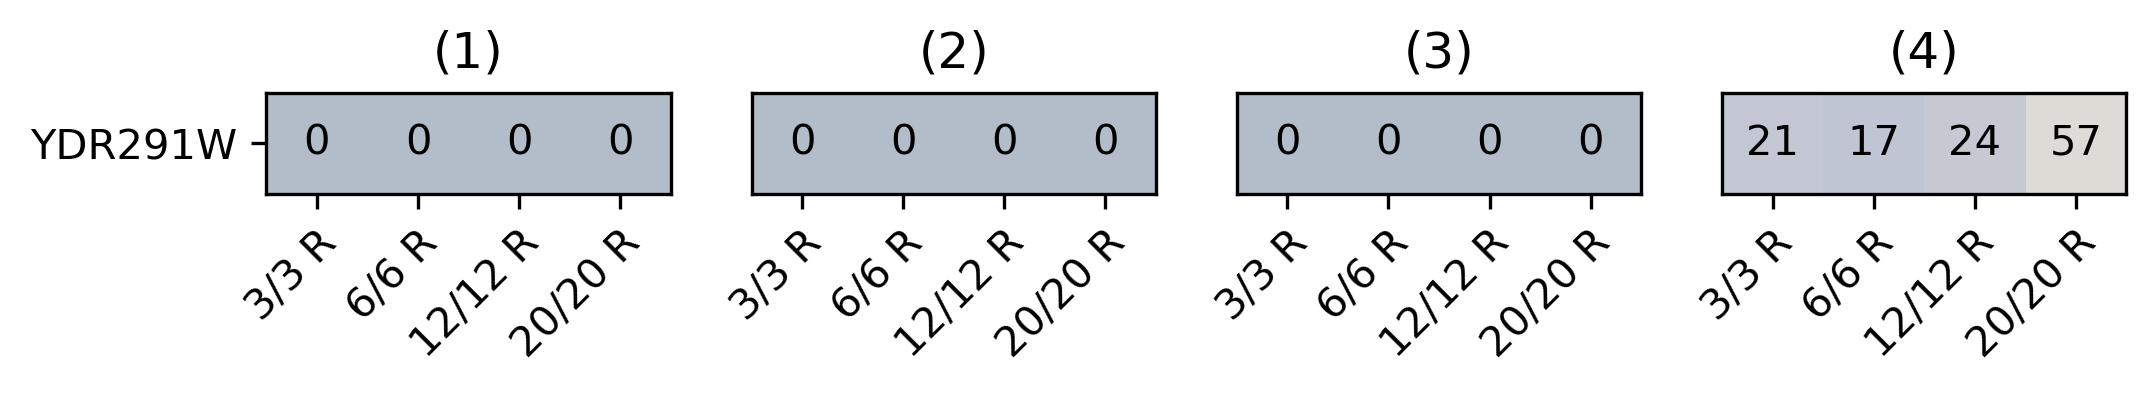

Read counts in WT across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   33   34  \
6701  YPR164W  247  418  292  425  408  879  456  432  388  ...  340  552   

       35   36   37   38   39   40   41   42  
6701  482  383  270  328  621  267  613  363  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   35   36  \
6701  YPR164W  512  478  462  545  356  682  411  539  417  ...  805  403   

       37   38   39   40   41   42   43   44  
6701  470  379  478  459  388  485  420  389  

[1 rows x 45 columns]

bayexpress results:


locus_name        BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
6701    YPR164W  7.242236  0.115596 -129.747251    False -198.587507   

      AOTP_Snf2          W  
6701      False  59.071429

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


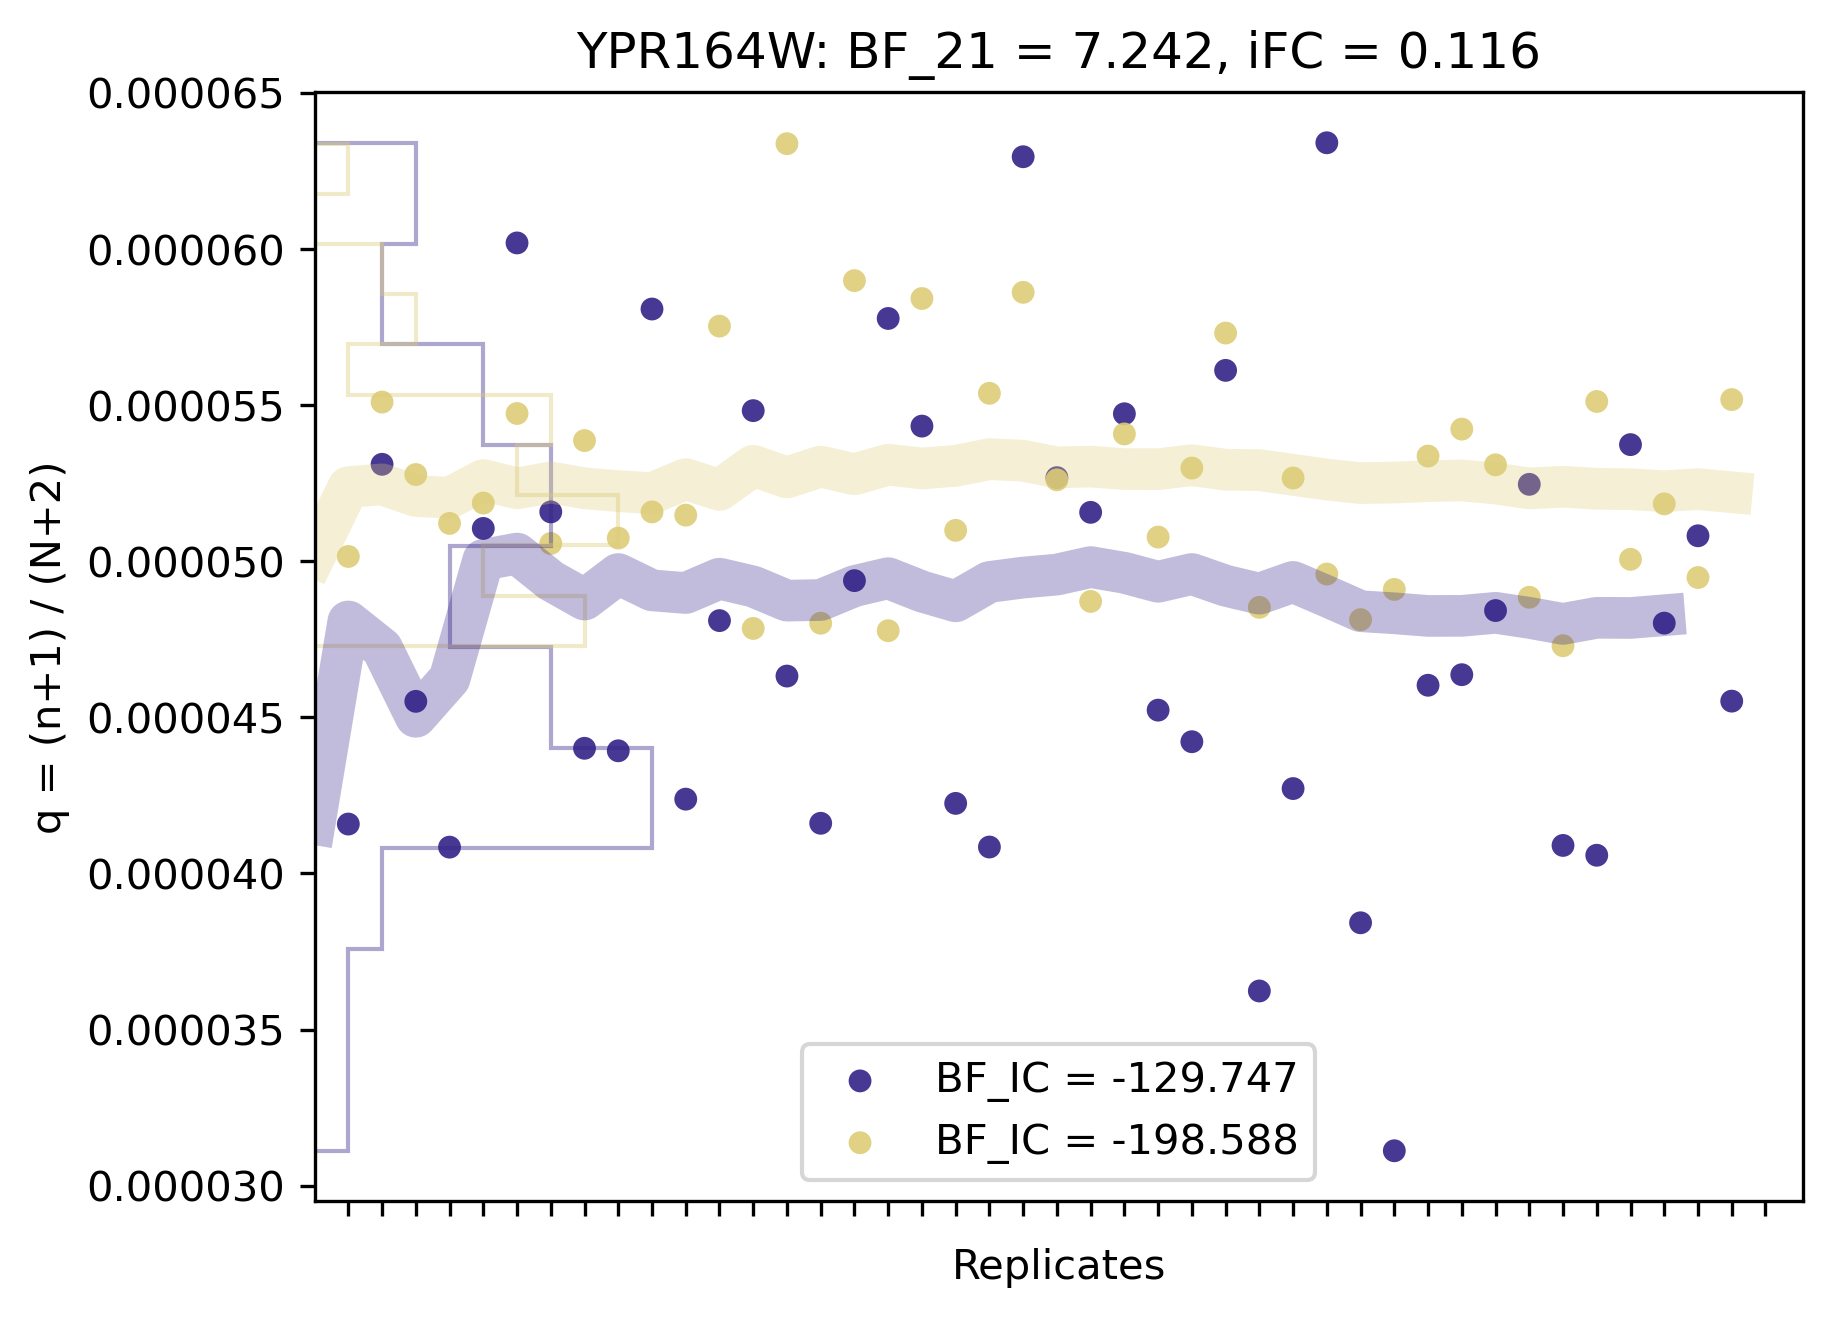

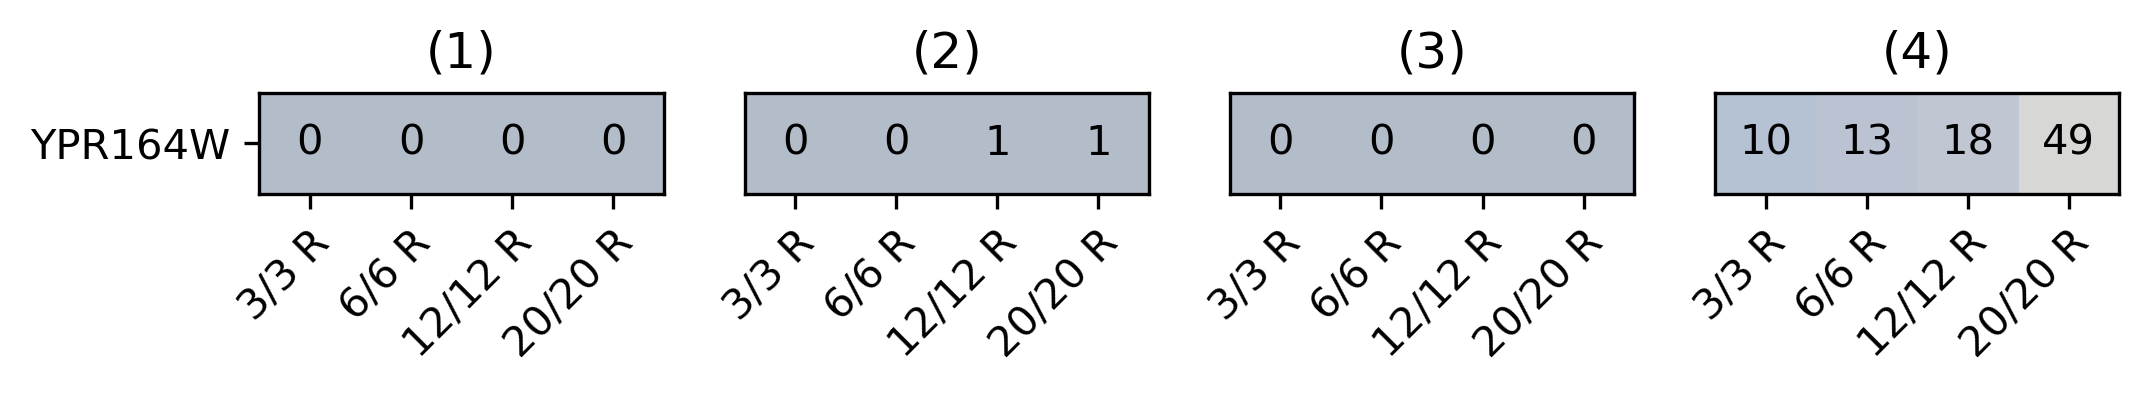

Read counts in WT across replicates:


genes    1    2    3    4    5     6    7    8    9  ...   33   34  \
6459  YPL227C  278  544  401  549  554  1031  508  498  485  ...  424  669   

       35   36   37   38   39   40   41   42  
6459  676  431  405  329  666  343  736  438  

[1 rows x 43 columns]

Read counts in Snf2 mutant across replicates:


genes    1    2    3    4    5    6    7    8    9  ...   35   36  \
6459  YPL227C  679  479  489  768  412  836  457  631  563  ...  996  543   

       37   38   39   40   41   42   43   44  
6459  520  391  586  559  507  587  629  538  

[1 rows x 45 columns]

bayexpress results:


locus_name        BF        FC    BF_IC_WT  AOTP_WT  BF_IC_Snf2  \
6459    YPL227C  7.247946  0.104776 -124.629656    False -150.409227   

      AOTP_Snf2         W  
6459      False  66.02381

With:
BF ... Bayes factor for differential gene expression analysis
FC ... inferred log_2 fold change
BF_IC_WT ... Bayes factor for testing wether replicates are consistent with each other in wild-type
AOTP_WT ... genes that have been identified to be All Over The Place in WT meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
BF_IC_Snf2 ... Bayes factor for testing wether replicates are consistent with each other in Snf2-mutant
AOTP_Snf2 ... genes that have been identified to be All Over The Place in the mutant meaning it is part of the list of highy variable genes idenified in bootstrapping experiments. If AOTP == True, the gene is marked*.
(1) = Bayes factors = BF > 1, |FC| > 1; (2) = edgeR = significant p-value, |FC| > 1; (3) = DESeq2 = significant p-value, |FC| > 1; (4) = Bayes factors = BF > 1


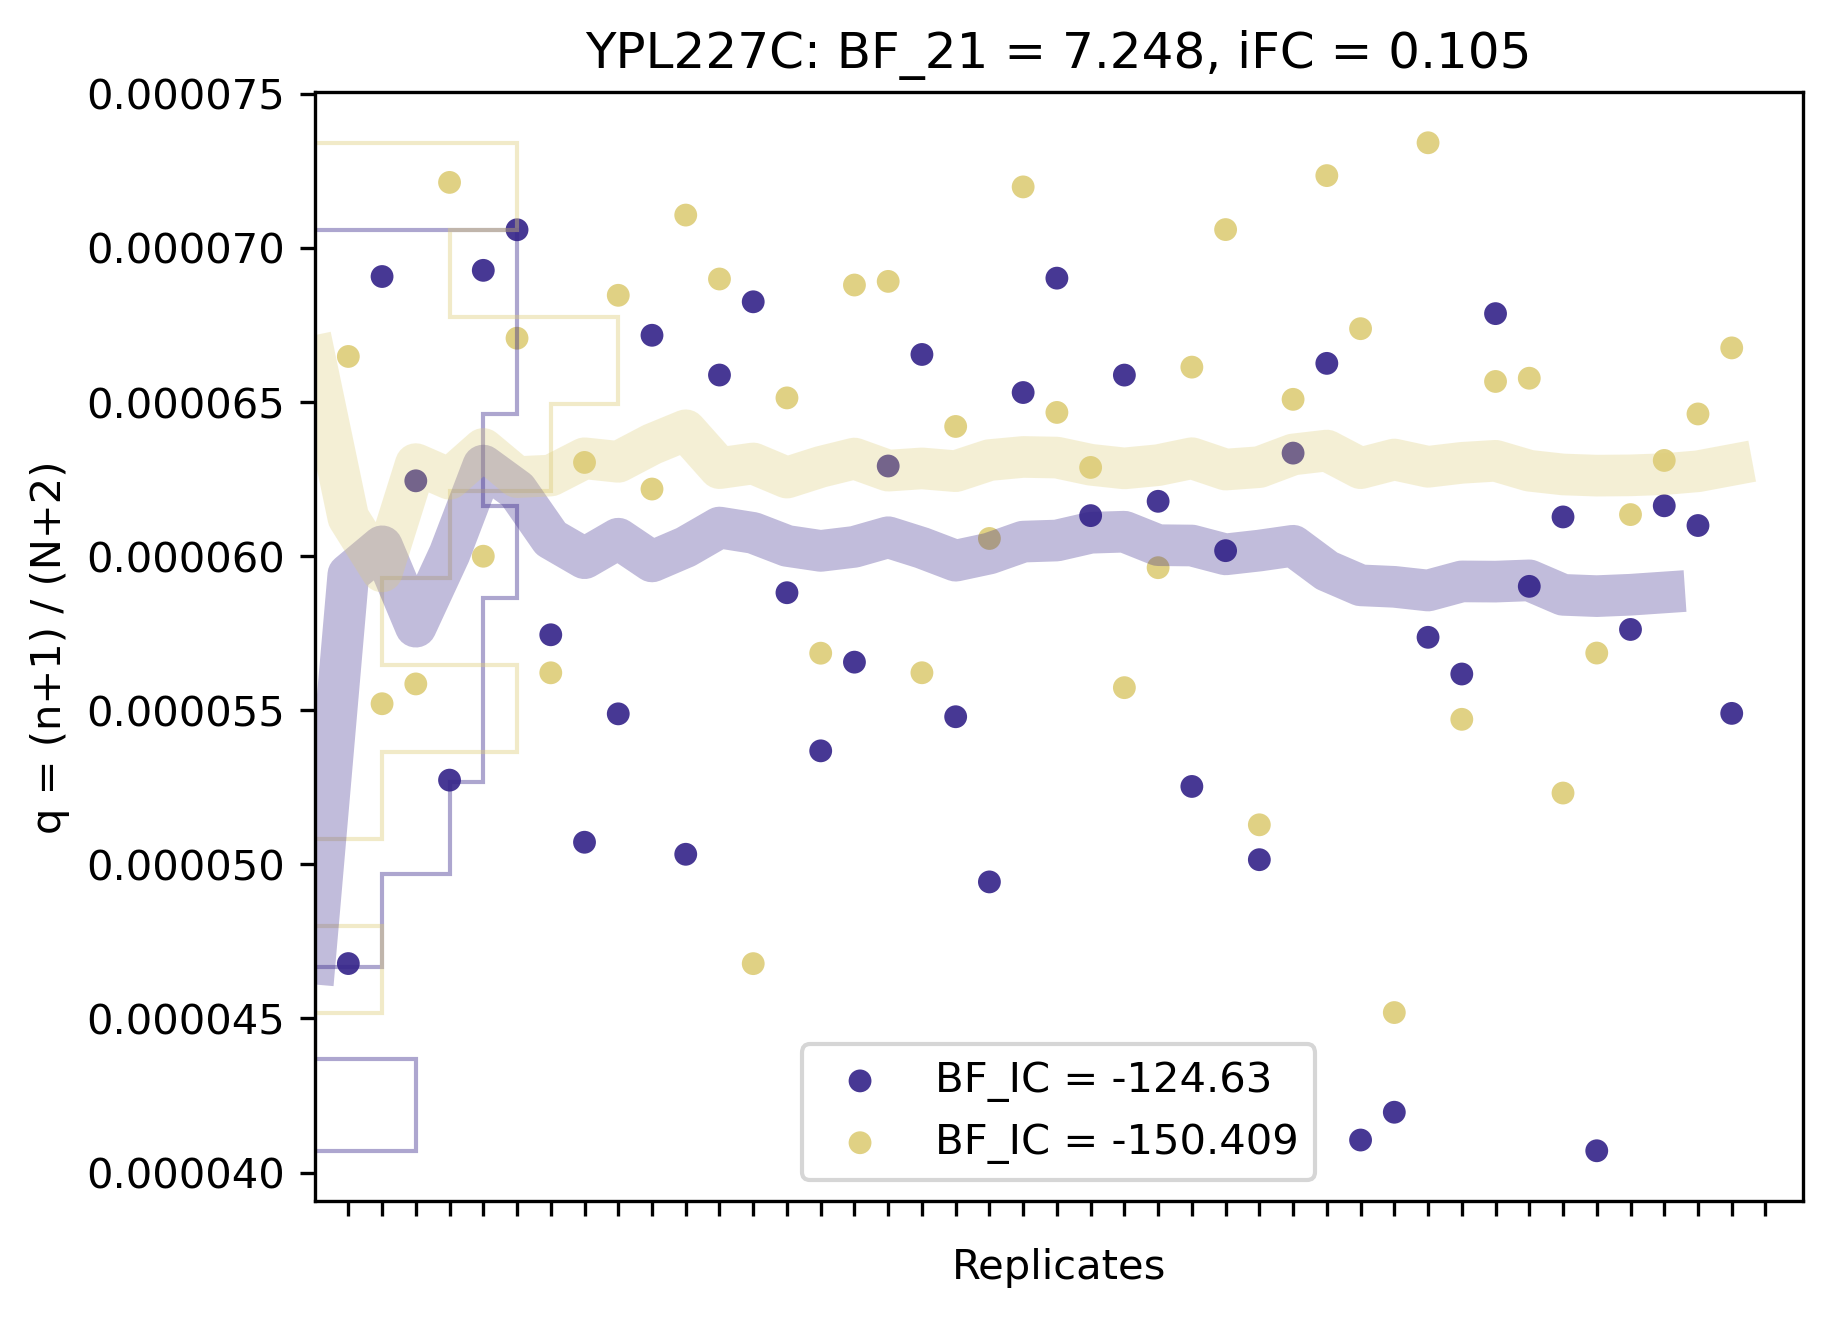

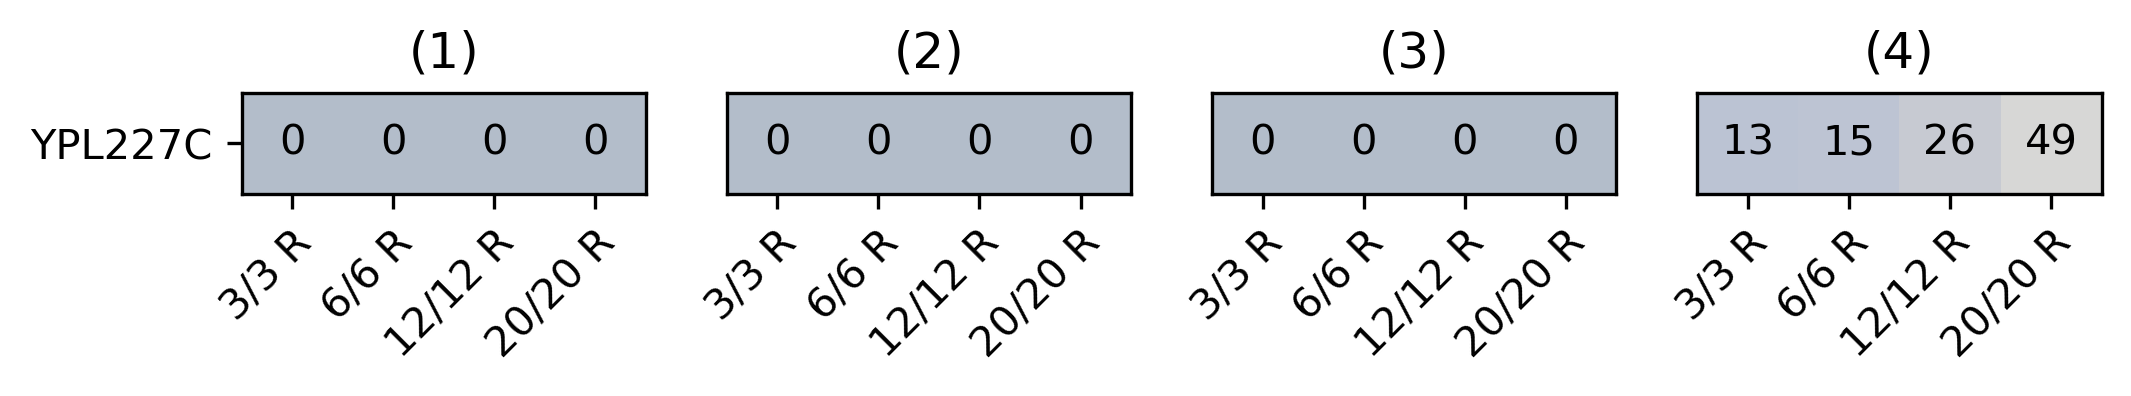

[None, None, None, None, None]

In [16]:
[stalk([gene]) for gene in ['YNL232W', 'YLR329W', 'YDR291W', 'YPR164W', 'YPL227C']
]